# Pre-Examination #2 - Give Me Some Credit

## Dataset Description:
### Dataset Kaggle Link:
[Kaggle Give Me Some Credit](https://www.kaggle.com/competitions/GiveMeSomeCredit/overview)

### Features:
| Feature Name                        | Description                                                                                                                                              | Type       |
|--------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|------------|
| `SeriousDlqin2yrs`                     | Person experienced 90 days past due delinquency or worse                                                                                               | Y/N        |
| `RevolvingUtilizationOfUnsecuredLines` | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits | percentage |
| `age`                                  | Age of borrower in years                                                                                                                                 | integer    |
| `NumberOfTime30-59DaysPastDueNotWorse` | Number of times borrower has been 30-59 days past due but no worse in the last 2 years.                                                                  | integer    |
| `DebtRatio`                            | Monthly debt payments, alimony,living costs divided by monthy gross income                                                                               | percentage |
| `MonthlyIncome`                        | Monthly income                                                                                                                                           | real       |
| `NumberOfOpenCreditLinesAndLoans`      | Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)                                                     | integer    |
| `NumberOfTimes90DaysLate`              | Number of times borrower has been 90 days or more past due.                                                                                              | integer    |
| `NumberRealEstateLoansOrLines`         | Number of mortgage and real estate loans including home equity lines of credit                                                                           | integer    |
| `NumberOfTime60-89DaysPastDueNotWorse` | Number of times borrower has been 60-89 days past due but no worse in the last 2 years.                                                                  | integer    |
| `NumberOfDependents`                   | Number of dependents in family excluding themselves (spouse, children etc.)                                                                              | integer    |

### Target:
There is a Target Column in the dataset - `SeriousDlqin2yrs`, of datatype `boolean`, with 2 possible values - `Y/N` or, respectivelly, `1/0`. This column is showing if a person experienced 90 days past due delinquency or worse. Therefore, this problem is a Supervised Classification Machine Learning Problem.

### Problem Description:
Banks, in order to determine whether or not a loan should be granted to borrowers, require prior knowledge about borrower's capability to return the money they borrowed. For this, they use a system based on credibility that will offers a credit/reputation to borrowers. This credit is based on different criteria, such as: previous loans, overdebt, concurrent loans, and so on. This dataset is built upon the idea of prediction of probability that potential borrowers will experience financial distress in the next two years, enabling banks to decide better to grant a loan to that specific person or not. The task is to build a model that will predict this based on several features, like **Number of Days Overdue**, **Monthly Income** and others.

## Importing Prerequisites

In [385]:
# Import Data Structures
import pandas as pd
import dask.dataframe as dd

# Import Data Manipulation Libraries
import numpy as np
import math

# Import Base Classes for Type Annotation
from sklearn.base import BaseEstimator, TransformerMixin
from numbers import Number

# Import Structure Manipulation Methods
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
# from reparo import CDI, MICE

# Import Visualization Libs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style(style="whitegrid")
sns.set_palette('bright')

# Import Outlier Detection
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

# Import Feature Selection Methods
from kydavra import PValueSelector
from sklearn.feature_selection import RFECV

# Import Hyperparameter Tuning
import optuna

# Import ML Models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Import Interpretation Metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc, roc_curve, average_precision_score, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay

# from lime.lime_tabular import LimeTabularExplainer
# import shap

# Import Custom Utils
import swifter

## Dataset Loading
Since both training and test datasets are not very large, basic `pandas.DataFrame` will be sufficient.

In [386]:
credit_train_zip: pd.DataFrame = pd.read_csv(filepath_or_buffer='dataset/cs-training.csv', sep=',')
credit_train_zip_eda: pd.DataFrame = credit_train_zip.copy()

In [387]:
credit_test_zip: pd.DataFrame = pd.read_csv(filepath_or_buffer='dataset/cs-test.csv', sep=',')

### Basic Dataset Analysis

In [388]:
credit_train_zip_eda.head(n=10)

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   
5           6                 0                              0.213179   74   
6           7                 0                              0.305682   57   
7           8                 0                              0.754464   39   
8           9                 0                              0.116951   27   
9          10                 0                              0.189169   57   

   NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0                                     2     0.802982         9120.0   
1                                     0     0.121876         2600.0   
2                                     1     0.085113         3042.0   
3                                     0     0.036050         3300.0   
4                                     1     0.024926        63588.0   
5                                     0     0.375607         3500.0   
6                                     0  5710.000000            NaN   
7                                     0     0.209940         3500.0   
8                                     0    46.000000            NaN   
9                                     0     0.606291        23684.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   
5                                3                        0   
6                                8                        0   
7                                8                        0   
8                                2                        0   
9                                9                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   
5                             1                                     0   
6                             3                                     0   
7                             0                                     0   
8                             0                                     0   
9                             4                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0  
5                 1.0  
6                 0.0  
7                 0.0  
8                 NaN  
9                 2.0

In [389]:
credit_train_zip_eda.tail(n=10)

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
149990      149991                 0                              0.055518   
149991      149992                 0                              0.104112   
149992      149993                 0                              0.871976   
149993      149994                 0                              1.000000   
149994      149995                 0                              0.385742   
149995      149996                 0                              0.040674   
149996      149997                 0                              0.299745   
149997      149998                 0                              0.246044   
149998      149999                 0                              0.000000   
149999      150000                 0                              0.850283   

        age  NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
149990   46                                     0     0.609779         4335.0   
149991   59                                     0     0.477658        10316.0   
149992   50                                     0  4132.000000            NaN   
149993   22                                     0     0.000000          820.0   
149994   50                                     0     0.404293         3400.0   
149995   74                                     0     0.225131         2100.0   
149996   44                                     0     0.716562         5584.0   
149997   58                                     0  3870.000000            NaN   
149998   30                                     0     0.000000         5716.0   
149999   64                                     0     0.249908         8158.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
149990                                7                        0   
149991                               10                        0   
149992                               11                        0   
149993                                1                        0   
149994                                7                        0   
149995                                4                        0   
149996                                4                        0   
149997                               18                        0   
149998                                4                        0   
149999                                8                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
149990                             1                                     0   
149991                             2                                     0   
149992                             1                                     0   
149993                             0                                     0   
149994                             0                                     0   
149995                             1                                     0   
149996                             1                                     0   
149997                             1                                     0   
149998                             0                                     0   
149999                             2                                     0   

        NumberOfDependents  
149990                 2.0  
149991                 0.0  
149992                 3.0  
149993                 0.0  
149994                 0.0  
149995                 0.0  
149996                 2.0  
149997                 0.0  
149998                 0.0  
149999                 0.0

As it may be seen, several features are present in the dataset. At the same time, several `NaN` values have been noticed in `MonthlyIncome` and `NumberOfDependents` columns. Besides that, no feature scaling was perfomed on this dataset. Also, first column of the dataset - `Unnamed: 0`, that is a result of the `pd.readcsv()` function, is a replacement for the first missing name in the original `.csv` file, that, most probably, is just the ID column for the samples in the dataset.

In [390]:
credit_train_zip_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

There are no columns of `object` data type, which is often used for columns of `String` data type. Besides that there are 8 columns of `int64` data type and 4 columns of `float64` data type. Also, there are 2 columns with missing values - `MonthlyIncome` and `NumberOfDependents`, as it was mentioned in the previous paragraph. In total there are 11 Features and 1 Target Variable - `SeriousDlqin2yrs`. Again, the memory usage of this specific dataset is $\approx$ 13.7 MB.

In [391]:
print(f"Train Dataset Shape: {credit_train_zip_eda.shape[0]} samples, {credit_train_zip_eda.shape[1]} columns")

Train Dataset Shape: 150000 samples, 12 columns


As it may be seen, train dataset contains exactly 150000 training samples and 12 columns, as it was mentioned previously, 11 features and 1 target variable column.

In [392]:
credit_train_zip_eda.describe()

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean       52.295207                              0.421033     353.005076   
std        14.771866                              4.192781    2037.818523   
min         0.000000                              0.000000       0.000000   
25%        41.000000                              0.000000       0.175074   
50%        52.000000                              0.000000       0.366508   
75%        63.000000                              0.000000       0.868254   
max       109.000000                             98.000000  329664.000000   

       MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count   1.202690e+05                    150000.000000   
mean    6.670221e+03                         8.452760   
std     1.438467e+04                         5.145951   
min     0.000000e+00                         0.000000   
25%     3.400000e+03                         5.000000   
50%     5.400000e+03                         8.000000   
75%     8.249000e+03                        11.000000   
max     3.008750e+06                        58.000000   

       NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
count            150000.000000                 150000.000000   
mean                  0.265973                      1.018240   
std                   4.169304                      1.129771   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   0.000000                      1.000000   
75%                   0.000000                      2.000000   
max                  98.000000                     54.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                         150000.000000       146076.000000  
mean                               0.240387            0.757222  
std                                4.155179            1.115086  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               98.000000           20.000000

After a brief analysis of the described dataset, were derived several conclusions:
1. Dataset is highly imbalanced, since target variable `SeriousDlqin2yrs` contains at least 75% of negative samples;
2. Features have different ranges of values, from very small range of continuous values - `age`, to very big ranges - `DebtRation` etc., which can impact gradient-based or distance-based Machine Learning Models, such as Logistic Regression or K-Nearest Neighbors;
3. There might be present a considerable amount of outliers, judging by the percentile values for several columns, such as: `ResolvingUtilizationOfUnsecuredLines` or `DebtRation`.

In [393]:
credit_train_zip_eda.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [394]:
missing_values_cols: list[str] = credit_train_zip_eda.isnull().sum()[credit_train_zip_eda.isnull().sum() > 0].index.tolist()
missing_values_cols

['MonthlyIncome', 'NumberOfDependents']

In [395]:
for col in missing_values_cols:
    print(f"Feature '{col}': {credit_train_zip_eda[col].isnull().sum()} missing values ({(credit_train_zip_eda[col].isnull().sum() / credit_train_zip_eda.shape[0] * 100):.2f}%)")

Feature 'MonthlyIncome': 29731 missing values (19.82%)
Feature 'NumberOfDependents': 3924 missing values (2.62%)


There is a significant amount of missing values in `MonthlyIncome` column $\approx 19.82\%$, which is almost a fifth of the entire training set. In order to understand better how to treat those values, EDA should be performed to understand its distribution. On the other hand, column `NumberOfDependents` has a lower amount of missing values, $\approx 2.62\%$ which offers the possibility to drop those rows or use simple imputation mechanisms to treat them accordingly.

## Exploratory Data Analysis

In order to be able to explore and visualize data was used training set offered from Kaggle competition, in which null values were dropped in order to avoid problems at plotting the data.

In [396]:
credit_train_zip_eda = credit_train_zip_eda.dropna()

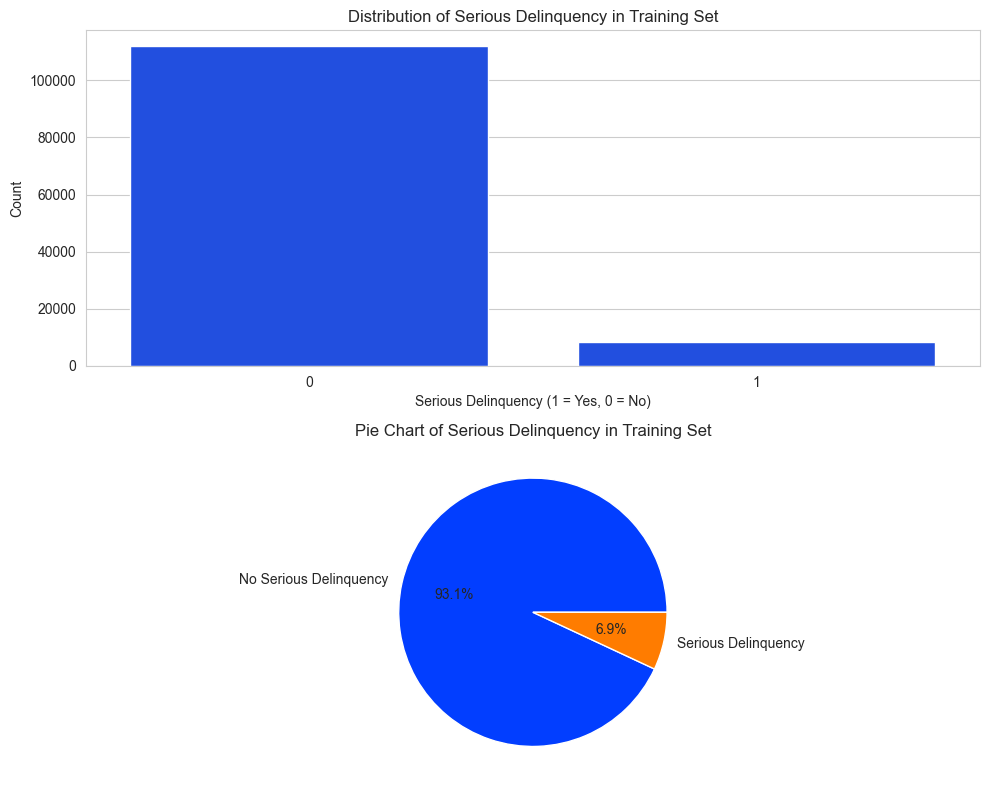

In [397]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.countplot(data=credit_train_zip_eda, x='SeriousDlqin2yrs', ax=axes[0])
axes[0].set_title('Distribution of Serious Delinquency in Training Set')
axes[0].set_xlabel('Serious Delinquency (1 = Yes, 0 = No)')
axes[0].set_ylabel('Count')

axes[1].pie(
    credit_train_zip_eda['SeriousDlqin2yrs'].value_counts(),
    autopct='%1.1f%%',
    labels=['No Serious Delinquency', 'Serious Delinquency']
)
axes[1].set_title('Pie Chart of Serious Delinquency in Training Set')

plt.tight_layout()
plt.show()

As it was mentioned previously and now proven, the dataset is highly imbalanced, therefore imbalance mitigation techniques should be applied. Further in the notebook will be presented several techniques to help with this issue.

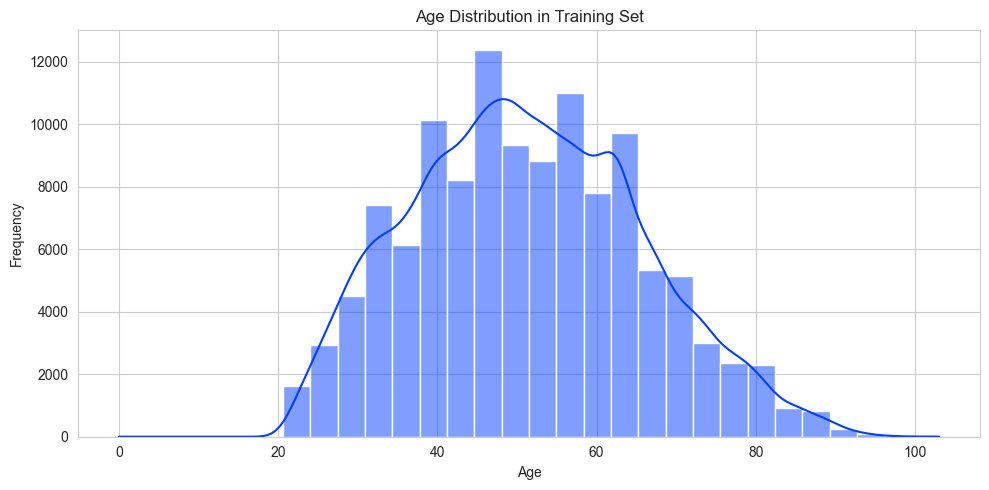

In [398]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.histplot(
    data=credit_train_zip_eda,
    x='age',
    bins=30,
    kde=True,
    ax=ax
)
ax.set_title('Age Distribution in Training Set')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

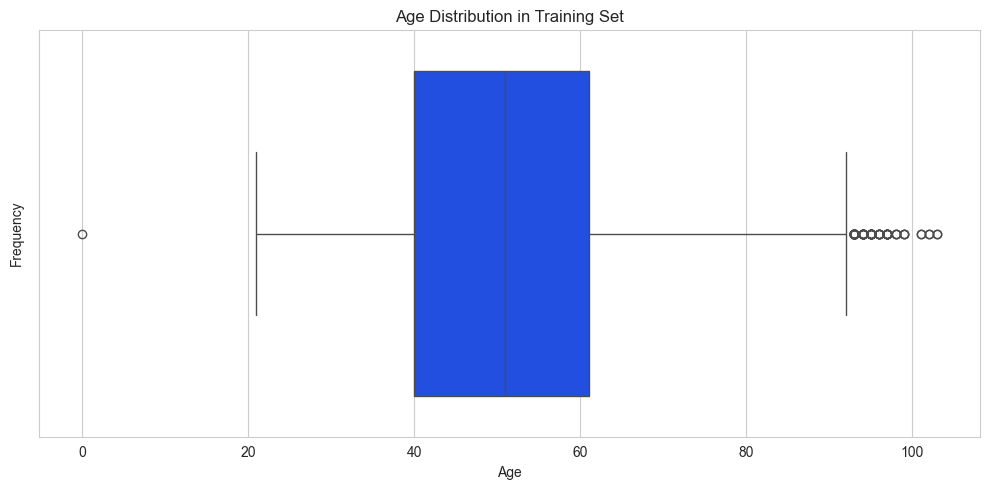

In [399]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    data=credit_train_zip_eda,
    x='age',
    ax=ax
)
ax.set_title('Age Distribution in Training Set')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Column `age` is very close to the normal distribution, with several outlier points.

In [400]:
def get_outliers_by_boxplot(df: pd.DataFrame, column: str) -> pd.Series:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers_mask = outliers_mask.apply(
        lambda x: -1 if x else 1
    )

    return outliers_mask

In [401]:
outliers_age_mask = get_outliers_by_boxplot(credit_train_zip_eda, 'age')
print(f"Total Number of Samples: {credit_train_zip_eda.shape[0]}")
print(f"Number of Outliers in Age Column detected using Boxplot Method: {outliers_age_mask[outliers_age_mask == -1].count()}")
print(f"Number of Inliers in Age Column detected using Boxplot Method: {outliers_age_mask[outliers_age_mask == 1].count()}")
print(f"Percentage of Outliers in Age Column detected using Boxplot Method: {(credit_train_zip_eda[outliers_age_mask == -1].shape[0] / credit_train_zip_eda.shape[0] * 100):.5f}%")
print(f"Percentage of Inliers in Age Column detected using Boxplot Method: {(credit_train_zip_eda[outliers_age_mask == 1].shape[0] / credit_train_zip_eda.shape[0] * 100):.5f}%")

Total Number of Samples: 120269
Number of Outliers in Age Column detected using Boxplot Method: 118
Number of Inliers in Age Column detected using Boxplot Method: 120151
Percentage of Outliers in Age Column detected using Boxplot Method: 0.09811%
Percentage of Inliers in Age Column detected using Boxplot Method: 99.90189%


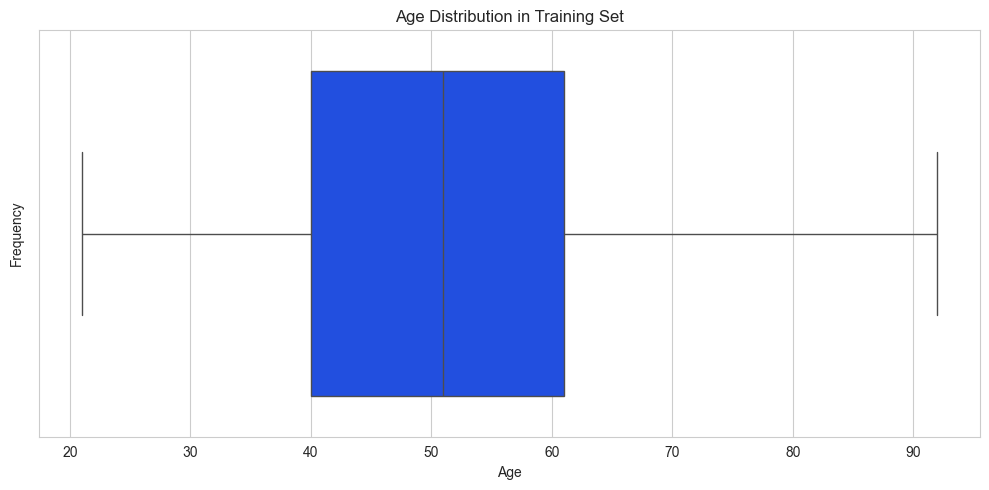

In [402]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    data=credit_train_zip_eda[outliers_age_mask == 1],
    x='age',
    ax=ax
)
ax.set_title('Age Distribution in Training Set')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

It looks better now, no outliers remained, but the effect of this modification should be analyzed further in the model training process.

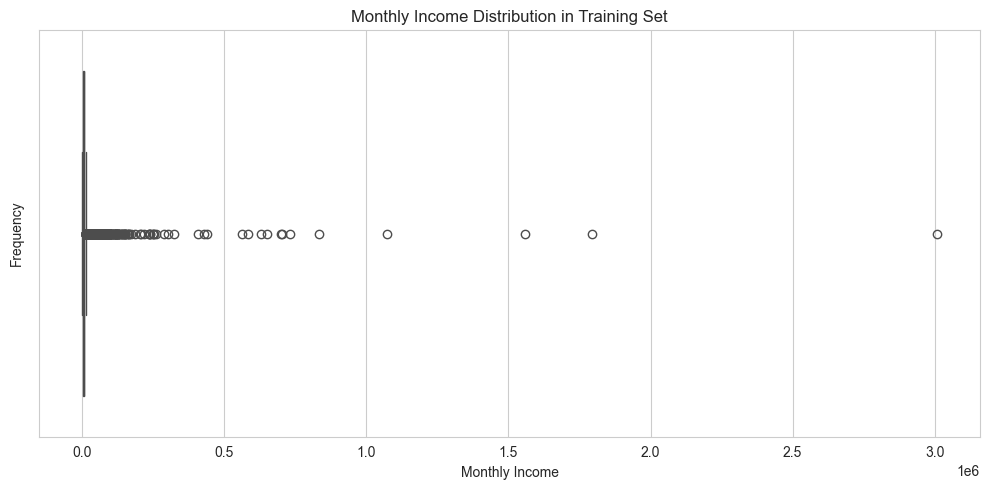

In [403]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    data=credit_train_zip_eda,
    x='MonthlyIncome',
    ax=ax
)
ax.set_title('Monthly Income Distribution in Training Set')
ax.set_xlabel('Monthly Income')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

As it may be noticed, the boxplot of `MonthlyIncome` displays a lot of outlier points. This may be a sign that Monthly Income is adhering to a Non-Normal Distribution, therefore should be treated different. However, this does not mean that this column does not contain any outliers at all or does not adhere to Normal Distribution, but a very skewed one.

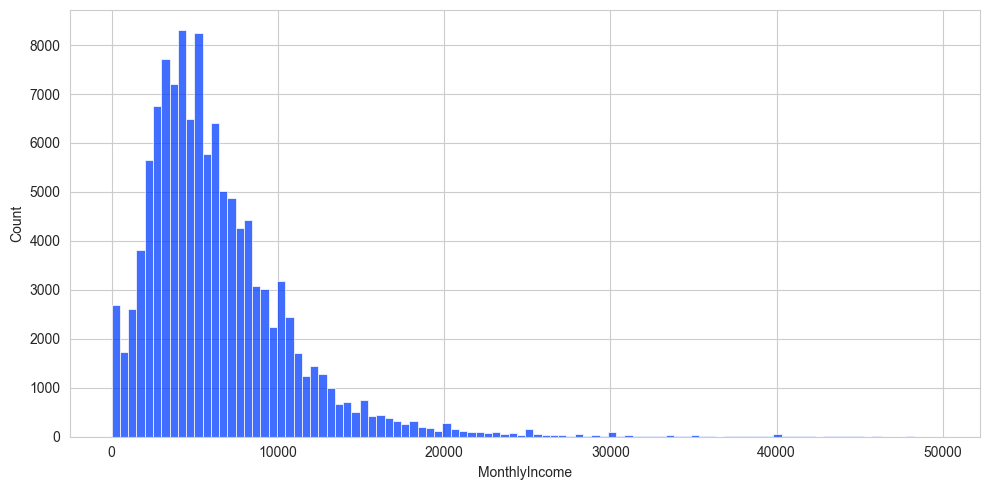

In [404]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.histplot(
    data=credit_train_zip_eda[credit_train_zip_eda['MonthlyIncome'] < 5e4],
    x='MonthlyIncome',
    bins=100,
    ax=ax
)

plt.tight_layout()
plt.show()

As it may be seen, a subset of the `MonthlyIncome` column was selected, since, judging by the boxplot, the most values are under $5\cdot10^4$ Monthly Income. This curve is very close to Gamma Curve. As a solution to bring this feature to a Normal Distribution is to apply Log Transformation. Thus, the data is brought to a Gaussian Distribution.

In [405]:
credit_train_zip_eda['MonthlyIncome'] = np.log1p(credit_train_zip['MonthlyIncome'])

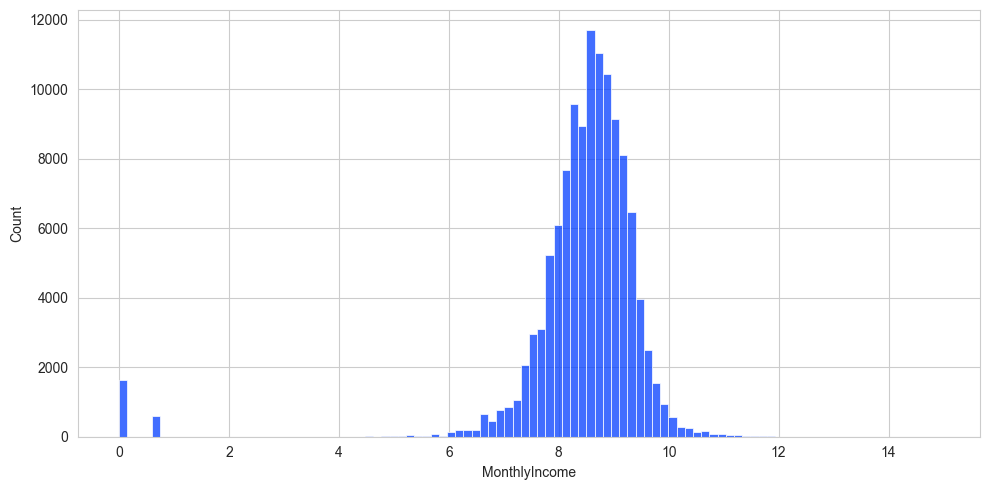

In [406]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.histplot(
    data=credit_train_zip_eda,
    x='MonthlyIncome',
    bins=100,
    ax=ax
)

plt.tight_layout()
plt.show()

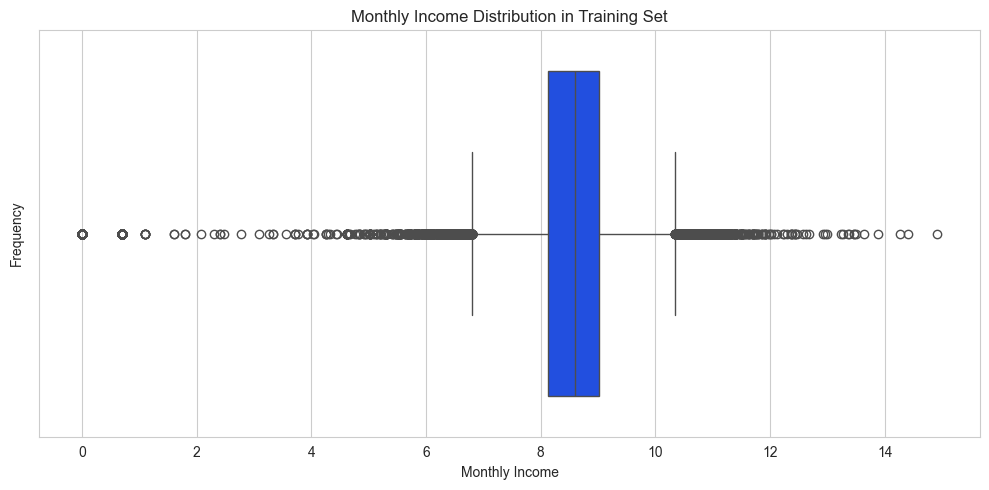

In [407]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    data=credit_train_zip_eda,
    x='MonthlyIncome',
    ax=ax
)
ax.set_title('Monthly Income Distribution in Training Set')
ax.set_xlabel('Monthly Income')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

After Log Transformation, `MonthlyIncome` column got closer to Normal Distribution. However, it finds a large amount of outliers.

In [408]:
outliers_income_mask = get_outliers_by_boxplot(credit_train_zip_eda, 'MonthlyIncome')
print(f"Total Number of Samples: {credit_train_zip_eda.shape[0]}")
print(f"Number of Outliers in Age Column detected using Boxplot Method: {outliers_income_mask[outliers_income_mask == -1].count()}")
print(f"Number of Inliers in Age Column detected using Boxplot Method: {outliers_income_mask[outliers_income_mask == 1].count()}")
print(f"Percentage of Outliers in Age Column detected using Boxplot Method: {(credit_train_zip_eda[outliers_income_mask == -1].shape[0] / credit_train_zip_eda.shape[0] * 100):.5f}%")
print(f"Percentage of Inliers in Age Column detected using Boxplot Method: {(credit_train_zip_eda[outliers_income_mask == 1].shape[0] / credit_train_zip_eda.shape[0] * 100):.5f}%")

Total Number of Samples: 120269
Number of Outliers in Age Column detected using Boxplot Method: 4882
Number of Inliers in Age Column detected using Boxplot Method: 115387
Percentage of Outliers in Age Column detected using Boxplot Method: 4.05923%
Percentage of Inliers in Age Column detected using Boxplot Method: 95.94077%


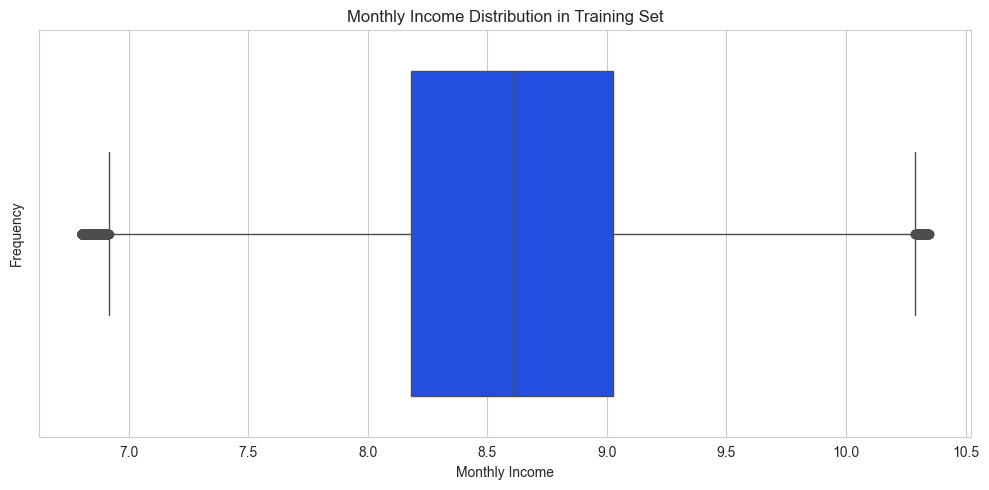

In [409]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    data=credit_train_zip_eda[outliers_income_mask == 1],
    x='MonthlyIncome',
    ax=ax
)
ax.set_title('Monthly Income Distribution in Training Set')
ax.set_xlabel('Monthly Income')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [410]:
outlier_detector = IsolationForest(
    contamination=0.05,
    random_state=42
)

In [411]:
outlier_detector.fit(credit_train_zip_eda[['MonthlyIncome']])

IsolationForest(contamination=0.05, random_state=42)

In [412]:
outliers_series = outlier_detector.predict(credit_train_zip_eda[['MonthlyIncome']])

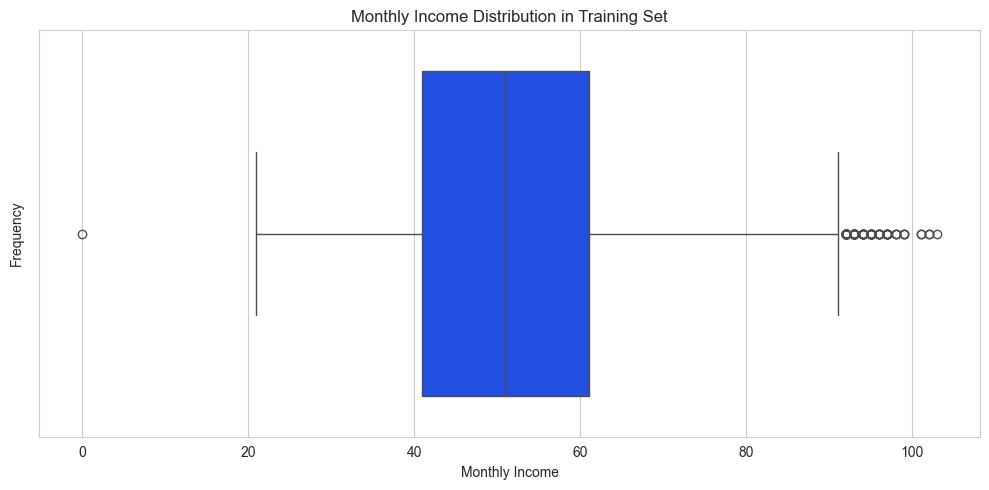

In [413]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    data=credit_train_zip_eda[outliers_series == 1],
    x='age',
    ax=ax
)
ax.set_title('Monthly Income Distribution in Training Set')
ax.set_xlabel('Monthly Income')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [414]:
print(f"Total Number of Samples: {credit_train_zip_eda.shape[0]}")
print(f"Number of Outliers in MonthlyIncome Column detected using Isolation Forest Method: {np.sum(outliers_series == -1)}")
print(f"Number of Inliers in MonthlyIncome Column detected using Isolation Forest Method: {np.sum(outliers_series == 1)}")
print(f"Percentage of Outliers in MonthlyIncome Column detected using Isolation Forest Method: {(credit_train_zip_eda[outliers_series == -1].shape[0] / credit_train_zip_eda.shape[0] * 100):.5f}%")
print(f"Percentage of Inliers in MonthlyIncome Column detected using Isolation Forest Method: {(credit_train_zip_eda[outliers_series == 1].shape[0] / credit_train_zip_eda.shape[0] * 100):.5f}%")

Total Number of Samples: 120269
Number of Outliers in MonthlyIncome Column detected using Isolation Forest Method: 5954
Number of Inliers in MonthlyIncome Column detected using Isolation Forest Method: 114315
Percentage of Outliers in MonthlyIncome Column detected using Isolation Forest Method: 4.95057%
Percentage of Inliers in MonthlyIncome Column detected using Isolation Forest Method: 95.04943%


In both implementations of Outlier Remvoal, this feature looks better now, but since the dataset is highly imbalanced, $\approx 3.5%$ from Boxplot Method and $\approx 4.7%$ from Isolation Forest of the `MonthlyIncome` samples is quite big. A solution is to flag potential outliers and create a new feature that will comprise the far points of very low and very high `MonthlyIncome` instead of just dropping them, since they might be a result of natural variance from original scale of values and, respectivelly, have an impact on the target variable.

In [415]:
min_age = credit_train_zip_eda['age'].min()
max_age = credit_train_zip_eda['age'].max()

age_bins = [min_age, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, max_age]
age_labels = [f'{min_age}-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', f'101-{max_age}']

age_binned = pd.cut(credit_train_zip_eda[outliers_income_mask == 1]['age'], bins=age_bins, labels=age_labels, include_lowest=True)

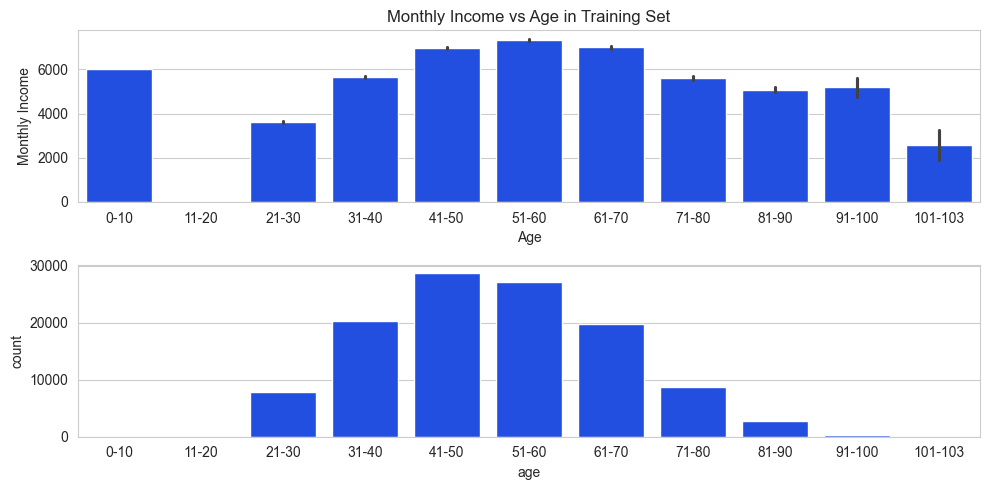

In [416]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

sns.barplot(
    x=age_binned,
    y=np.expm1(credit_train_zip_eda[outliers_income_mask == 1]['MonthlyIncome']),
    ax=axes[0]
)
axes[0].set_title('Monthly Income vs Age in Training Set')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Monthly Income')

sns.countplot(
    x=age_binned,
    ax=axes[1]
)

plt.tight_layout()
plt.show()

As it may be seen, highest amount of monthly income is achieved by people in between 41 and 70 years old. At the same time, the highest count of the people are in between the same range of age. Besides that, lowest income is presented by people from 21-30 years old and 90+ years old. However, since 90+ years old people count is very low, their income may be not very suggestive, due to the low variance in these specific age groups. Also, there is some anomaly in the dataset - there is or are multiple samples of people in between 0 and 10 years old with a high income. Since no error bar is displayed, there might be a single record within that age group, which, again, is not representative and is most probably noise. As a conclusion, middle age people are the persons that earn the highest amount of money monthly, while young adults and old people have on average lower income.

In [417]:
credit_train_zip_eda['EstimatedMonthlyDebt'] = np.expm1(credit_train_zip_eda[outliers_income_mask == 1]['MonthlyIncome']) * credit_train_zip_eda[outliers_income_mask == 1]['DebtRatio']

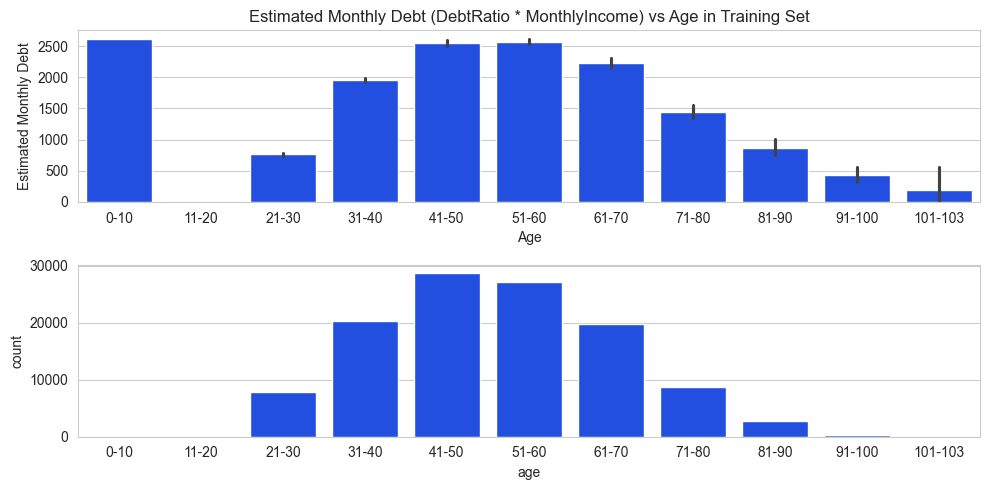

In [418]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

sns.barplot(
    x=age_binned,
    y=credit_train_zip_eda['EstimatedMonthlyDebt'],
    ax=axes[0]
)
axes[0].set_title('Estimated Monthly Debt (DebtRatio * MonthlyIncome) vs Age in Training Set')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Estimated Monthly Debt')

sns.countplot(
    x=age_binned,
    ax=axes[1]
)

plt.tight_layout()
plt.show()

Since `DebtRatio` represents borrowers monthly debt payments, living costs and alimony divided by their monthly gross income, from the reversed operation (`MonthlyIncome` $\cdot$ `DebtRatio`), may be estimated their monthly debt payment amount. As it may be noticed, similar as in previous case, the age group with highest amount of monthly debt are the people of middle age, between 41 and 70 years old, and people with lowest month debt are people of adult young age and old people. Therefore, there might be a direct proportioanl relationship between the monthly income and monthly debt, which is reasonable, since on average, people will borrow money if they have the finances to return them back.

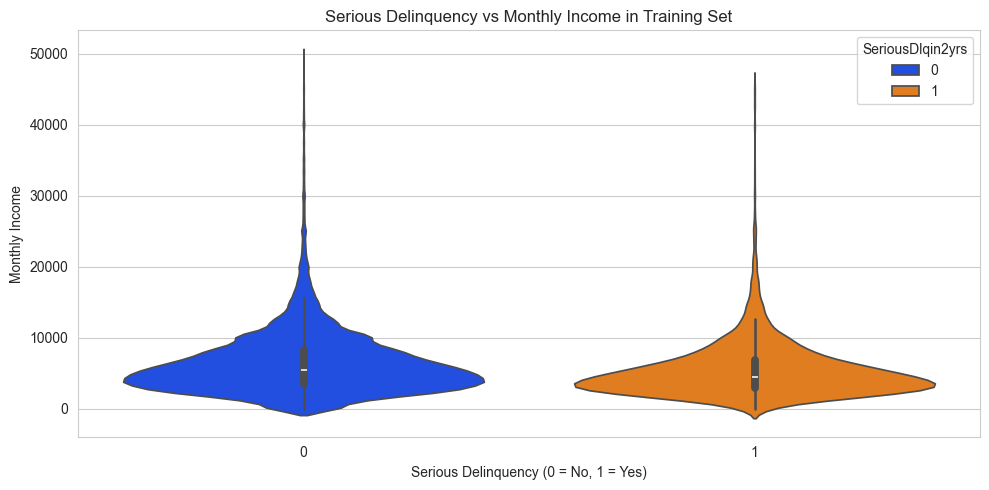

In [419]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x=credit_train_zip_eda[np.expm1(credit_train_zip_eda['MonthlyIncome']) < 5e4]['SeriousDlqin2yrs'],
    y=np.expm1(credit_train_zip_eda[np.expm1(credit_train_zip_eda['MonthlyIncome']) < 5e4]['MonthlyIncome']),
    hue=credit_train_zip_eda[np.expm1(credit_train_zip_eda['MonthlyIncome']) < 5e4]['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Serious Delinquency vs Monthly Income in Training Set')
ax.set_xlabel('Serious Delinquency (0 = No, 1 = Yes)')
ax.set_ylabel('Monthly Income')

plt.tight_layout()
plt.show()

As it may be noticed, on the reduced training set, there is no significant difference in whether people encountered serious delinquency in the past 2 years, based on their monthly income. However, people with less income were slightly higher rate of encountering delinquency in the past 2 years than people with higher monthly income. Remembering the fact that this dataset is heavily imbalanced, this may not be very conclusive, since there are considerably less records about people that are in the possitive class of the target.

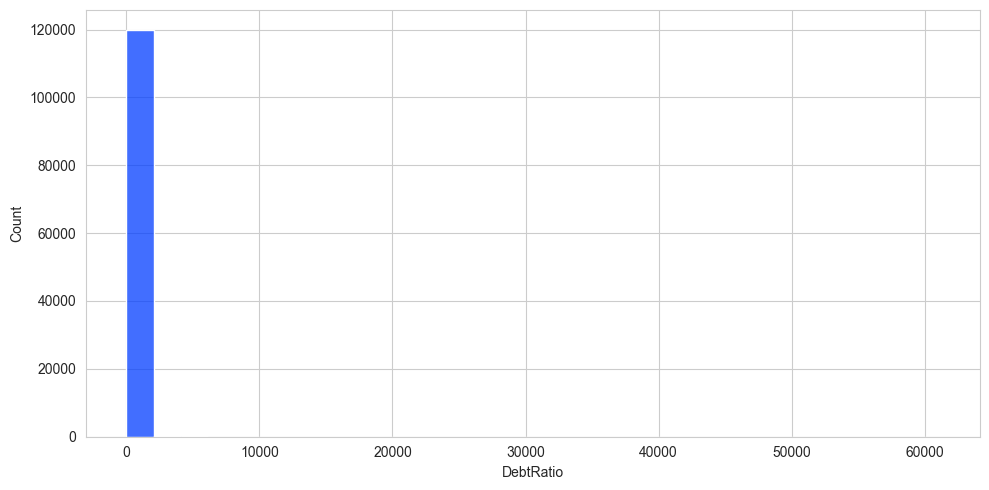

In [420]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.histplot(
    data=credit_train_zip_eda,
    x='DebtRatio',
    bins=30,
    ax=ax
)

plt.tight_layout()
plt.show()

As it may be noticed, the histogram of the `DebtRatio` is inconclusive, due to the presence of outliers. In previous section was mentioned that `DebtRatio` at 75 percentile is present the value $\approx 0.87$, while maximum is $329664$, which obviously skews this feature. Therefore, this feature will cut to properly visualize it. Arbitrarily was selected value $2$ to exclude higher Debt Ratios from the dataset.

In [421]:
(credit_train_zip_eda['DebtRatio'] > 2).value_counts()

DebtRatio
False    116968
True       3301
Name: count, dtype: int64

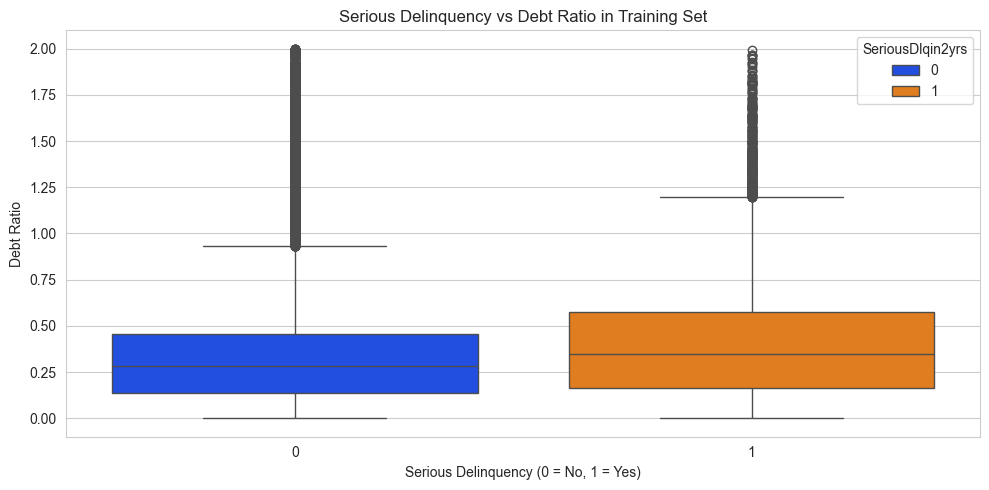

In [422]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    x=credit_train_zip_eda[credit_train_zip_eda['DebtRatio'] < 2]['SeriousDlqin2yrs'],
    y=credit_train_zip_eda[credit_train_zip_eda['DebtRatio'] < 2]['DebtRatio'],
    hue=credit_train_zip_eda[credit_train_zip_eda['DebtRatio'] < 2]['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Serious Delinquency vs Debt Ratio in Training Set')
ax.set_xlabel('Serious Delinquency (0 = No, 1 = Yes)')
ax.set_ylabel('Debt Ratio')

plt.tight_layout()
plt.show()

As a result, people with higher Debt Ratio are slightly likely to experience 90 days past due delinquency, since the higher debt ratio means bigger difference between the total amount of monthly debt payments and their monthly income, making them less capable of properly paying back in time. People that were severily over due have an average Debt Ratio higher than $\approx 0.35$, while people with no serious delinquency - $\approx 0.27$.

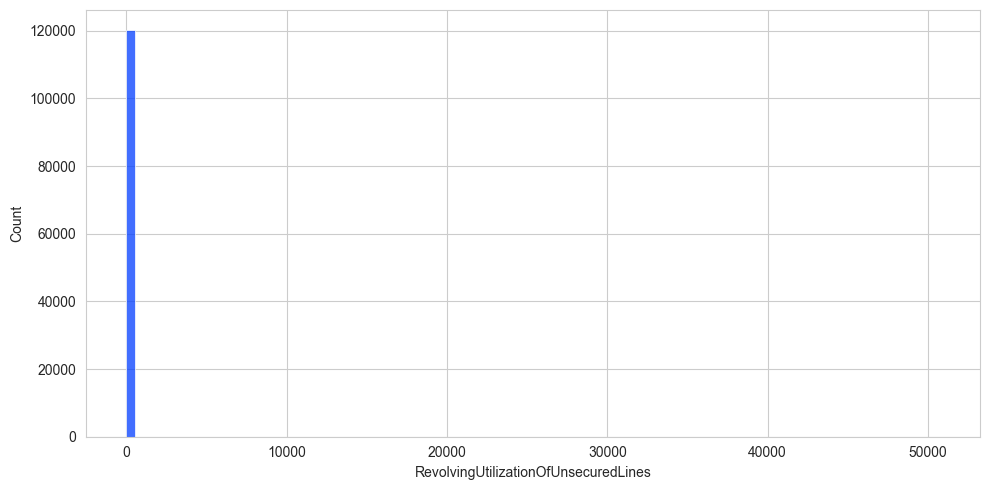

In [423]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.histplot(
    data=credit_train_zip_eda,
    x='RevolvingUtilizationOfUnsecuredLines',
    bins=100,
    ax=ax
)

plt.tight_layout()
plt.show()

In [424]:
(credit_train_zip_eda['RevolvingUtilizationOfUnsecuredLines'] > 2).value_counts()

RevolvingUtilizationOfUnsecuredLines
False    119991
True        278
Name: count, dtype: int64

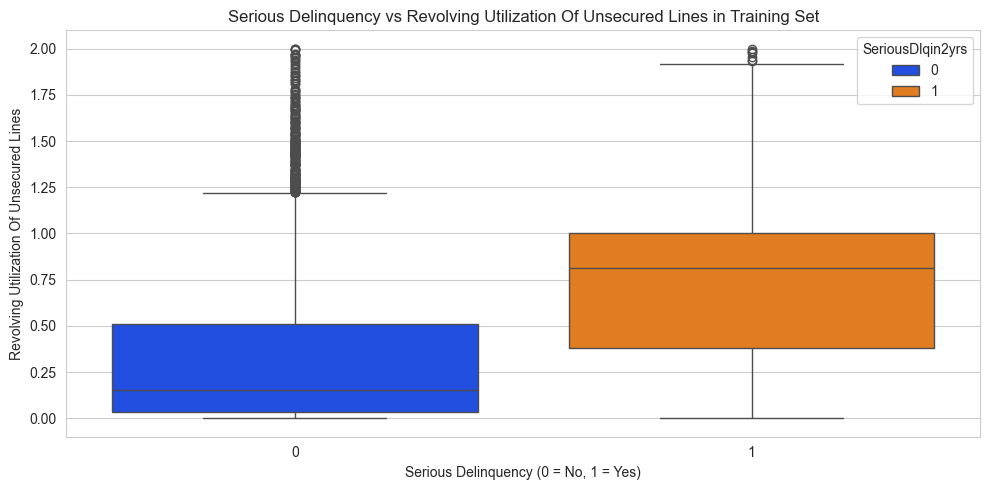

In [425]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    x=credit_train_zip_eda[credit_train_zip_eda['RevolvingUtilizationOfUnsecuredLines'] < 2]['SeriousDlqin2yrs'],
    y=credit_train_zip_eda[credit_train_zip_eda['RevolvingUtilizationOfUnsecuredLines'] < 2]['RevolvingUtilizationOfUnsecuredLines'],
    hue=credit_train_zip_eda[credit_train_zip_eda['RevolvingUtilizationOfUnsecuredLines'] < 2]['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Serious Delinquency vs Revolving Utilization Of Unsecured Lines in Training Set')
ax.set_xlabel('Serious Delinquency (0 = No, 1 = Yes)')
ax.set_ylabel('Revolving Utilization Of Unsecured Lines')

plt.tight_layout()
plt.show()

Revolving Utilization of Unsecured Lines in this dataset refers to the ratio between the total balance on credit cards and total credit limits. In other words, if borrower spents all the money that banks landed them, the Revolving Utilization will be equal to $1$, making them less trustworthy from the perspective of banks, since they uses all the money they borrowed, and it makes them less capable of paying back. As expected, persons with higher percentage are significantly inclined to experience delinquency.

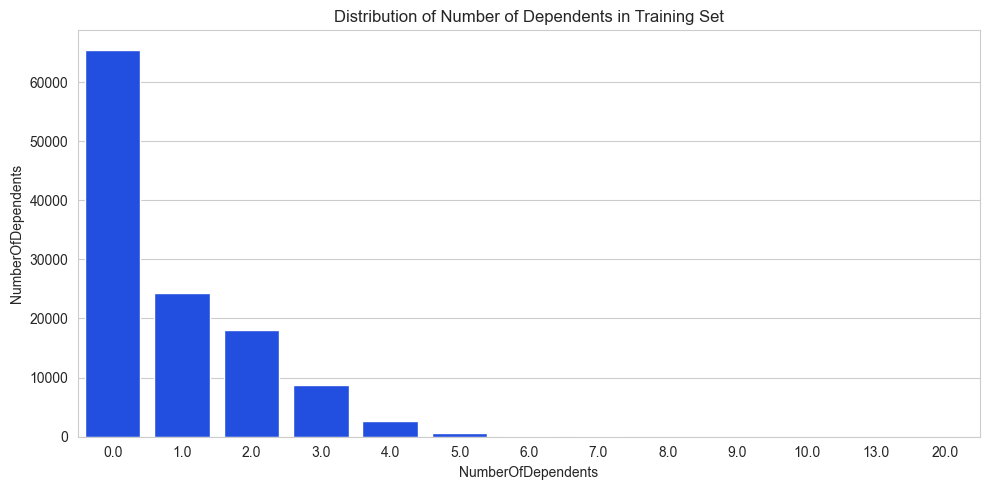

In [426]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.countplot(
    x=credit_train_zip_eda['NumberOfDependents'],
    ax=ax
)
ax.set_title('Distribution of Number of Dependents in Training Set')
ax.set_ylabel('NumberOfDependents')

plt.tight_layout()
plt.show()

Most borrowers have no dependents or at least 1 dependent.

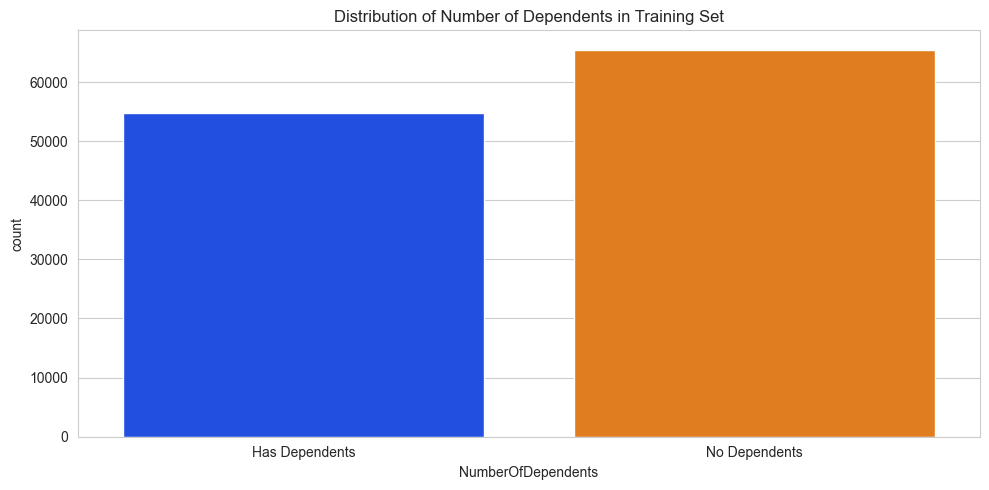

In [427]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.countplot(
    x=np.where(credit_train_zip_eda['NumberOfDependents'] == 0, 'No Dependents', 'Has Dependents'),
    hue=np.where(credit_train_zip_eda['NumberOfDependents'] == 0, 'No Dependents', 'Has Dependents'),
    ax=ax
)
ax.set_title('Distribution of Number of Dependents in Training Set')
ax.set_xlabel('NumberOfDependents')

plt.tight_layout()
plt.show()

In the above plot is represented the count plot of borrowers with no dependents, in other words - family members or people that rely on financial support of the borrower, and people with at least one dependent. All categories combined together are still slightly less than people with no dependents, but is now more comparable.

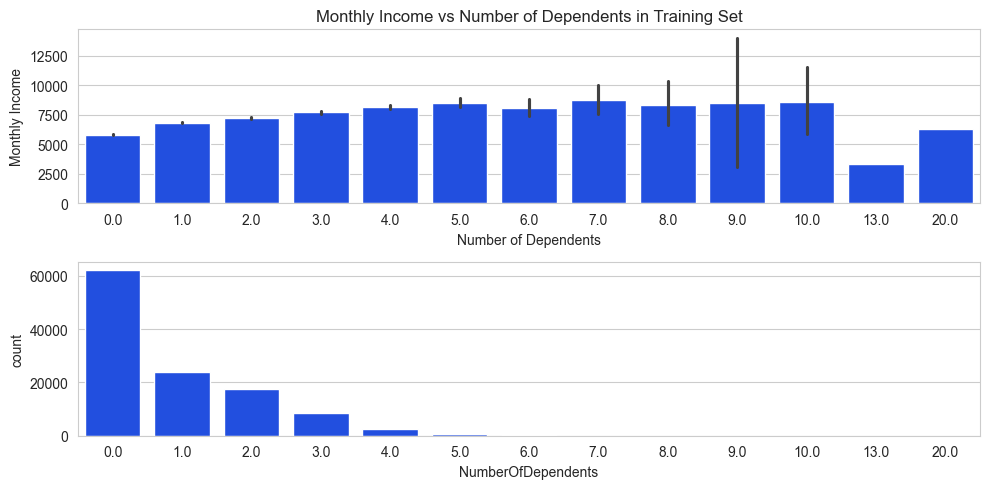

In [428]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

sns.barplot(
    x=credit_train_zip_eda[outliers_income_mask == 1]['NumberOfDependents'],
    y=np.expm1(credit_train_zip_eda[outliers_income_mask == 1]['MonthlyIncome']),
    ax=axes[0]
)
axes[0].set_title('Monthly Income vs Number of Dependents in Training Set')
axes[0].set_xlabel('Number of Dependents')
axes[0].set_ylabel('Monthly Income')

sns.countplot(
    x=credit_train_zip_eda[outliers_income_mask == 1]['NumberOfDependents'],
    ax=axes[1]
)

plt.tight_layout()
plt.show()

As it may be noticed, higher number of dependents results in higher monthly income, which is logic since more money is needed to support family and other dependents. However, there are small numbers of samples with borrowers with more than 3 dependents, therefore their monthly income is not precise and holds little variance.

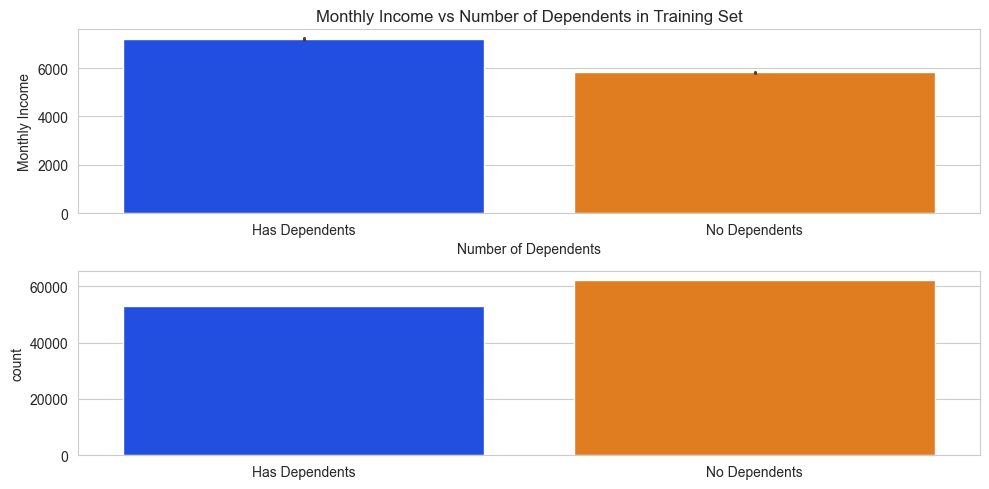

In [429]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

sns.barplot(
    x=np.where(credit_train_zip_eda[outliers_income_mask == 1]['NumberOfDependents'] == 0, 'No Dependents', 'Has Dependents'),
    y=np.expm1(credit_train_zip_eda[outliers_income_mask == 1]['MonthlyIncome']),
    hue=np.where(credit_train_zip_eda[outliers_income_mask == 1]['NumberOfDependents'] == 0, 'No Dependents', 'Has Dependents'),
    ax=axes[0]
)
axes[0].set_title('Monthly Income vs Number of Dependents in Training Set')
axes[0].set_xlabel('Number of Dependents')
axes[0].set_ylabel('Monthly Income')

sns.countplot(
    x=np.where(credit_train_zip_eda[outliers_income_mask == 1]['NumberOfDependents'] == 0, 'No Dependents', 'Has Dependents'),
    hue=np.where(credit_train_zip_eda[outliers_income_mask == 1]['NumberOfDependents'] == 0, 'No Dependents', 'Has Dependents'),
    ax=axes[1]
)

plt.tight_layout()
plt.show()

As a result of aggregation, borrowers with no dependents, on average, have lower monthly income than people with at least one dependent.

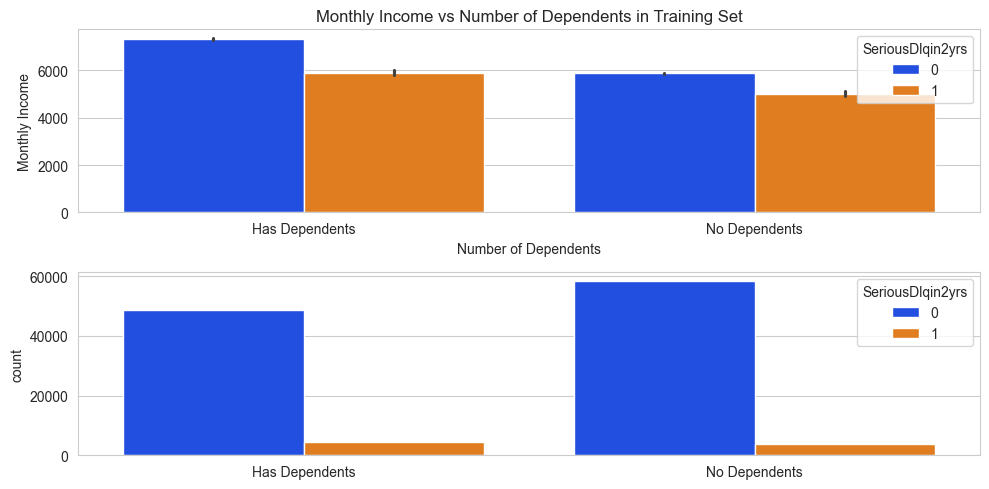

In [430]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

sns.barplot(
    x=np.where(credit_train_zip_eda[outliers_income_mask == 1]['NumberOfDependents'] == 0, 'No Dependents', 'Has Dependents'),
    y=np.expm1(credit_train_zip_eda[outliers_income_mask == 1]['MonthlyIncome']),
    hue=credit_train_zip_eda[outliers_income_mask == 1]['SeriousDlqin2yrs'],
    ax=axes[0]
)
axes[0].set_title('Monthly Income vs Number of Dependents in Training Set')
axes[0].set_xlabel('Number of Dependents')
axes[0].set_ylabel('Monthly Income')

sns.countplot(
    x=np.where(credit_train_zip_eda[outliers_income_mask == 1]['NumberOfDependents'] == 0, 'No Dependents', 'Has Dependents'),
    hue=credit_train_zip_eda[outliers_income_mask == 1]['SeriousDlqin2yrs'],
    ax=axes[1]
)

plt.tight_layout()
plt.show()

From the plot above may be derived that borrowers with at least one dependent and encountered delinquency has considerably lower monthly income that borrowers with one or more dependents and no delinquency. Similar trend is observed in the group of borrowers with no dependents at all.

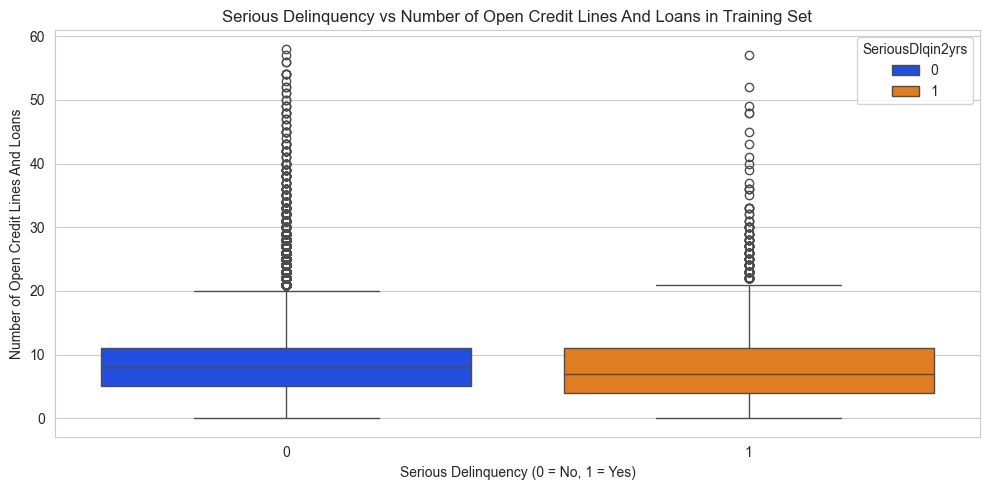

In [431]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    x=credit_train_zip_eda['SeriousDlqin2yrs'],
    y=credit_train_zip_eda['NumberOfOpenCreditLinesAndLoans'],
    hue=credit_train_zip_eda['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Serious Delinquency vs Number of Open Credit Lines And Loans in Training Set')
ax.set_xlabel('Serious Delinquency (0 = No, 1 = Yes)')
ax.set_ylabel('Number of Open Credit Lines And Loans')

plt.tight_layout()
plt.show()

No noticeable difference between the number of open credit lines and loans between borrowers that encountered serious delinquence and those who did not.

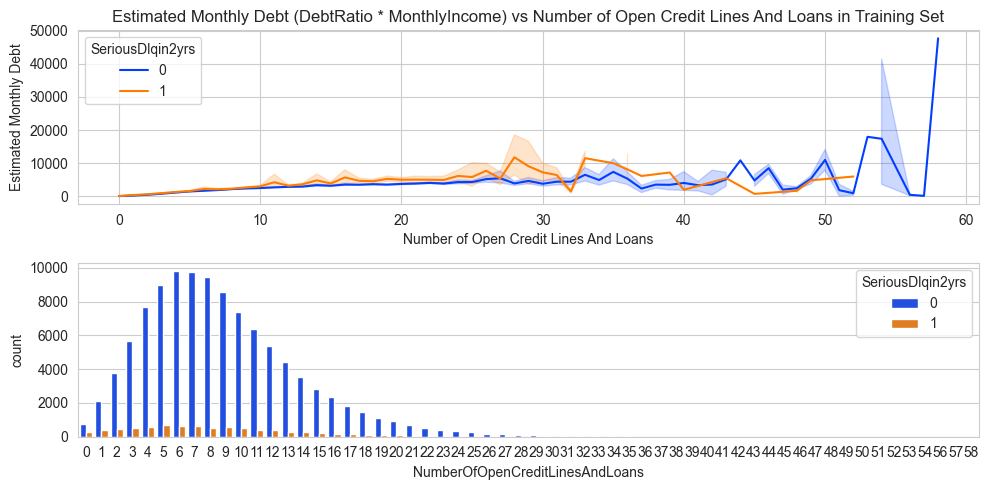

In [432]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

sns.lineplot(
    x=credit_train_zip_eda[outliers_income_mask == 1]['NumberOfOpenCreditLinesAndLoans'],
    y=np.expm1(credit_train_zip_eda[outliers_income_mask == 1]['MonthlyIncome']) * credit_train_zip_eda[outliers_income_mask == 1]['DebtRatio'],
    hue=credit_train_zip_eda[outliers_income_mask == 1]['SeriousDlqin2yrs'],
    ax=axes[0]
)
axes[0].set_title('Estimated Monthly Debt (DebtRatio * MonthlyIncome) vs Number of Open Credit Lines And Loans in Training Set')
axes[0].set_xlabel('Number of Open Credit Lines And Loans')
axes[0].set_ylabel('Estimated Monthly Debt')

sns.countplot(
    x=credit_train_zip_eda[outliers_income_mask == 1]['NumberOfOpenCreditLinesAndLoans'],
    hue=credit_train_zip_eda[outliers_income_mask == 1]['SeriousDlqin2yrs'],
    ax=axes[1]
)

plt.tight_layout()
plt.show()

As it may be observed, on average, borrowers have from 3 to 9 open credit lines and loans. Also, higher number of open loans results in higher estimated monthly debt. In the category of higher count of samples is distinguished slightly higher monthly debt for people that encountered serious delinquency.

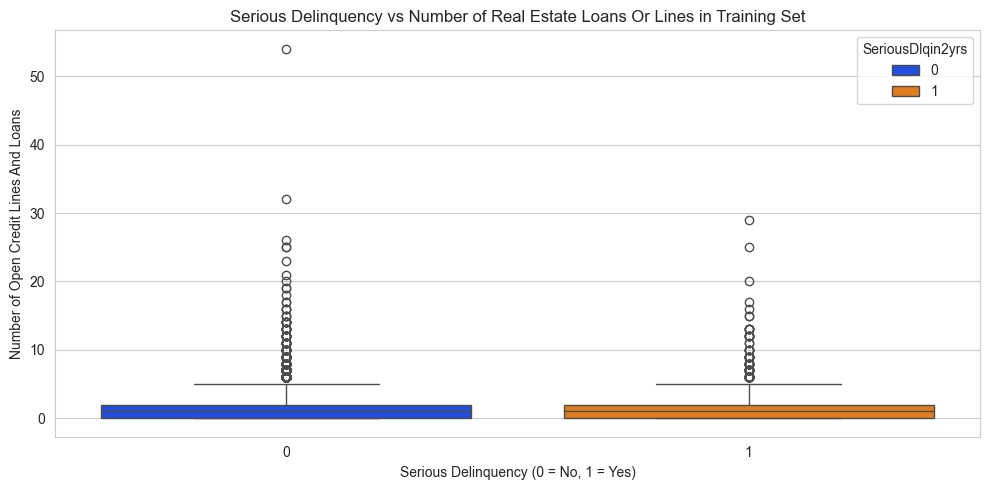

In [433]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    x=credit_train_zip_eda['SeriousDlqin2yrs'],
    y=credit_train_zip_eda['NumberRealEstateLoansOrLines'],
    hue=credit_train_zip_eda['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Serious Delinquency vs Number of Real Estate Loans Or Lines in Training Set')
ax.set_xlabel('Serious Delinquency (0 = No, 1 = Yes)')
ax.set_ylabel('Number of Open Credit Lines And Loans')

plt.tight_layout()
plt.show()

Again, no significant difference in the distributions of Number of Real Estate Loans Or Lines between borrowers that manifeste delinquency and those who did not, which may be a result 

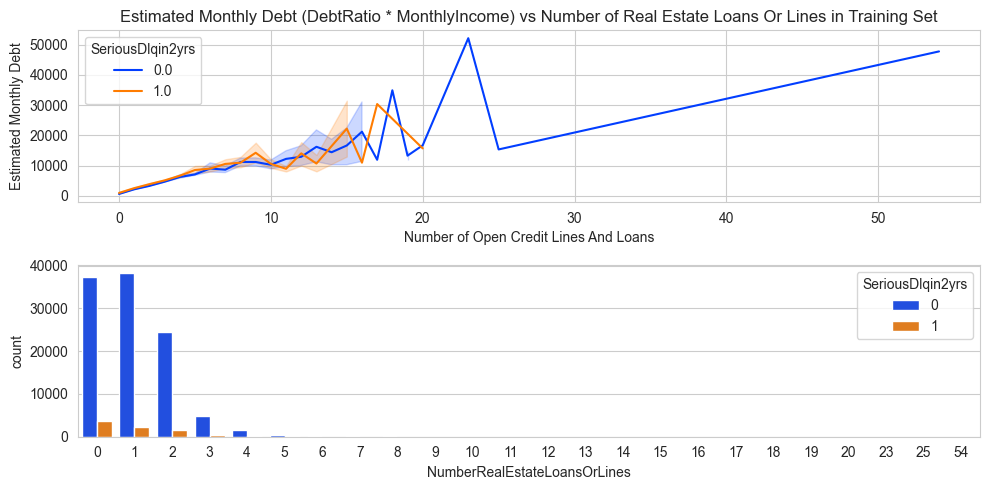

In [434]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

sns.lineplot(
    x=credit_train_zip_eda[outliers_income_mask == 1]['NumberRealEstateLoansOrLines'],
    y=credit_train_zip_eda['EstimatedMonthlyDebt'],
    hue=credit_train_zip_eda[outliers_income_mask == 1]['SeriousDlqin2yrs'],
    ax=axes[0]
)
axes[0].set_title('Estimated Monthly Debt (DebtRatio * MonthlyIncome) vs Number of Real Estate Loans Or Lines in Training Set')
axes[0].set_xlabel('Number of Open Credit Lines And Loans')
axes[0].set_ylabel('Estimated Monthly Debt')

sns.countplot(
    x=credit_train_zip_eda[outliers_income_mask == 1]['NumberRealEstateLoansOrLines'],
    hue=credit_train_zip_eda[outliers_income_mask == 1]['SeriousDlqin2yrs'],
    ax=axes[1]
)

plt.tight_layout()
plt.show()

As it may be noticed, higher number of open credit lines and loans results in higher monthly debt. Since there are very few positive target samples, it may be inconclusive. However, there is no significant difference between the monthly debt based on the number of real estate loans.

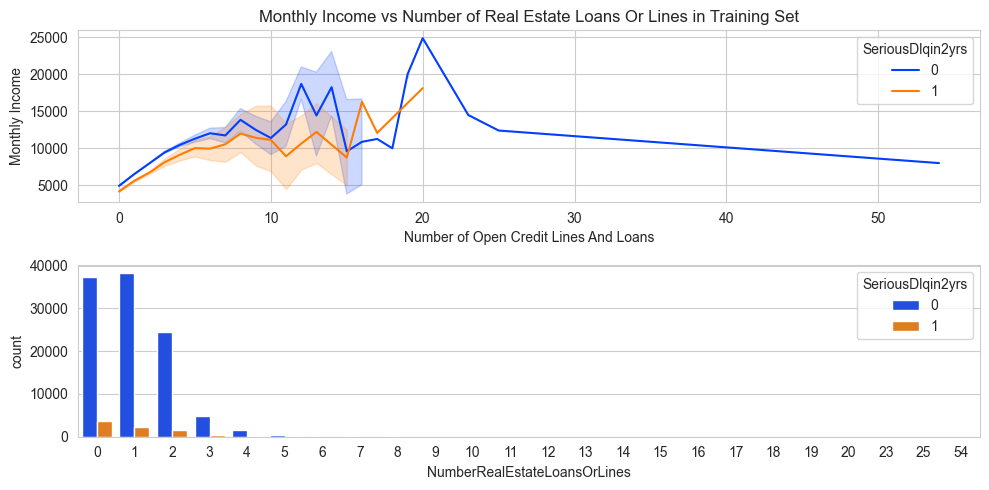

In [435]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

sns.lineplot(
    x=credit_train_zip_eda[outliers_income_mask == 1]['NumberRealEstateLoansOrLines'],
    y=np.expm1(credit_train_zip_eda[outliers_income_mask == 1]['MonthlyIncome']),
    hue=credit_train_zip_eda[outliers_income_mask == 1]['SeriousDlqin2yrs'],
    ax=axes[0]
)
axes[0].set_title('Monthly Income vs Number of Real Estate Loans Or Lines in Training Set')
axes[0].set_xlabel('Number of Open Credit Lines And Loans')
axes[0].set_ylabel('Monthly Income')

sns.countplot(
    x=credit_train_zip_eda[outliers_income_mask == 1]['NumberRealEstateLoansOrLines'],
    hue=credit_train_zip_eda[outliers_income_mask == 1]['SeriousDlqin2yrs'],
    ax=axes[1]
)

plt.tight_layout()
plt.show()

If plotted against the monthly income, there is a difference between borrowers with delinquency and without - those who manifeste serious delinquency had lower monthly income than those who did not manifested serious violations.

In [436]:
credit_train_zip_eda['TotalNumberOfTimePastDue'] = credit_train_zip_eda['NumberOfTime30-59DaysPastDueNotWorse'] + credit_train_zip_eda['NumberOfTime60-89DaysPastDueNotWorse'] + credit_train_zip_eda['NumberOfTimes90DaysLate']

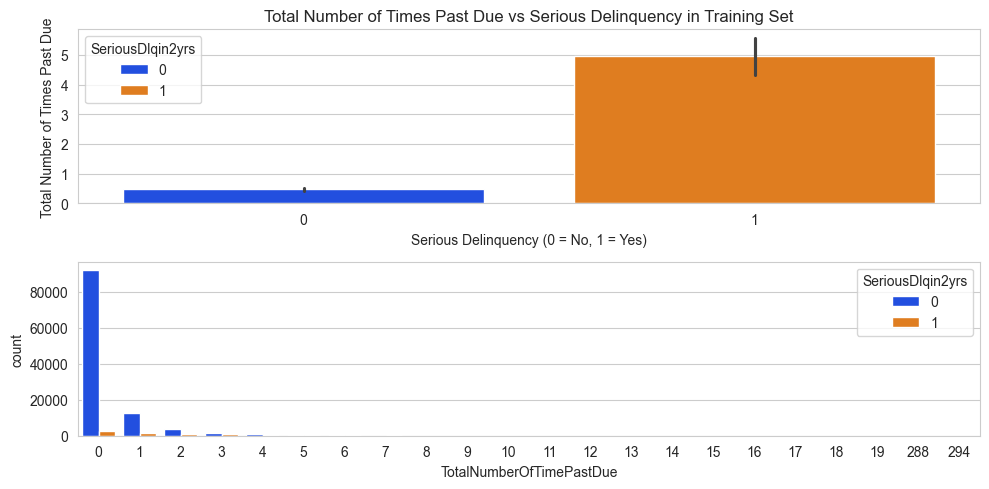

In [437]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

sns.barplot(
    x=credit_train_zip_eda['SeriousDlqin2yrs'],
    y=credit_train_zip_eda['TotalNumberOfTimePastDue'],
    hue=credit_train_zip_eda['SeriousDlqin2yrs'],
    ax=axes[0]
)
axes[0].set_title('Total Number of Times Past Due vs Serious Delinquency in Training Set')
axes[0].set_xlabel('Serious Delinquency (0 = No, 1 = Yes)')
axes[0].set_ylabel('Total Number of Times Past Due')

sns.countplot(
    x=credit_train_zip_eda['TotalNumberOfTimePastDue'],
    hue=credit_train_zip_eda['SeriousDlqin2yrs'],
    ax=axes[1]
)

plt.tight_layout()
plt.show()

As it may be noticed, most people that encountered delinquency were past due with payback a lot more than borrowers that did not.

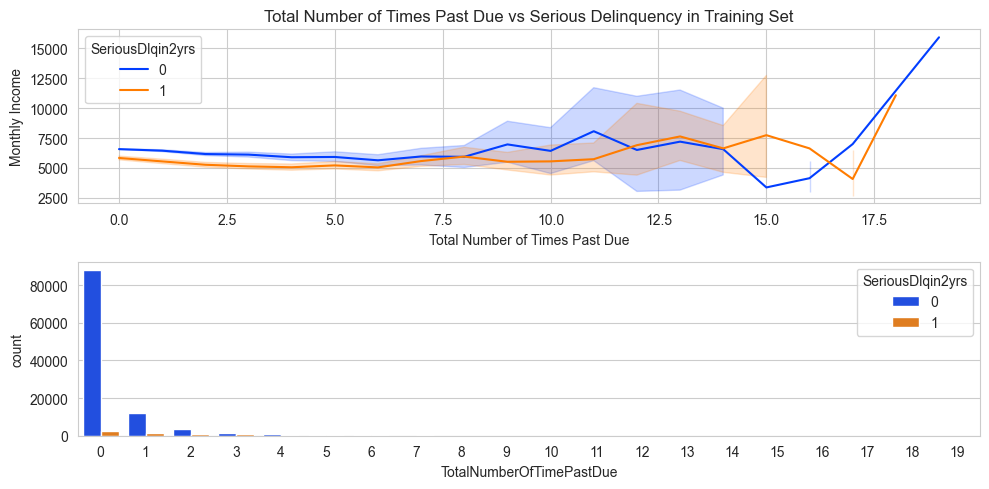

In [438]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

sns.lineplot(
    x=credit_train_zip_eda[(outliers_income_mask == 1) & (credit_train_zip_eda['TotalNumberOfTimePastDue'] < 20)]['TotalNumberOfTimePastDue'],
    y=np.expm1(credit_train_zip_eda[(outliers_income_mask == 1) & (credit_train_zip_eda['TotalNumberOfTimePastDue'] < 20)]['MonthlyIncome']),
    hue=credit_train_zip_eda[(outliers_income_mask == 1) & (credit_train_zip_eda['TotalNumberOfTimePastDue'] < 20)]['SeriousDlqin2yrs'],
    ax=axes[0]
)
axes[0].set_title('Total Number of Times Past Due vs Serious Delinquency in Training Set')
axes[0].set_xlabel('Total Number of Times Past Due')
axes[0].set_ylabel('Monthly Income')

sns.countplot(
    x=credit_train_zip_eda[(outliers_income_mask == 1) & (credit_train_zip_eda['TotalNumberOfTimePastDue'] < 20)]['TotalNumberOfTimePastDue'],
    hue=credit_train_zip_eda[(outliers_income_mask == 1) & (credit_train_zip_eda['TotalNumberOfTimePastDue'] < 20)]['SeriousDlqin2yrs'],
    ax=axes[1]
)

plt.tight_layout()
plt.show()

Also, on the average, people that borrowed money from the banks and had a higher monthly income did not experience delinquency like people that had lower income and were at the same number of days past due with their payback.

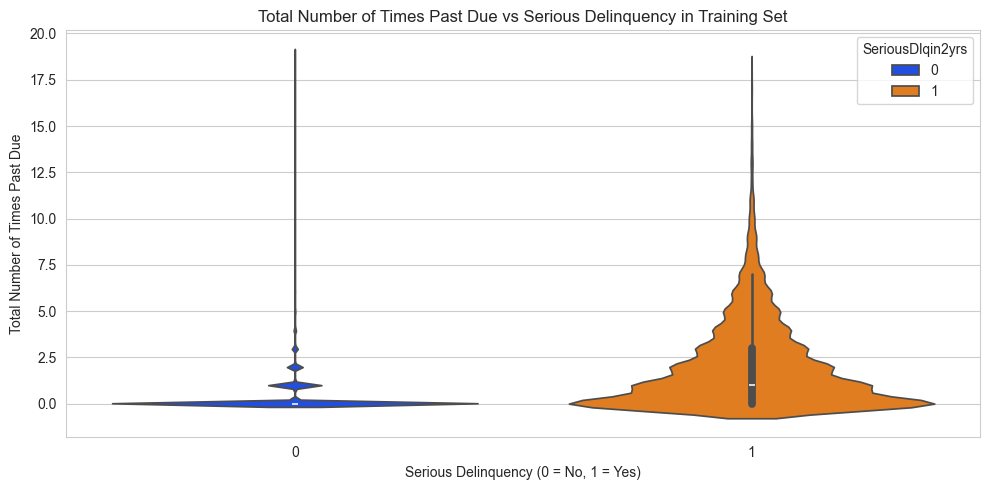

In [439]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x=credit_train_zip_eda[(credit_train_zip_eda['RevolvingUtilizationOfUnsecuredLines'] < 2) & (credit_train_zip_eda['TotalNumberOfTimePastDue'] < 50)]['SeriousDlqin2yrs'],
    y=credit_train_zip_eda[(credit_train_zip_eda['RevolvingUtilizationOfUnsecuredLines'] < 2) & (credit_train_zip_eda['TotalNumberOfTimePastDue'] < 50)]['TotalNumberOfTimePastDue'],
    hue=credit_train_zip_eda[(credit_train_zip_eda['RevolvingUtilizationOfUnsecuredLines'] < 2) & (credit_train_zip_eda['TotalNumberOfTimePastDue'] < 50)]['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Total Number of Times Past Due vs Serious Delinquency in Training Set')
ax.set_xlabel('Serious Delinquency (0 = No, 1 = Yes)')
ax.set_ylabel('Total Number of Times Past Due')

plt.tight_layout()
plt.show()

Most people that were over due with their loans were more likely to manifest delinquency in the past 2 years, however, there are still people that manifested delinquency while having lower number of past due occurences, while people that did not encounter delinquency were mostly people with very low number of past due paybacks or even without them.

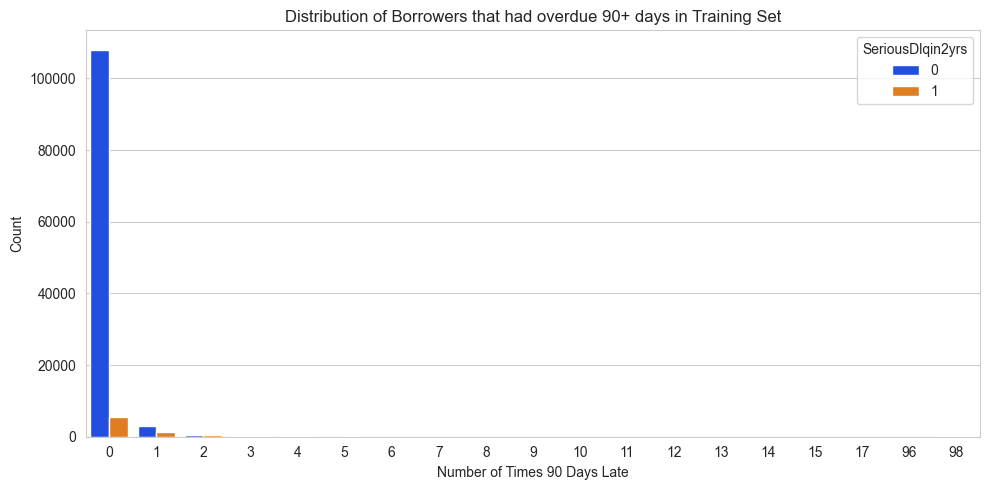

In [440]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.countplot(
    x=credit_train_zip_eda['NumberOfTimes90DaysLate'],
    hue=credit_train_zip_eda['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Distribution of Borrowers that had overdue 90+ days in Training Set')
ax.set_xlabel('Number of Times 90 Days Late')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Most records capture borrowers that did not pass the 90 days past due period, however several counts of at least 1 occurence of 90+ day overdue was recorded

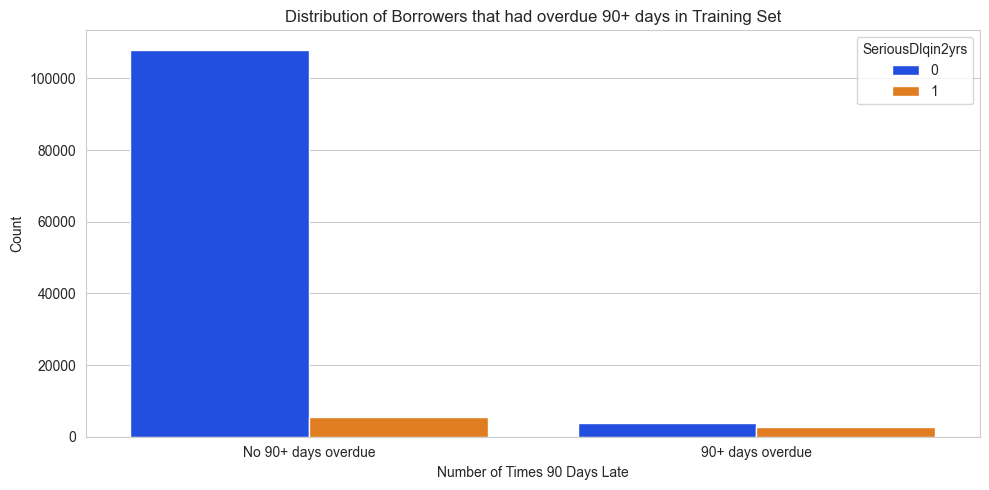

In [441]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.countplot(
    x=np.where(credit_train_zip_eda['NumberOfTimes90DaysLate'] == 0, 'No 90+ days overdue', '90+ days overdue'),
    hue=credit_train_zip_eda['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Distribution of Borrowers that had overdue 90+ days in Training Set')
ax.set_xlabel('Number of Times 90 Days Late')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

This feature is highly imbalanced. Taken in consideration that most people that did not encounter delinquency did not get past 90 days of not paying back, this number of people is greatly reduced in at least 1 occurence of that behavior, getting very close to the number of people that encountered delinquency and had at least one 90+ days overdue.

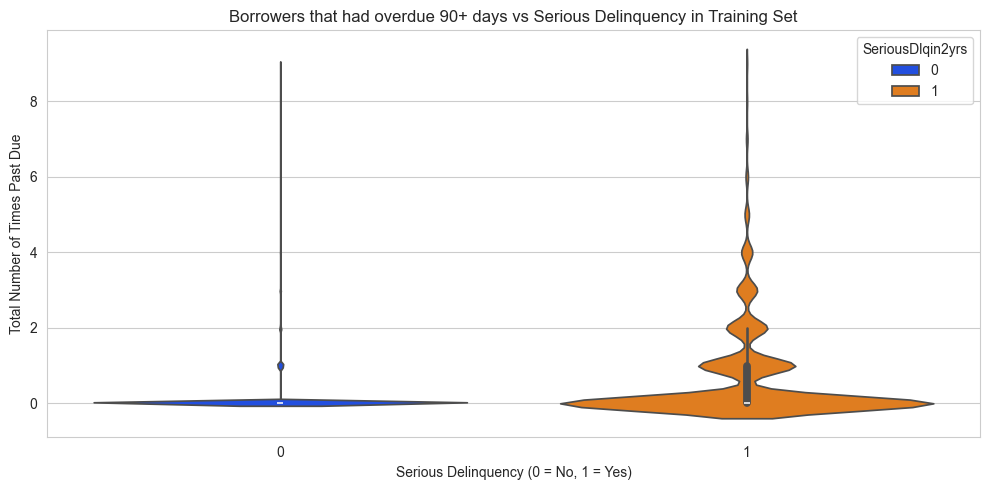

In [442]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x=credit_train_zip_eda[credit_train_zip_eda['NumberOfTimes90DaysLate'] < 10]['SeriousDlqin2yrs'],
    y=credit_train_zip_eda[credit_train_zip_eda['NumberOfTimes90DaysLate'] < 10]['NumberOfTimes90DaysLate'],
    hue=credit_train_zip_eda[credit_train_zip_eda['NumberOfTimes90DaysLate'] < 10]['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Borrowers that had overdue 90+ days vs Serious Delinquency in Training Set')
ax.set_xlabel('Serious Delinquency (0 = No, 1 = Yes)')
ax.set_ylabel('Total Number of Times Past Due')

plt.tight_layout()
plt.show()

Higher number of people that encountered delinquency had beed overdue 90+ days in comparison with the fewer number of people who did not manifest delinquency. 

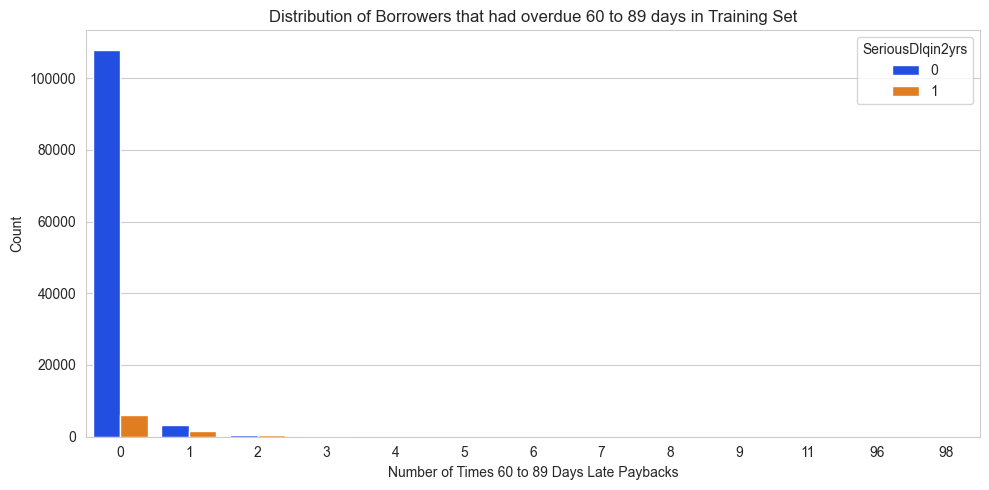

In [443]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.countplot(
    x=credit_train_zip_eda['NumberOfTime60-89DaysPastDueNotWorse'],
    hue=credit_train_zip_eda['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Distribution of Borrowers that had overdue 60 to 89 days in Training Set')
ax.set_xlabel('Number of Times 60 to 89 Days Late Paybacks')
ax.set_ylabel('Count')

plt.tight_layout()

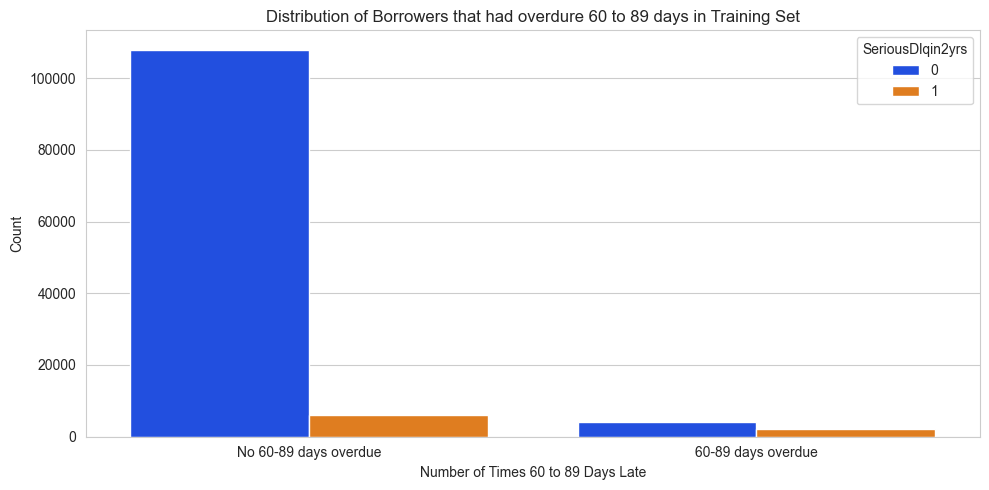

In [444]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.countplot(
    x=np.where(credit_train_zip_eda['NumberOfTime60-89DaysPastDueNotWorse'] == 0, 'No 60-89 days overdue', '60-89 days overdue'),
    hue=credit_train_zip_eda['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Distribution of Borrowers that had overdure 60 to 89 days in Training Set')
ax.set_xlabel('Number of Times 60 to 89 Days Late')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Similar relationship as in previous case with 90+ days overdue paybacks.

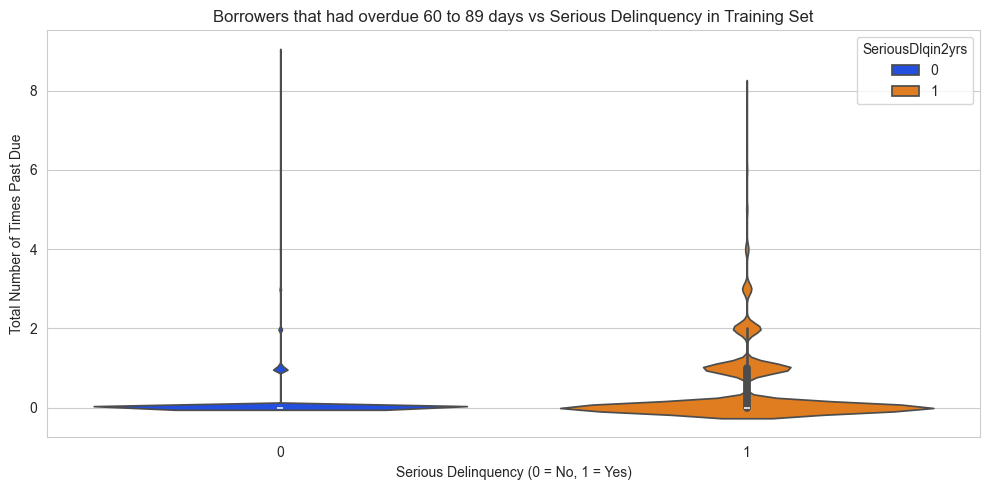

In [445]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x=credit_train_zip_eda[credit_train_zip_eda['NumberOfTime60-89DaysPastDueNotWorse'] < 10]['SeriousDlqin2yrs'],
    y=credit_train_zip_eda[credit_train_zip_eda['NumberOfTime60-89DaysPastDueNotWorse'] < 10]['NumberOfTime60-89DaysPastDueNotWorse'],
    hue=credit_train_zip_eda[credit_train_zip_eda['NumberOfTime60-89DaysPastDueNotWorse'] < 10]['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Borrowers that had overdue 60 to 89 days vs Serious Delinquency in Training Set')
ax.set_xlabel('Serious Delinquency (0 = No, 1 = Yes)')
ax.set_ylabel('Total Number of Times Past Due')

plt.tight_layout()
plt.show()

Slightly higher number of people that encountered delinquency had beed overdue 60 to 89 days in comparison with the fewer number of people who did not manifest delinquency in the same range of past due occasions. 

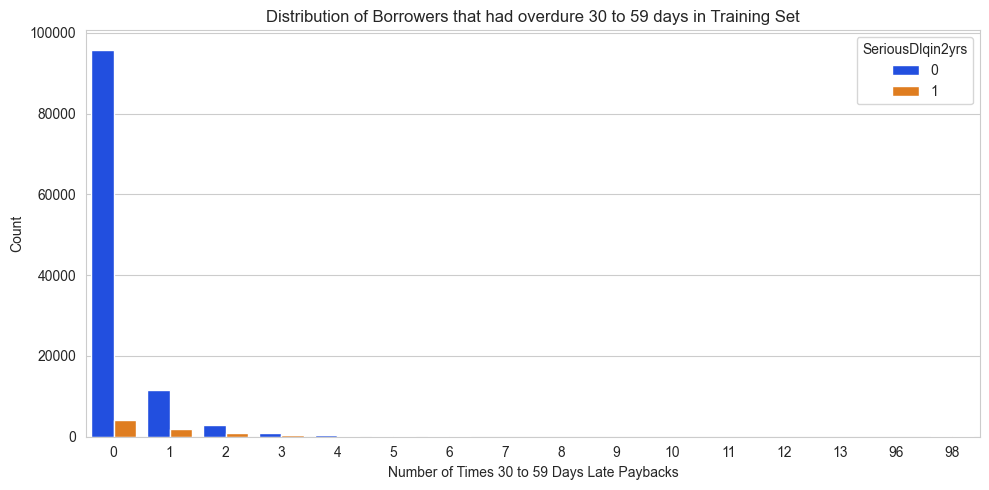

In [446]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.countplot(
    x=credit_train_zip_eda['NumberOfTime30-59DaysPastDueNotWorse'],
    hue=credit_train_zip_eda['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Distribution of Borrowers that had overdure 30 to 59 days in Training Set')
ax.set_xlabel('Number of Times 30 to 59 Days Late Paybacks')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

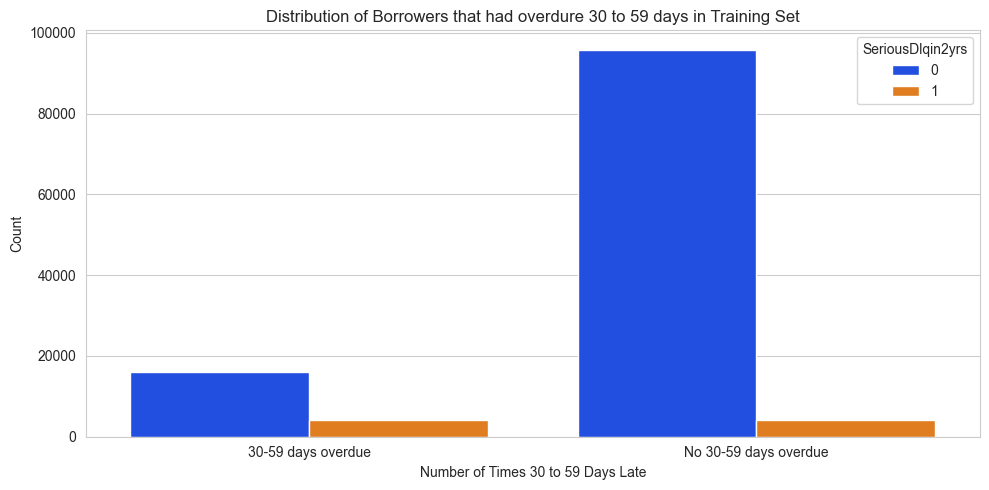

In [447]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.countplot(
    x=np.where(credit_train_zip_eda['NumberOfTime30-59DaysPastDueNotWorse'] == 0, 'No 30-59 days overdue', '30-59 days overdue'),
    hue=credit_train_zip_eda['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Distribution of Borrowers that had overdure 30 to 59 days in Training Set')
ax.set_xlabel('Number of Times 30 to 59 Days Late')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Again, no significant difference than in previous cases of overdue. People that did not have overdue payments.

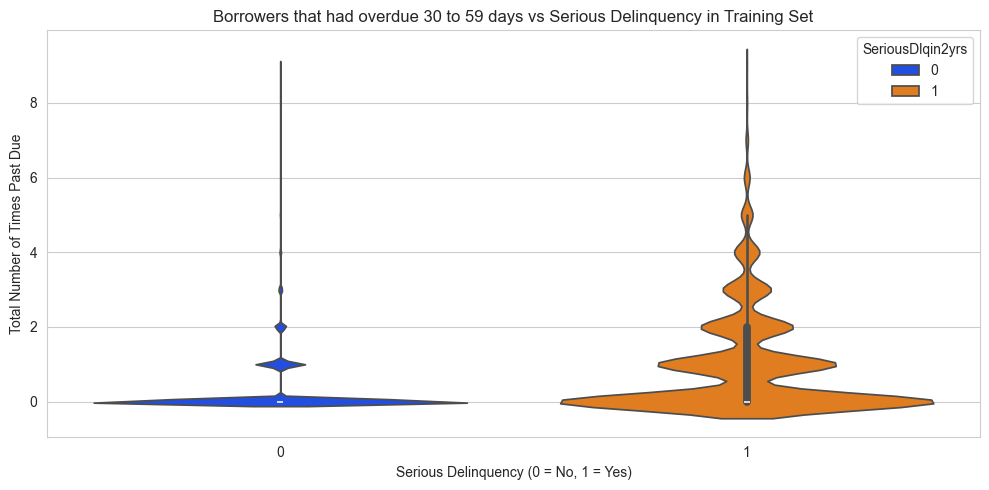

In [448]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x=credit_train_zip_eda[credit_train_zip_eda['NumberOfTime30-59DaysPastDueNotWorse'] < 10]['SeriousDlqin2yrs'],
    y=credit_train_zip_eda[credit_train_zip_eda['NumberOfTime30-59DaysPastDueNotWorse'] < 10]['NumberOfTime30-59DaysPastDueNotWorse'],
    hue=credit_train_zip_eda[credit_train_zip_eda['NumberOfTime30-59DaysPastDueNotWorse'] < 10]['SeriousDlqin2yrs'],
    ax=ax
)
ax.set_title('Borrowers that had overdue 30 to 59 days vs Serious Delinquency in Training Set')
ax.set_xlabel('Serious Delinquency (0 = No, 1 = Yes)')
ax.set_ylabel('Total Number of Times Past Due')

plt.tight_layout()
plt.show()

Significantly higher number of people that encountered delinquency had beed overdue 30 to 59 days in comparison with the fewer number of people who did not manifest delinquency in the same range of past due occasions. Also, many borrowers that had delinquency in the past 2 years had nmumerous past due paybacks, which decreases their credibility.

### Missing Values

In [449]:
print(credit_train_zip.isnull().sum())

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [450]:
print(credit_test_zip.isnull().sum())

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64


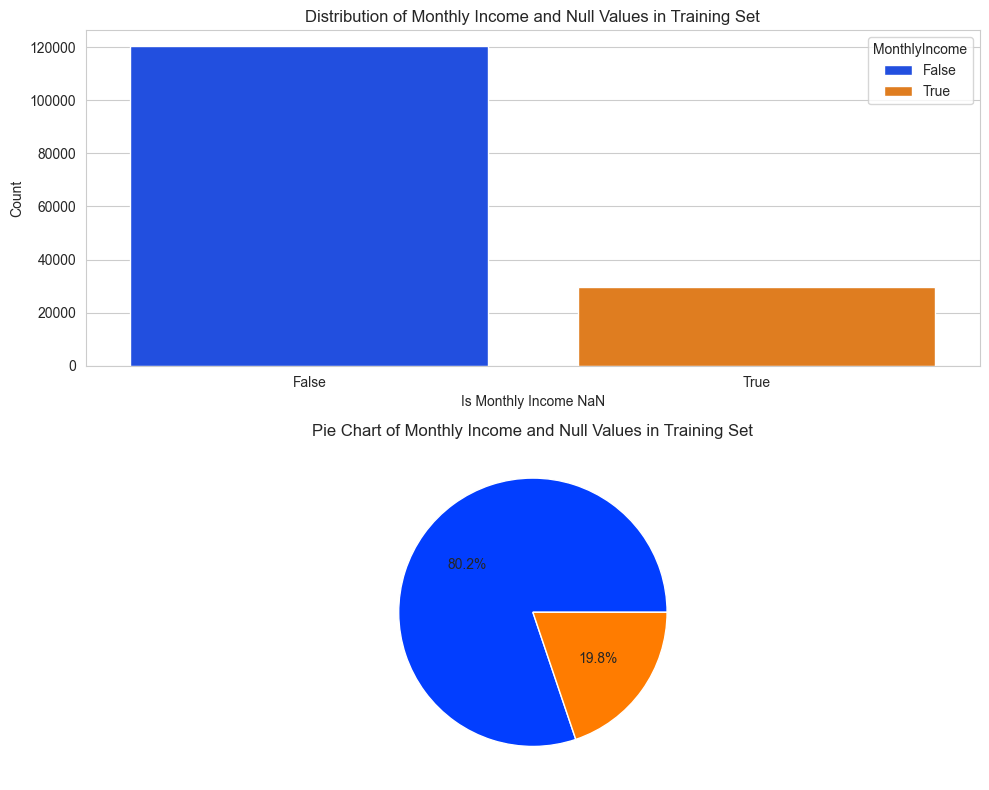

In [451]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.countplot(x=credit_train_zip['MonthlyIncome'].isnull(), 
              ax=axes[0],
              hue=credit_train_zip['MonthlyIncome'].isnull()
              )
axes[0].set_title('Distribution of Monthly Income and Null Values in Training Set')
axes[0].set_xlabel('Is Monthly Income NaN')
axes[0].set_ylabel('Count')

axes[1].pie(
    credit_train_zip['MonthlyIncome'].isnull().value_counts(),
    autopct='%1.1f%%',
)
axes[1].set_title('Pie Chart of Monthly Income and Null Values in Training Set')

plt.tight_layout()
plt.show()

Since there is a significant portion of the dataset with missing monthly income values, more advanced imputation techniques should be used in order to replace them with numerical values. One way to do that is to select a subset of features that may affect the monthly income of the borrower and train a model-based Imputation techniques, such as: K-Nearest Neighbosr Imputer.

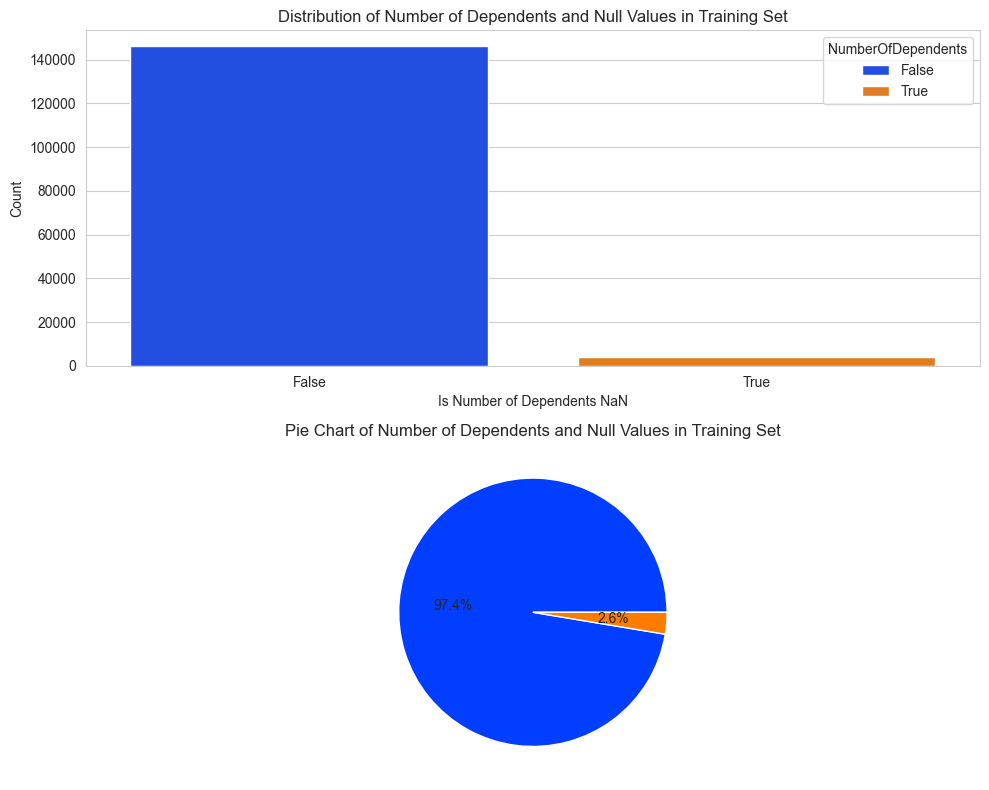

In [452]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.countplot(x=credit_train_zip['NumberOfDependents'].isnull(), 
              ax=axes[0],
              hue=credit_train_zip['NumberOfDependents'].isnull()
              )
axes[0].set_title('Distribution of Number of Dependents and Null Values in Training Set')
axes[0].set_xlabel('Is Number of Dependents NaN')
axes[0].set_ylabel('Count')

axes[1].pie(
    credit_train_zip['NumberOfDependents'].isnull().value_counts(),
    autopct='%1.1f%%',
)
axes[1].set_title('Pie Chart of Number of Dependents and Null Values in Training Set')

plt.tight_layout()
plt.show()

There are not so many rows in `NumberOfDependents` column with missing values, therefore basic imputation technique may be used, such as: Median Imputation, since the distribution is skewed and there are no intermediate values, only integers.

## Model Selection

For the ML models that can be used, were analyzed the following options:
1. **Random Forest Classifier**, since it is robust to outliers and does not require scaling of the features to be done;
2. **XGBoost Classifier**, similar concept as Random Forest, but different implementation. It builds sequentially Decision Trees and each new tree corrects errors made by the previous ones. It is suitable when the dataset is large, as it is a fast algorithm, again - robust to outliers and feature scale;
3. **LightGBM Classifier**, similar to XGBoost, with slightly different tree building mechanism, faster training time, but less likely to find a generalized model and is less robust to outliers and noise in dataset.
3. **Logistic Regression** - the most basic classifier, fits the sigmoid function curve, offers fast computations and straight-forward interpretation of the results;
4. **Support Vector Machine Classifier** - powerful ML Model, but it requires data be standardized, which expects the data adhere to Gaussian Distribution. However, as it was described above, not all features are following this distribution. Also, it is very computationally expensive even on small datasets and does not support parallelization by default.
5. **K-Nearest Neighbors Classifier** - non-parametric (no assumption required for data distribution) algorithm with output being the class membership of a data point, based on the majority of type of its neighbors. Calculates the distance between each point, therefore is computationally intensive.

Since the dataset is not very large, will be attempted to train all of the above models, except Support Vector Machine Classifier, since it still is very computationally expensive, even on small dataset.

## Dataset Preparation

1. `_zip` - only `cs-train.csv` is used, for local score determination, models are trained on a subset of the Kaggle training set;
2. `_sub` - both `cs-train.csv` and `cs-test.csv` are used, for Kaggle submission of the predictions.

In [453]:
credit_train_zip: pd.DataFrame = pd.read_csv(filepath_or_buffer='dataset/cs-training.csv', sep=',')
credit_test_zip: pd.DataFrame = pd.read_csv(filepath_or_buffer='dataset/cs-test.csv', sep=',')

In [454]:
credit_train_zip_X: pd.DataFrame = credit_train_zip.drop(columns=['SeriousDlqin2yrs'])
credit_train_zip_y: pd.Series = credit_train_zip['SeriousDlqin2yrs']

In [455]:
X_train_zip, X_test_zip, y_train_zip, y_test_zip = train_test_split(
    credit_train_zip_X,
    credit_train_zip_y,
    test_size=0.2,
    random_state=42
)

In [456]:
X_train_sub: pd.DataFrame = credit_train_zip.drop(columns=['SeriousDlqin2yrs'])
y_train_sub: pd.Series = credit_train_zip['SeriousDlqin2yrs']
X_test_sub: pd.DataFrame = credit_test_zip.drop(columns=['SeriousDlqin2yrs'])

## Utils - General

In [457]:
def plot_roc_curve_from_probabilities(y_true: np.ndarray, y_prob_pred: np.ndarray, estimator_name: str = None) -> None:
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_prob_pred, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(
        fpr=fpr,
        tpr=tpr,
        roc_auc=roc_auc,
        estimator_name=estimator_name if estimator_name is not None else estimator_name.__class__.__name__
    )
    
    display.plot()
    plt.show()

In [458]:
def plot_roc_curve_from_estimator(X: pd.DataFrame | np.ndarray, y: pd.Series | np.ndarray, estimator: BaseEstimator, estimator_name: str = None) -> None:
    RocCurveDisplay.from_estimator(
        estimator=estimator, 
        X=X, 
        y=y,
        name=estimator_name if estimator_name is not None else estimator.__class__.__name__
    )
    
    plt.show()

In [459]:
def plot_precision_recall_curve_from_probabilities(y_true: np.ndarray, y_prob_pred: np.ndarray, pos_label: int = 1, estimator_name: str = None) -> None:
    precision, recall, _ = precision_recall_curve(y_true=y_true, y_score=y_prob_pred, pos_label=pos_label)
    average_precision = average_precision_score(y_true=y_true, y_score=y_prob_pred, pos_label=pos_label)
    display = PrecisionRecallDisplay(
        precision=precision,
        recall=recall,
        average_precision=average_precision,
        estimator_name=estimator_name if estimator_name is not None else estimator_name.__class__.__name__
    )
    
    display.plot()
    plt.show()

In [460]:
def plot_precision_recall_curve_from_estimator(X: pd.DataFrame | np.ndarray, y: pd.Series | np.ndarray, estimator: BaseEstimator, estimator_name: str = None) -> None:
    PrecisionRecallDisplay.from_estimator(
        estimator=estimator, 
        X=X,
        y=y,
        name=estimator_name if estimator_name is not None else estimator.__class__.__name__
    )
    
    plt.show()

In [461]:
def print_classification_report(model_name: str,
                                y_true: pd.Series,
                                y_pred: pd.Series,
                                modifiers: str) -> None:
    print(f'{model_name} - {modifiers} - Accuracy Score: {accuracy_score(y_true=y_true, y_pred=y_pred)}')
    print(classification_report(y_true=y_true, y_pred=y_pred))

In [462]:
def plot_confusion_matrix(model_name: str, 
                          y_true: pd.Series, 
                          y_pred: pd.Series,
                          modifiers: str) -> None:
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{model_name} Classification Report - {modifiers}')
    plt.grid(False)
    plt.show()

In [463]:
def save_predictions_to_sub_file(filepath_to_sample: str,
                                 filepath_to_save: str,
                                 y_pred: pd.Series,
                                 model_name: str,
                                 modifiers: str) -> None:
    sample_entry = pd.read_csv(filepath_to_sample)
    df_submission = pd.DataFrame({'Id': sample_entry['Id'], 'Probability': y_pred})

    df_submission.to_csv(f'{filepath_to_save}/submission_{modifiers}_{model_name}.csv', index=False)

In [464]:
def create_pipeline(steps: list[tuple[str, BaseEstimator]]) -> Pipeline:
    return Pipeline(steps=steps).set_output(transform='pandas')

In [465]:
model_performance_df: pd.DataFrame = pd.DataFrame(columns=['Score'])
model_performance_df.index = pd.MultiIndex.from_product(iterables=[[], []], names=['Model', 'Metric'])

In [466]:
def compute_model_info_metrics(y_true: pd.Series | np.ndarray, y_pred: pd.Series | np.ndarray, y_pred_proba: pd.Series | np.ndarray, estimator_name: str) -> dict[str, Number]:
    model_specific_info_metrics: dict[str, dict | str] = {
        'Model_Name': estimator_name,
        'Model_Metrics': {
            'Accuracy': accuracy_score(y_true=y_true, y_pred=y_pred),
            'Precision (0)': precision_score(y_true=y_true, y_pred=y_pred, pos_label=0),
            'Recall (0)': recall_score(y_true=y_true, y_pred=y_pred, pos_label=0),
            'F1 Score (0)': f1_score(y_true=y_true, y_pred=y_pred, pos_label=0),
            'Precision (1)': precision_score(y_true=y_true, y_pred=y_pred, pos_label=1),
            'Recall (1)': recall_score(y_true=y_true, y_pred=y_pred, pos_label=1),
            'F1 Score (1)': f1_score(y_true=y_true, y_pred=y_pred, pos_label=1),
            'ROC AUC Score': roc_auc_score(y_true=y_true, y_score=y_pred_proba),
            'PR AUC Score': average_precision_score(y_true=y_true, y_score=y_pred_proba)
        }
    }

    return model_specific_info_metrics

In [467]:
def add_to_df(metrics_dict: dict[str, Number], estimator_name: str, old_df: pd.DataFrame) -> pd.DataFrame:
    df_copy: pd.DataFrame = old_df.copy()

    index_iterables: list[str | list] = [[estimator_name], list(metrics_dict.keys())]
    new_multi_index = pd.MultiIndex.from_product(iterables=index_iterables, names=['Model', 'Metric'])

    new_scores = pd.DataFrame({'Score': list(metrics_dict.values())}, index=new_multi_index)

    df_copy = pd.concat([df_copy, new_scores])
    return df_copy

In [468]:
def create_comparison_df(y_true: pd.Series | np.ndarray, 
                         y_pred: pd.Series | np.ndarray, 
                         y_pred_proba: pd.Series | np.ndarray) -> pd.DataFrame:
    comparison_df = pd.concat(
        [
            y_true.rename('y_true'),
            pd.Series(y_pred, index=y_true.index, name='y_pred'),
            pd.Series(y_pred_proba, index=y_true.index, name='y_pred_proba')
        ],
        axis=1
    )

    return comparison_df

In [469]:
def plot_metrics(metrics_df: pd.DataFrame) -> None:
    metrics = metrics_df.index.get_level_values("Metric").unique()
    models = metrics_df.index.get_level_values("Model").unique()
    n_metrics = len(metrics)

    colors = ['red', 'orange', 'yellow', 'blue', 'black']
    color_map = dict(zip(models, colors))

    ncols = 2
    nrows = (n_metrics + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3 * nrows), sharex=True)
    axes = axes.flatten()

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        ax.set_title(metric)

        for model in models:
            score = metrics_df.loc[(model, metric), "Score"]
            color = color_map[model]

            ax.hlines(
                y=score,
                xmin=0,
                xmax=1,
                label=model,
                color=color
            )
            
            ax.text(1.02, score, f"{score:.3f}", va='center', fontsize=8)
        
        ax.set_xlim(0, 1)
        ax.tick_params(left=True, labelleft=True)
        ax.grid(True)

    fig.suptitle("Model Comparison by Metric", fontsize=16)
    fig.supylabel("Score", fontsize=12)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=len(models), bbox_to_anchor=(0.5, 1.02))
    fig.legend(handles, labels, loc='lower center', ncol=len(models), bbox_to_anchor=(0.5, -0.02))

    plt.tight_layout()
    plt.show()

## Models Training - Baseline Performance

In order to observe the efficiency of dataset transformations and to compare model accuracy with the default model behavior on the unchanged dataset, with basic transformations that will ensure fit and predict workflows, training models with default parameters is done, which is known as baseline performance.

### Utils - Baseline Performance

In [470]:
model_names: list[str] = ['K-Nearest Neighbors Classifier (BP)', 'LightGBM Classifier (BP)', 'Logistic Regression (BP)', 'Random Forest Classifier (BP)', 'XGBoost Classifier (BP)']

### Basic Transformations
Below are Transformers that are slightly changing the dataset in order to make model training possible, such as missing values imputation. At the same time, useless column that is responsible for ID is dropped.

In [471]:
transformer_dropper_id = ColumnTransformer(
    transformers=[
        ('drop_id', 'drop', ['Unnamed: 0'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [472]:
transformer_log = FunctionTransformer(
    func=np.log1p,
    inverse_func=np.expm1,
    validate=False,
).set_output(transform='pandas')

In [473]:
# mice_imputer: MICE = MICE()
simple_imputer_median: SimpleImputer = SimpleImputer(strategy='median').set_output(transform='pandas')
simple_imputer_mean: SimpleImputer = SimpleImputer(strategy='mean').set_output(transform='pandas')

In [474]:
null_transformer = ColumnTransformer(
    transformers=[
        ('impute_num_dependents', simple_imputer_median, ['NumberOfDependents']),
        ('impute_mon_income', simple_imputer_mean, ['MonthlyIncome'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [475]:
pipeline_steps: list[tuple[str, TransformerMixin]] = [
    ('drop_id', transformer_dropper_id),
    ('impute_null', null_transformer),
]

In [476]:
fit_transform_pipeline: Pipeline = create_pipeline(
    steps=pipeline_steps
)

In [477]:
X_train_zip_tf = fit_transform_pipeline.fit_transform(
    X=X_train_zip,
    y=y_train_zip
)

In [478]:
X_test_zip_tf = fit_transform_pipeline.transform(
    X=X_test_zip
)

In [479]:
fit_transform_pipeline: Pipeline = create_pipeline(
    steps=pipeline_steps
)

In [480]:
X_train_sub_tf = fit_transform_pipeline.fit_transform(
    X=X_train_sub,
    y=y_train_sub
)

In [481]:
X_test_sub_tf = fit_transform_pipeline.transform(
    X=X_test_sub
)

### Light Gradient Boost Model (LightGBM)

In [482]:
lightgbm_classifier = LGBMClassifier(n_jobs=-1, 
                                   random_state=42, 
                                   device='gpu', 
                                   verbose=2)

#### Local Scoring Training

In [483]:
lightgbm_classifier.fit(X=X_train_zip_tf, y=y_train_zip)

[LightGBM] [Info] Number of positive: 8070, number of negative: 111930
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.834823
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 10
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 Ti Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.92 MB) transferred to GPU in 0.001685 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067250 -> initscore=-2.629720
[LightGBM] [Info] Start training from score -2.629720
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves

LGBMClassifier(device='gpu', n_jobs=-1, random_state=42, verbose=2)

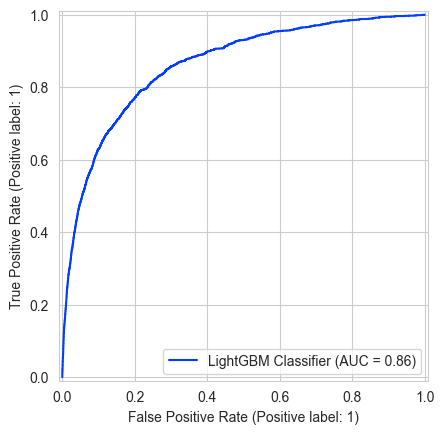

In [484]:
plot_roc_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=lightgbm_classifier, estimator_name='LightGBM Classifier')

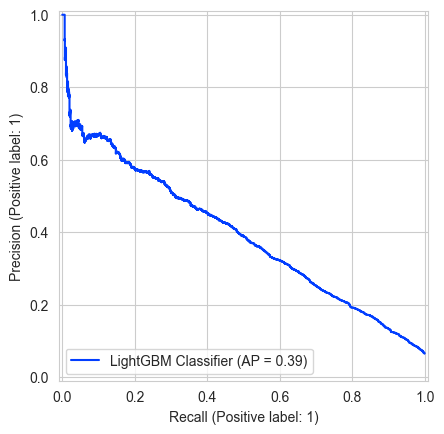

In [485]:
plot_precision_recall_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=lightgbm_classifier, estimator_name='LightGBM Classifier')

In [486]:
y_hat_zip_proba = lightgbm_classifier.predict_proba(X=X_test_zip_tf)[:, 1]

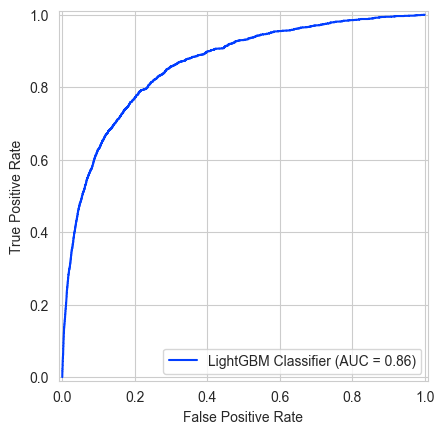

In [487]:
plot_roc_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='LightGBM Classifier')

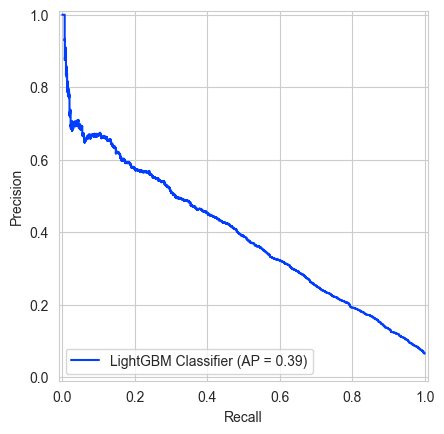

In [488]:
plot_precision_recall_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='LightGBM Classifier')

In [489]:
y_hat_zip = lightgbm_classifier.predict(X=X_test_zip_tf)

In [490]:
print_classification_report(model_name='LightGBM Classifier',
                            y_true=y_test_zip,
                            y_pred=y_hat_zip,
                            modifiers='Baseline Performance')

LightGBM Classifier - Baseline Performance - Accuracy Score: 0.9382666666666667
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.58      0.20      0.29      1956

    accuracy                           0.94     30000
   macro avg       0.76      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



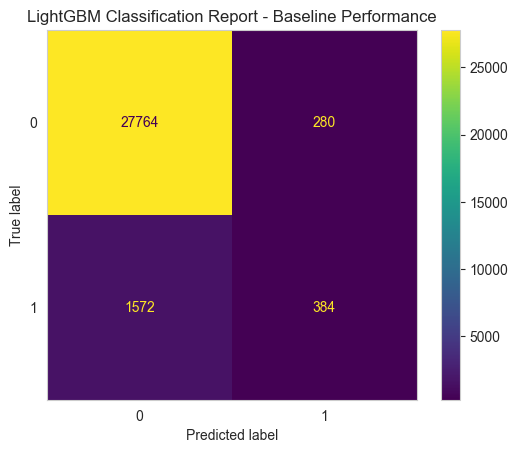

In [491]:
plot_confusion_matrix(model_name='LightGBM',
                      y_true=y_test_zip,
                      y_pred=y_hat_zip,
                      modifiers='Baseline Performance')

As it may be seen, due to the fact that this dataset is highly imbalanced, accuracy is high, since model tends to predict only negative values, therefore precision, recall and F1 Score are very important, since they offer information about minority class separately.

In [492]:
model_info_metrics: dict[str, dict | str] = compute_model_info_metrics(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba, estimator_name='LightGBM Classifier (BP)')

In [493]:
model_performance_df = add_to_df(metrics_dict=model_info_metrics['Model_Metrics'], estimator_name=model_info_metrics['Model_Name'], old_df=model_performance_df)

In [494]:
model_performance_df.xs('LightGBM Classifier (BP)')

Score
Metric                 
Accuracy       0.938267
Precision (0)  0.946414
Recall (0)     0.990016
F1 Score (0)   0.967724
Precision (1)  0.578313
Recall (1)     0.196319
F1 Score (1)   0.293130
ROC AUC Score  0.862365
PR AUC Score   0.393746

In [495]:
comparison_df = create_comparison_df(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba)

In [496]:
comparison_df[comparison_df['y_true'] == 1]

y_true  y_pred  y_pred_proba
41980        1       0      0.274483
7487         1       0      0.203133
25705        1       0      0.015825
49306        1       0      0.079825
95328        1       1      0.536203
...        ...     ...           ...
77138        1       0      0.012231
11762        1       0      0.011622
140370       1       0      0.427991
115214       1       0      0.044248
146029       1       0      0.033238

[1956 rows x 3 columns]

In [497]:
comparison_df[comparison_df['y_true'] == 0]

y_true  y_pred  y_pred_proba
59770        0       0      0.005204
21362        0       0      0.009693
127324       0       0      0.008696
140509       0       0      0.079712
144297       0       0      0.070796
...        ...     ...           ...
30430        0       0      0.058250
63244        0       0      0.009986
104970       0       0      0.073883
53960        0       0      0.006921
49315        0       0      0.012239

[28044 rows x 3 columns]

#### Kaggle Submission Training

In [498]:
lightgbm_classifier = LGBMClassifier(n_jobs=-1, 
                                   random_state=42, 
                                   device='gpu', 
                                   verbose=2)

In [499]:
lightgbm_classifier.fit(X=X_train_sub_tf, y=y_train_sub)

[LightGBM] [Info] Number of positive: 10026, number of negative: 139974
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.834837
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 10
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 Ti Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (1.14 MB) transferred to GPU in 0.001917 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066840 -> initscore=-2.636275
[LightGBM] [Info] Start training from score -2.636275
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leav

LGBMClassifier(device='gpu', n_jobs=-1, random_state=42, verbose=2)

In [500]:
y_hat_sub_proba = lightgbm_classifier.predict_proba(X=X_test_sub_tf)[:, 1]

In [501]:
save_predictions_to_sub_file(filepath_to_sample='dataset/sampleEntry.csv',
                             filepath_to_save='dataset/submissions',
                             y_pred=y_hat_sub_proba,
                             model_name='lightgbm',
                             modifiers='default_bp')

Kaggle Score: `0.86674 | 0.86043`

### eXtreme Gradient Boosting (XGBoost)

In [502]:
xgboost_classifier = XGBClassifier(n_jobs=-1, 
                                 random_state=42, 
                                 device='gpu', 
                                 verbosity=2)

#### Local Scoring Training

In [503]:
xgboost_classifier.fit(X=X_train_zip_tf, y=y_train_zip)

[01:49:14] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (120000, 10, 1200000).
[01:49:14] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\ellpack_page.cu:167: Ellpack is dense.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

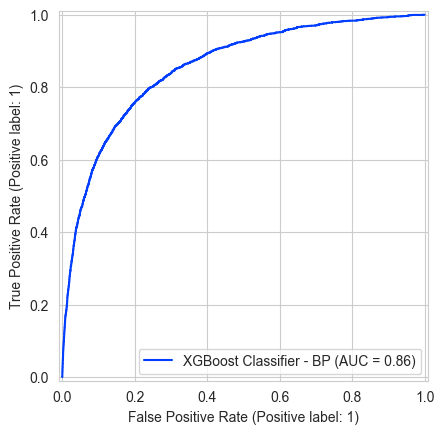

In [504]:
plot_roc_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=xgboost_classifier, estimator_name='XGBoost Classifier - BP')

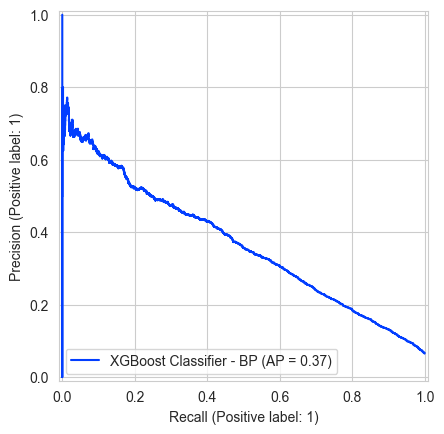

In [505]:
plot_precision_recall_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=xgboost_classifier, estimator_name='XGBoost Classifier - BP')

In [506]:
y_hat_zip_proba = xgboost_classifier.predict_proba(X=X_test_zip_tf)[:, 1]

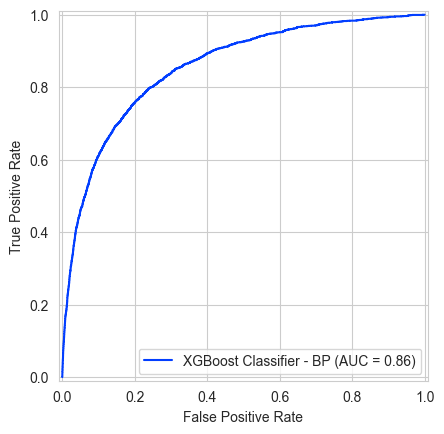

In [507]:
plot_roc_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='XGBoost Classifier - BP')

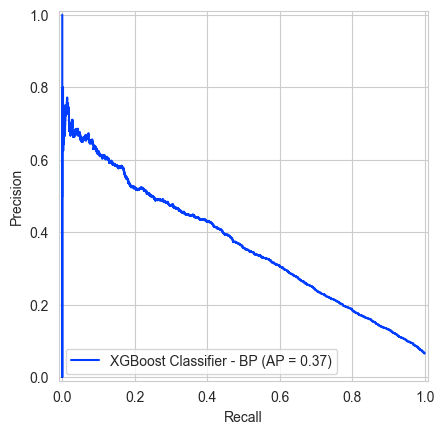

In [508]:
plot_precision_recall_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='XGBoost Classifier - BP')

In [509]:
y_hat_zip = xgboost_classifier.predict(X=X_test_zip_tf)

In [510]:
print_classification_report(model_name='XGBoost Classifier',
                            y_true=y_test_zip,
                            y_pred=y_hat_zip,
                            modifiers='Baseline Performance')

XGBoost Classifier - Baseline Performance - Accuracy Score: 0.9359
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.52      0.20      0.29      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.60      0.63     30000
weighted avg       0.92      0.94      0.92     30000



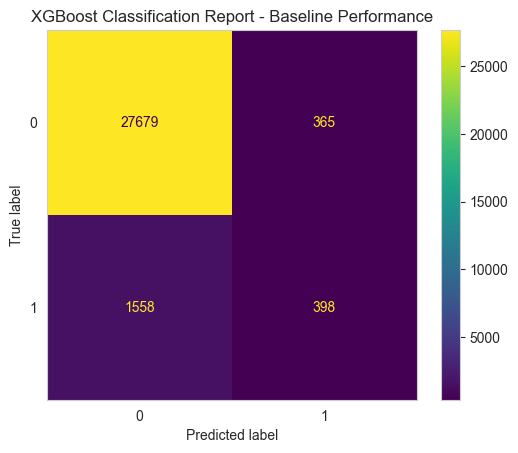

In [511]:
plot_confusion_matrix(model_name='XGBoost',
                      y_true=y_test_zip,
                      y_pred=y_hat_zip,
                      modifiers='Baseline Performance')

As it may be seen, due to the fact that this dataset is highly imbalanced, accuracy is high, since model tends to predict only negative values, therefore precision, recall and F1 Score are very important, since they offer information about minority class separately.

In [512]:
model_info_metrics: dict[str, dict | str] = compute_model_info_metrics(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba, estimator_name='XGBoost Classifier (BP)')

In [513]:
model_performance_df = add_to_df(metrics_dict=model_info_metrics['Model_Metrics'], estimator_name=model_info_metrics['Model_Name'], old_df=model_performance_df)

In [514]:
model_performance_df.xs('XGBoost Classifier (BP)')

Score
Metric                 
Accuracy       0.935900
Precision (0)  0.946711
Recall (0)     0.986985
F1 Score (0)   0.966429
Precision (1)  0.521625
Recall (1)     0.203476
F1 Score (1)   0.292755
ROC AUC Score  0.855677
PR AUC Score   0.367250

In [515]:
comparison_df = create_comparison_df(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba)

In [516]:
comparison_df[comparison_df['y_true'] == 1]

y_true  y_pred  y_pred_proba
41980        1       0      0.229491
7487         1       0      0.114438
25705        1       0      0.013458
49306        1       0      0.061088
95328        1       1      0.509816
...        ...     ...           ...
77138        1       0      0.010034
11762        1       0      0.009528
140370       1       0      0.140249
115214       1       0      0.043330
146029       1       0      0.027807

[1956 rows x 3 columns]

In [517]:
comparison_df[comparison_df['y_true'] == 0]

y_true  y_pred  y_pred_proba
59770        0       0      0.009630
21362        0       0      0.007173
127324       0       0      0.007154
140509       0       0      0.071582
144297       0       0      0.065894
...        ...     ...           ...
30430        0       0      0.046871
63244        0       0      0.012941
104970       0       0      0.068121
53960        0       0      0.006558
49315        0       0      0.008041

[28044 rows x 3 columns]

#### Kaggle Submission Training

In [518]:
xgboost_classifier = XGBClassifier(n_jobs=-1, 
                                   random_state=42, 
                                   device='gpu', 
                                   verbosity=2)

In [519]:
xgboost_classifier.fit(X=X_train_sub_tf, y=y_train_sub)

[01:49:15] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (150000, 10, 1500000).
[01:49:15] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\ellpack_page.cu:167: Ellpack is dense.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [520]:
y_hat_sub_proba = xgboost_classifier.predict_proba(X=X_test_sub_tf)[:, 1]

In [521]:
save_predictions_to_sub_file(filepath_to_sample='dataset/sampleEntry.csv',
                             filepath_to_save='dataset/submissions',
                             y_pred=y_hat_sub_proba,
                             model_name='xgboost',
                             modifiers='default_bp')

Kaggle Score: `0.85911 | 0.85248`

### Logistic Regression

In [522]:
logistic_regressor = LogisticRegression(n_jobs=-1, 
                                        verbose=2)

#### Local Scoring Training

In [523]:
logistic_regressor.fit(X=X_train_zip_tf, y=y_train_zip)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


LogisticRegression(n_jobs=-1, verbose=2)

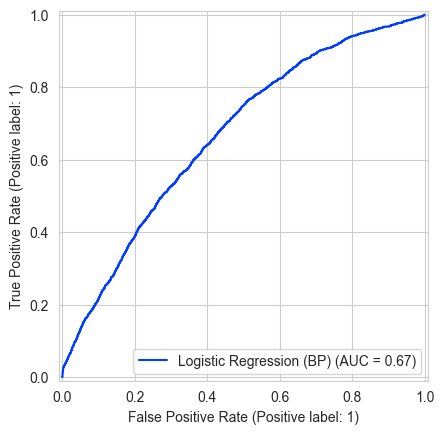

In [524]:
plot_roc_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=logistic_regressor, estimator_name='Logistic Regression (BP)')

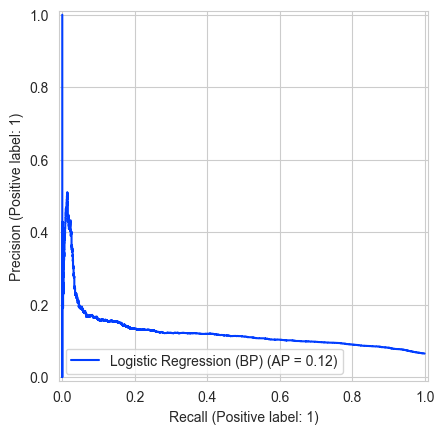

In [525]:
plot_precision_recall_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=logistic_regressor, estimator_name='Logistic Regression (BP)')

In [526]:
y_hat_zip_proba = logistic_regressor.predict_proba(X=X_test_zip_tf)[:, 1]

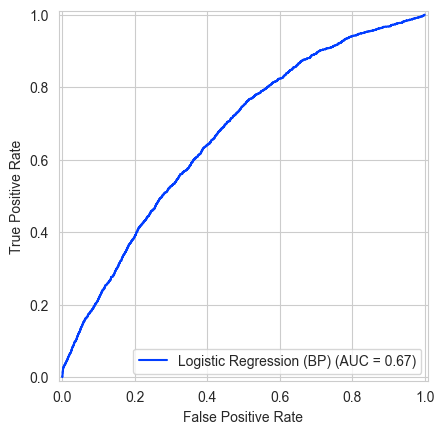

In [527]:
plot_roc_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='Logistic Regression (BP)')

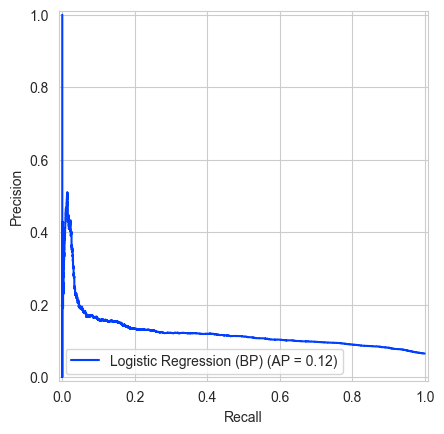

In [528]:
plot_precision_recall_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='Logistic Regression (BP)')

In [529]:
y_hat_zip = logistic_regressor.predict(X=X_test_zip_tf)

In [530]:
print_classification_report(model_name='Logistic Regressor',
                            y_true=y_test_zip,
                            y_pred=y_hat_zip,
                            modifiers='Baseline Performance')

Logistic Regressor - Baseline Performance - Accuracy Score: 0.9346333333333333
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.44      0.01      0.02      1956

    accuracy                           0.93     30000
   macro avg       0.69      0.50      0.49     30000
weighted avg       0.90      0.93      0.90     30000



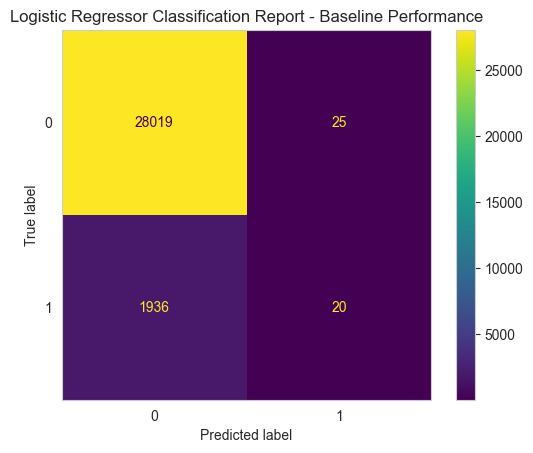

In [531]:
plot_confusion_matrix(model_name='Logistic Regressor',
                      y_true=y_test_zip,
                      y_pred=y_hat_zip,
                      modifiers='Baseline Performance')

As it may be seen, due to the fact that this dataset is highly imbalanced, accuracy is high, since model tends to predict only negative values, therefore precision, recall and F1 Score are very important, since they offer information about minority class separately.

In [532]:
model_info_metrics: dict[str, dict | str] = compute_model_info_metrics(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba, estimator_name='Logistic Regression (BP)')

In [533]:
model_performance_df = add_to_df(metrics_dict=model_info_metrics['Model_Metrics'], estimator_name=model_info_metrics['Model_Name'], old_df=model_performance_df)

In [534]:
model_performance_df.xs('Logistic Regression (BP)')

Score
Metric                 
Accuracy       0.934633
Precision (0)  0.935370
Recall (0)     0.999109
F1 Score (0)   0.966189
Precision (1)  0.444444
Recall (1)     0.010225
F1 Score (1)   0.019990
ROC AUC Score  0.667129
PR AUC Score   0.122435

In [535]:
comparison_df = create_comparison_df(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba)

In [536]:
comparison_df[comparison_df['y_true'] == 1]

y_true  y_pred  y_pred_proba
41980        1       0      0.041810
7487         1       0      0.033668
25705        1       0      0.058366
49306        1       0      0.140177
95328        1       0      0.115558
...        ...     ...           ...
77138        1       0      0.096137
11762        1       0      0.023780
140370       1       0      0.019116
115214       1       0      0.044863
146029       1       0      0.104786

[1956 rows x 3 columns]

In [537]:
comparison_df[comparison_df['y_true'] == 0]

y_true  y_pred  y_pred_proba
59770        0       0      0.031118
21362        0       0      0.038463
127324       0       0      0.078890
140509       0       0      0.084121
144297       0       0      0.037280
...        ...     ...           ...
30430        0       0      0.027454
63244        0       0      0.015971
104970       0       0      0.124131
53960        0       0      0.028963
49315        0       0      0.079198

[28044 rows x 3 columns]

#### Kaggle Submission Training

In [538]:
logistic_regressor = LogisticRegression(n_jobs=-1, 
                                        verbose=2)

In [539]:
logistic_regressor.fit(X=X_train_sub_tf, y=y_train_sub)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


LogisticRegression(n_jobs=-1, verbose=2)

In [540]:
y_hat_sub = logistic_regressor.predict_proba(X=X_test_sub_tf)[:, 1]

In [541]:
save_predictions_to_sub_file(filepath_to_sample='dataset/sampleEntry.csv',
                             filepath_to_save='dataset/submissions',
                             y_pred=y_hat_sub,
                             model_name='logistic',
                             modifiers='default_bp')

Kaggle Score: `0.67613 | 0.67787`

### Random Forest Classifier

In [542]:
random_forest_classifier = RandomForestClassifier(n_jobs=-1, 
                                                  random_state=42, 
                                                  verbose=2)

#### Local Scoring Training

In [543]:
random_forest_classifier.fit(X=X_train_zip_tf, y=y_train_zip)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 4 of 100
building tree 6 of 100
building tree 8 of 100
building tree 5 of 100
building tree 7 of 100
building tree 11 of 100
building tree 9 of 100
building tree 12 of 100
building tree 14 of 100
building tree 13 of 100
building tree 16 of 100
building tree 10 of 100
building tree 15 of 100
building tree 3 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=2)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


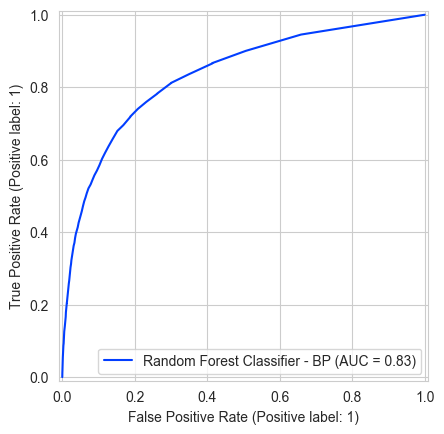

In [544]:
plot_roc_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=random_forest_classifier, estimator_name='Random Forest Classifier - BP')

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


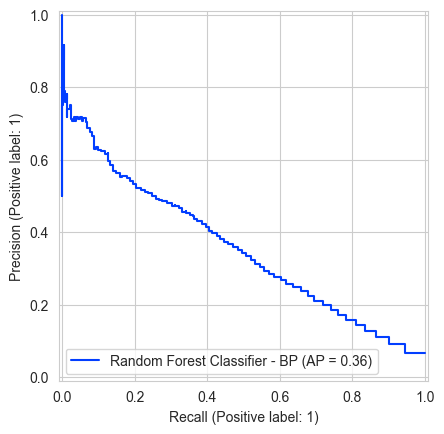

In [545]:
plot_precision_recall_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=random_forest_classifier, estimator_name='Random Forest Classifier - BP')

In [546]:
y_hat_zip_proba = random_forest_classifier.predict_proba(X=X_test_zip_tf)[:, 1]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


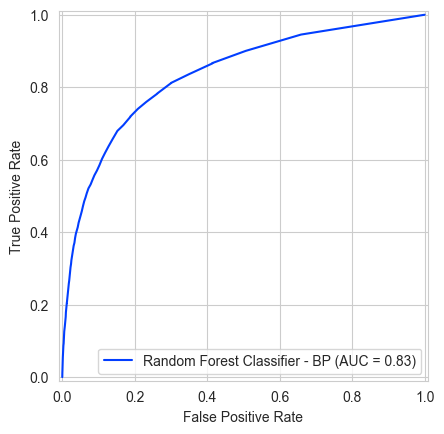

In [547]:
plot_roc_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='Random Forest Classifier - BP')

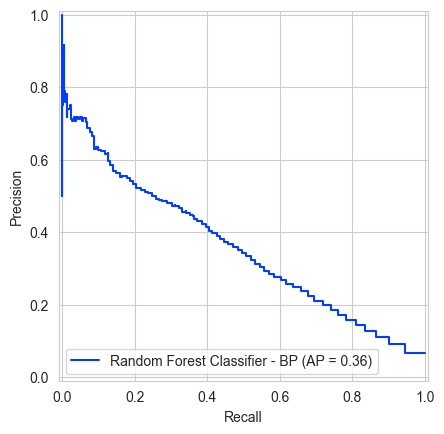

In [548]:
plot_precision_recall_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='Random Forest Classifier - BP')

In [549]:
y_hat_zip = random_forest_classifier.predict(X=X_test_zip_tf)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [550]:
print_classification_report(model_name='Random Forest Classifier',
                            y_true=y_test_zip,
                            y_pred=y_hat_zip,
                            modifiers='Baseline Performance')

Random Forest Classifier - Baseline Performance - Accuracy Score: 0.9367
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.54      0.20      0.29      1956

    accuracy                           0.94     30000
   macro avg       0.74      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



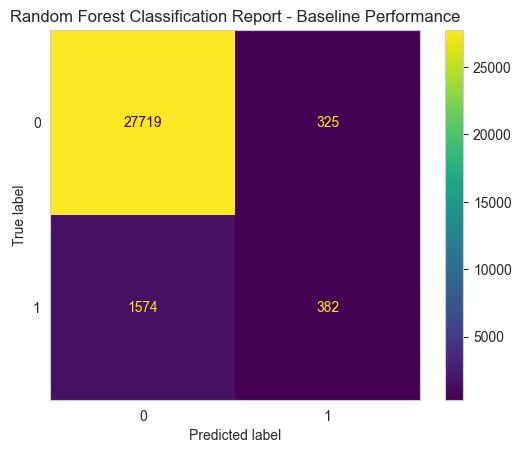

In [551]:
plot_confusion_matrix(model_name='Random Forest',
                      y_true=y_test_zip,
                      y_pred=y_hat_zip,
                      modifiers='Baseline Performance')

In [552]:
model_info_metrics: dict[str, dict | str] = compute_model_info_metrics(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba, estimator_name='Random Forest Classifier (BP)')

In [553]:
model_performance_df = add_to_df(metrics_dict=model_info_metrics['Model_Metrics'], estimator_name=model_info_metrics['Model_Name'], old_df=model_performance_df)

In [554]:
model_performance_df.xs('Random Forest Classifier (BP)')

Score
Metric                 
Accuracy       0.936700
Precision (0)  0.946267
Recall (0)     0.988411
F1 Score (0)   0.966880
Precision (1)  0.540311
Recall (1)     0.195297
F1 Score (1)   0.286894
ROC AUC Score  0.834433
PR AUC Score   0.355900

In [555]:
comparison_df = create_comparison_df(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba)

In [556]:
comparison_df[comparison_df['y_true'] == 1]

y_true  y_pred  y_pred_proba
41980        1       0          0.12
7487         1       0          0.17
25705        1       0          0.00
49306        1       0          0.16
95328        1       0          0.44
...        ...     ...           ...
77138        1       0          0.02
11762        1       0          0.00
140370       1       0          0.42
115214       1       0          0.01
146029       1       0          0.11

[1956 rows x 3 columns]

In [557]:
comparison_df[comparison_df['y_true'] == 0]

y_true  y_pred  y_pred_proba
59770        0       0          0.00
21362        0       0          0.00
127324       0       0          0.00
140509       0       0          0.12
144297       0       0          0.03
...        ...     ...           ...
30430        0       0          0.01
63244        0       0          0.03
104970       0       0          0.03
53960        0       0          0.00
49315        0       0          0.00

[28044 rows x 3 columns]

#### Kaggle Submission Training

In [558]:
random_forest_classifier = RandomForestClassifier(n_jobs=-1, 
                                                  random_state=42, 
                                                  verbose=2)

In [559]:
random_forest_classifier.fit(X=X_train_sub_tf, y=y_train_sub)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 2 of 100building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 7 of 100
building tree 9 of 100
building tree 1 of 100
building tree 8 of 100
building tree 10 of 100
building tree 13 of 100
building tree 11 of 100
building tree 12 of 100
building tree 6 of 100
building tree 14 of 100

building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=2)

In [560]:
y_hat_sub = random_forest_classifier.predict_proba(X=X_test_sub_tf)[:, 1]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


In [561]:
save_predictions_to_sub_file(filepath_to_sample='dataset/sampleEntry.csv',
                             filepath_to_save='dataset/submissions',
                             y_pred=y_hat_sub,
                             model_name='randomForest',
                             modifiers='default_bp')

Kaggle Score: `0.84239 | 0.83706`

### K-Nearest Neighbors Classifier

In [562]:
k_nearest_neighbors_classifier = KNeighborsClassifier(n_jobs=-1)

#### Local Scoring Training

In [563]:
k_nearest_neighbors_classifier.fit(X=X_train_zip_tf, y=y_train_zip)

KNeighborsClassifier(n_jobs=-1)

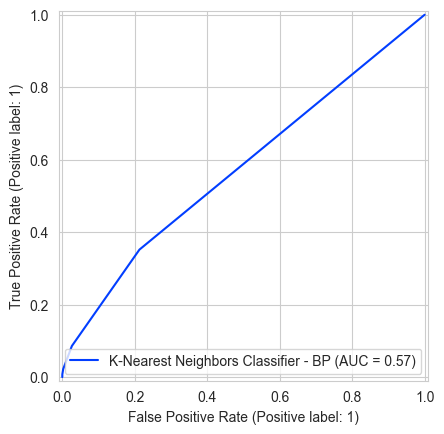

In [564]:
plot_roc_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=k_nearest_neighbors_classifier, estimator_name='K-Nearest Neighbors Classifier - BP')

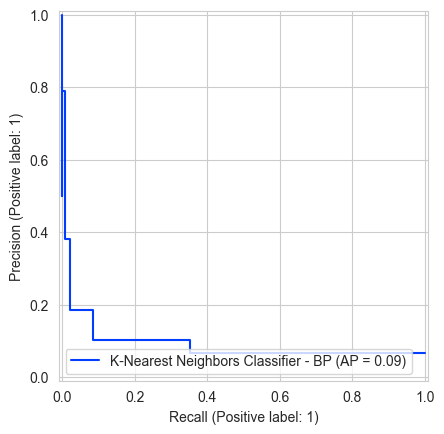

In [565]:
plot_precision_recall_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=k_nearest_neighbors_classifier, estimator_name='K-Nearest Neighbors Classifier - BP')

In [566]:
y_hat_zip_proba = k_nearest_neighbors_classifier.predict_proba(X=X_test_zip_tf)[:, 1]

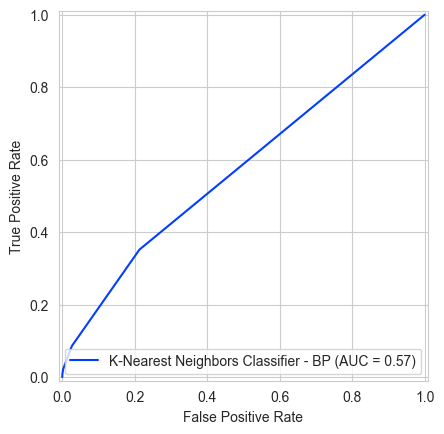

In [567]:
plot_roc_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='K-Nearest Neighbors Classifier - BP')

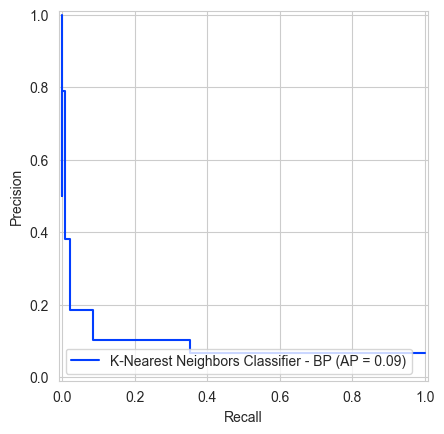

In [568]:
plot_precision_recall_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='K-Nearest Neighbors Classifier - BP')

In [569]:
y_hat_zip = k_nearest_neighbors_classifier.predict(X=X_test_zip_tf)

In [570]:
print_classification_report(model_name='K-Nearest Neighbors Classifier',
                            y_true=y_test_zip,
                            y_pred=y_hat_zip,
                            modifiers='Baseline Performance')

K-Nearest Neighbors Classifier - Baseline Performance - Accuracy Score: 0.9339
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.38      0.02      0.04      1956

    accuracy                           0.93     30000
   macro avg       0.66      0.51      0.50     30000
weighted avg       0.90      0.93      0.91     30000



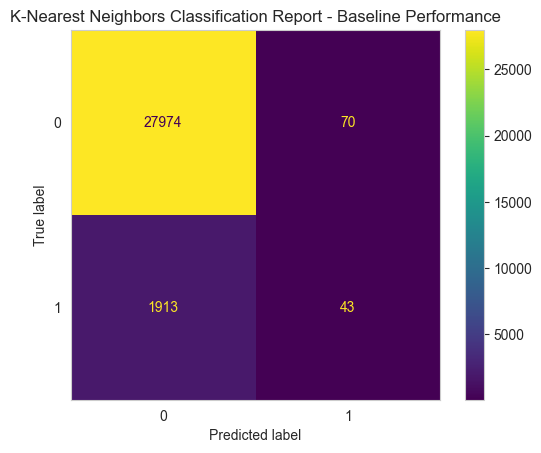

In [571]:
plot_confusion_matrix(model_name='K-Nearest Neighbors',
                      y_true=y_test_zip,
                      y_pred=y_hat_zip,
                      modifiers='Baseline Performance')

In [572]:
model_info_metrics: dict[str, dict | str] = compute_model_info_metrics(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba, estimator_name='K-Nearest Neighbors Classifier (BP)')

In [573]:
model_performance_df = add_to_df(metrics_dict=model_info_metrics['Model_Metrics'], estimator_name=model_info_metrics['Model_Name'], old_df=model_performance_df)

In [574]:
model_performance_df.xs('K-Nearest Neighbors Classifier (BP)')

Score
Metric                 
Accuracy       0.933900
Precision (0)  0.935992
Recall (0)     0.997504
F1 Score (0)   0.965770
Precision (1)  0.380531
Recall (1)     0.021984
F1 Score (1)   0.041566
ROC AUC Score  0.574104
PR AUC Score   0.092877

In [575]:
comparison_df = create_comparison_df(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba)

In [576]:
comparison_df[comparison_df['y_true'] == 1]

y_true  y_pred  y_pred_proba
41980        1       0           0.2
7487         1       0           0.0
25705        1       0           0.0
49306        1       0           0.0
95328        1       0           0.2
...        ...     ...           ...
77138        1       0           0.0
11762        1       0           0.0
140370       1       0           0.0
115214       1       0           0.0
146029       1       0           0.0

[1956 rows x 3 columns]

In [577]:
comparison_df[comparison_df['y_true'] == 0]

y_true  y_pred  y_pred_proba
59770        0       0           0.0
21362        0       0           0.0
127324       0       0           0.0
140509       0       0           0.4
144297       0       0           0.2
...        ...     ...           ...
30430        0       0           0.0
63244        0       0           0.0
104970       0       0           0.2
53960        0       0           0.0
49315        0       0           0.0

[28044 rows x 3 columns]

#### Kaggle Submission Training

In [578]:
k_nearest_neighbors_classifier = KNeighborsClassifier(n_jobs=-1)

In [579]:
k_nearest_neighbors_classifier.fit(X=X_train_sub_tf, y=y_train_sub)

KNeighborsClassifier(n_jobs=-1)

In [580]:
y_hat_sub = k_nearest_neighbors_classifier.predict_proba(X=X_test_sub_tf)[:, 1]

In [581]:
save_predictions_to_sub_file(filepath_to_sample='dataset/sampleEntry.csv',
                             filepath_to_save='dataset/submissions',
                             y_pred=y_hat_sub,
                             model_name='knn',
                             modifiers='default_bp')

Kaggle Score: `0.58020 | 0.58332`

### Baseline Performance Summary
Since dataset is highly imbalanced, all models tend to predict probability values close to `0` for a vast majority of test rows, that are also mostly close to `0`, therefore their accuracy on Kaggle website is pretty similar, fluctuating around values of $\approx 0.58$ achieved by K-Nearest Neighbors Classifier to $\approx 0.87$ achieved by LightGBM Classifier, thus an important step is class balancing, in order to provide better scores of Precision, Recall and ROC-AUC, that are very useful in determination of real behavior of the model and its predictions.

#### Kaggle Results Table:
| **Classifier Name**   | **Modifiers** | **Private Score** | **Public Score** |
|-----------------------|---------------|-------------------|------------------|
| _LightGBM_            |       BP      |      0.86674      |      0.86043     |
| _XGBoost_             |       BP      |      0.85911      |      0.85248     |
| _Logistic Regression_ |       BP      |      0.67613      |      0.67787     |
| _Random Forest_       |       BP      |      0.84239      |      0.83706     |
| _K-Nearest Neighbors_ |       BP      |      0.58020      |      0.58332     |

#### Local Perfomance Metrics

In [582]:
model_performance_df.loc[model_names]

Score
Model                               Metric                 
K-Nearest Neighbors Classifier (BP) Accuracy       0.933900
                                    Precision (0)  0.935992
                                    Recall (0)     0.997504
                                    F1 Score (0)   0.965770
                                    Precision (1)  0.380531
                                    Recall (1)     0.021984
                                    F1 Score (1)   0.041566
                                    ROC AUC Score  0.574104
                                    PR AUC Score   0.092877
LightGBM Classifier (BP)            Accuracy       0.938267
                                    Precision (0)  0.946414
                                    Recall (0)     0.990016
                                    F1 Score (0)   0.967724
                                    Precision (1)  0.578313
                                    Recall (1)     0.196319
                                    F1 Score (1)   0.293130
                                    ROC AUC Score  0.862365
                                    PR AUC Score   0.393746
Logistic Regression (BP)            Accuracy       0.934633
                                    Precision (0)  0.935370
                                    Recall (0)     0.999109
                                    F1 Score (0)   0.966189
                                    Precision (1)  0.444444
                                    Recall (1)     0.010225
                                    F1 Score (1)   0.019990
                                    ROC AUC Score  0.667129
                                    PR AUC Score   0.122435
Random Forest Classifier (BP)       Accuracy       0.936700
                                    Precision (0)  0.946267
                                    Recall (0)     0.988411
                                    F1 Score (0)   0.966880
                                    Precision (1)  0.540311
                                    Recall (1)     0.195297
                                    F1 Score (1)   0.286894
                                    ROC AUC Score  0.834433
                                    PR AUC Score   0.355900
XGBoost Classifier (BP)             Accuracy       0.935900
                                    Precision (0)  0.946711
                                    Recall (0)     0.986985
                                    F1 Score (0)   0.966429
                                    Precision (1)  0.521625
                                    Recall (1)     0.203476
                                    F1 Score (1)   0.292755
                                    ROC AUC Score  0.855677
                                    PR AUC Score   0.367250

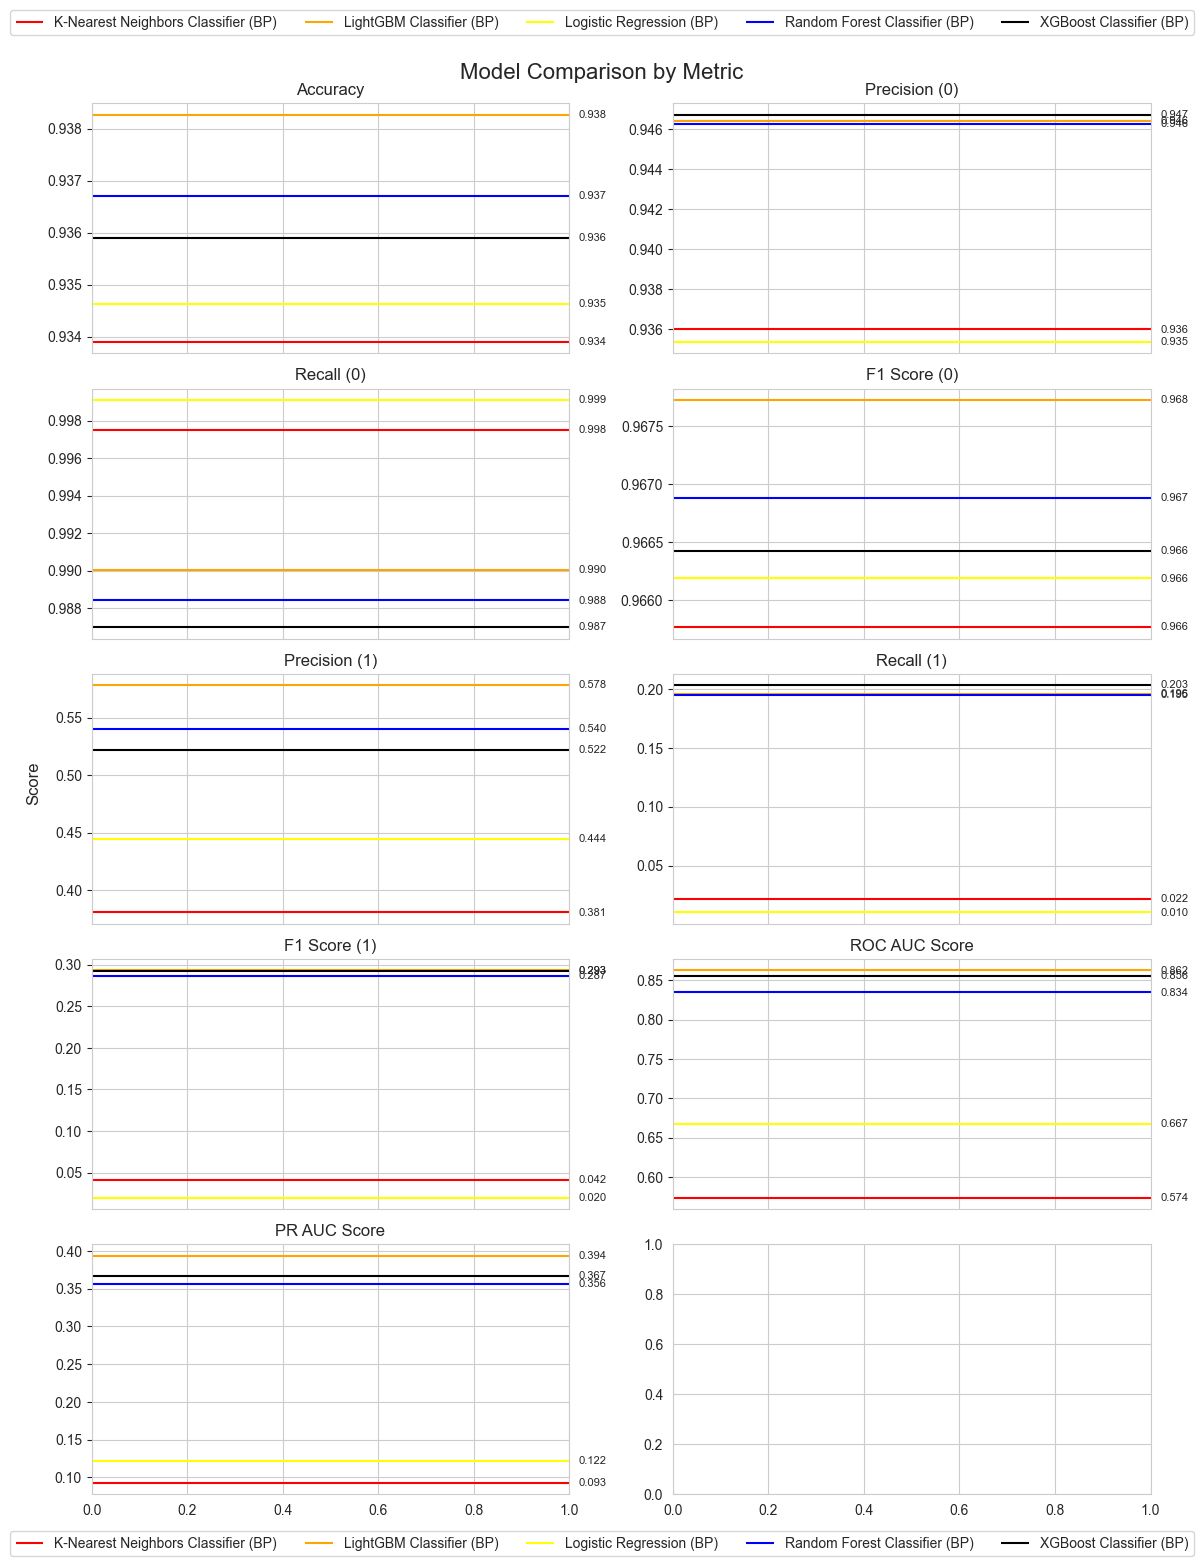

In [583]:
plot_metrics(metrics_df=model_performance_df.loc[model_names])

Was observed that all models suffer from misclassification of test samples with positive label, as a result of highly imbalanced dataset ($\approx 93\%$ negative labels against $\approx 7\%$ positive labels). As a mitigation strategy for this is to implement Class Balancing methods, either Undersampling, which will reduce the majority class to match closely the minority class, or Oversampling, that will create new samples of minority class to reduce the proportion of majority class, use `scale_pos_weight` or `class_weight` hyperparameters for trained models, which will associate weights to classes based on their class frequencies in the dataset. Since ROC-AUC Score is high for boosted trees algorithms, the main metrics that should be improved are Precision and Recall for samples that are labelled as positive. For this was introduced a new plot - Precision Recall Curve and its Area Under the Curve, which is lower than in case of Chance Level prediction, which serves as a baseline performance expected from a random approach - assigning random labels to test samples, which means that the models that were trained performs worse at correctly predicting minority class samples than if they randomly assigned labels.

In [584]:
# TODO: scale pos weight xgboost lightgbm ratio negative/positive classes, trees handle automatic Null values, FE + FSc + OUTLIERS + CLASS BALANCING + FSel + etc.

## Models Training - Advanced Missing Values Imputation

Since for Baseline Performance was used Simple Imputer with median for column `NumberOfDependents` and mean - for `MonthlyIncome`, and `MonthlyIncome` has a considerable amount of missing information, advanced methods of Imputation may help increase the accuracy of the model.

### Utils - Advanced Missing Values Imputation

In [585]:
model_names: list[str] = ['K-Nearest Neighbors Classifier (MVImp - MICE)', 
                          'LightGBM Classifier (MVImp - MICE)', 
                          'Logistic Regression (MVImp - MICE)', 
                          'Random Forest Classifier (MVImp - MICE)', 
                          'XGBoost Classifier (MVImp - MICE)']

#### MICE

In [586]:
mice_imputer: IterativeImputer = IterativeImputer()
simple_imputer_median: SimpleImputer = SimpleImputer(strategy='median').set_output(transform='pandas')

In [587]:
null_transformer = ColumnTransformer(
    transformers=[
        ('impute_num_dependents', simple_imputer_median, ['NumberOfDependents']),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [588]:
pipeline_steps: list[tuple[str, TransformerMixin]] = [
    ('drop_id', transformer_dropper_id),
    ('impute_null_1', null_transformer),
    ('impute_null_2', mice_imputer)
]

In [589]:
fit_transform_pipeline: Pipeline = create_pipeline(
    steps=pipeline_steps
)

In [590]:
X_train_zip_tf = fit_transform_pipeline.fit_transform(
    X=X_train_zip,
    y=y_train_zip
)

In [591]:
X_test_zip_tf = fit_transform_pipeline.transform(
    X=X_test_zip
)

In [592]:
fit_transform_pipeline: Pipeline = create_pipeline(
    steps=pipeline_steps
)

In [593]:
X_train_sub_tf = fit_transform_pipeline.fit_transform(
    X=X_train_sub,
    y=y_train_sub
)

In [594]:
X_test_sub_tf = fit_transform_pipeline.transform(
    X=X_test_sub
)

### Light Gradient Boost Model (LightGBM)

In [595]:
lightgbm_classifier = LGBMClassifier(n_jobs=-1, 
                                   random_state=42, 
                                   device='gpu', 
                                   verbose=2)

#### Local Scoring Training

In [596]:
lightgbm_classifier.fit(X=X_train_zip_tf, y=y_train_zip)

[LightGBM] [Info] Number of positive: 8070, number of negative: 111930
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.834823
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 10
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 Ti Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.92 MB) transferred to GPU in 0.001831 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067250 -> initscore=-2.629720
[LightGBM] [Info] Start training from score -2.629720
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves

LGBMClassifier(device='gpu', n_jobs=-1, random_state=42, verbose=2)

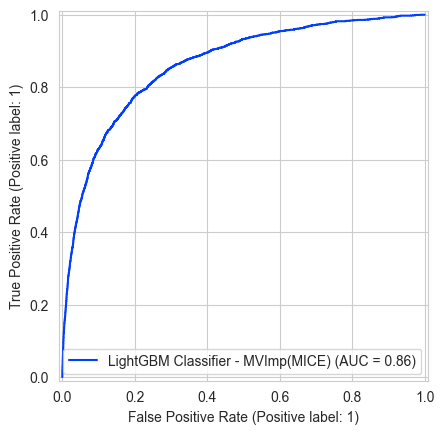

In [597]:
plot_roc_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=lightgbm_classifier, estimator_name='LightGBM Classifier - MVImp(MICE)')

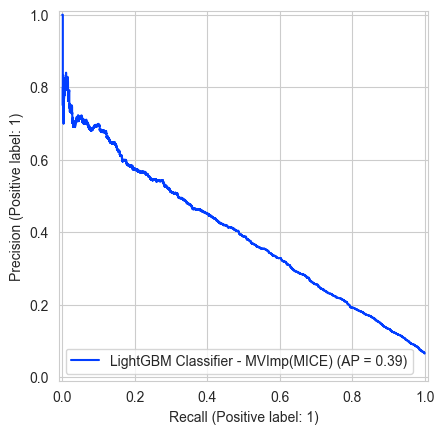

In [598]:
plot_precision_recall_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=lightgbm_classifier, estimator_name='LightGBM Classifier - MVImp(MICE)')

In [599]:
y_hat_zip_proba = lightgbm_classifier.predict_proba(X=X_test_zip_tf)[:, 1]

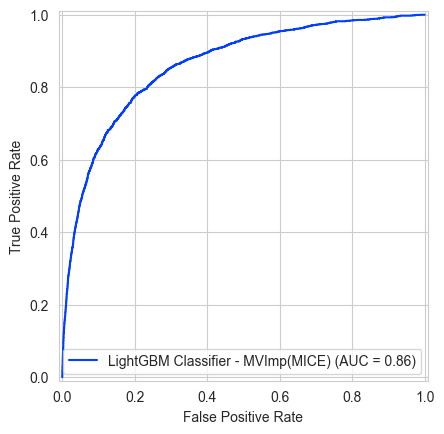

In [600]:
plot_roc_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='LightGBM Classifier - MVImp(MICE)')

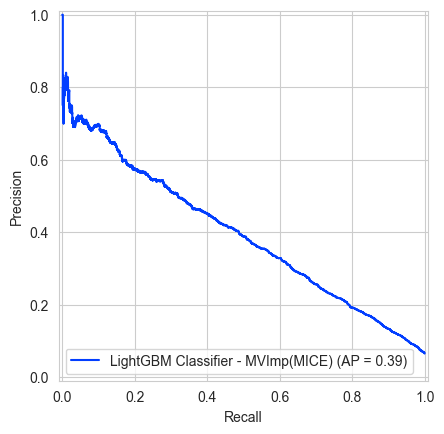

In [601]:
plot_precision_recall_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='LightGBM Classifier - MVImp(MICE)')

In [602]:
y_hat_zip = lightgbm_classifier.predict(X=X_test_zip_tf)

In [603]:
print_classification_report(model_name='LightGBM Classifier',
                            y_true=y_test_zip,
                            y_pred=y_hat_zip,
                            modifiers='MVImp MICE')

LightGBM Classifier - MVImp MICE - Accuracy Score: 0.9382
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.57      0.20      0.30      1956

    accuracy                           0.94     30000
   macro avg       0.76      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



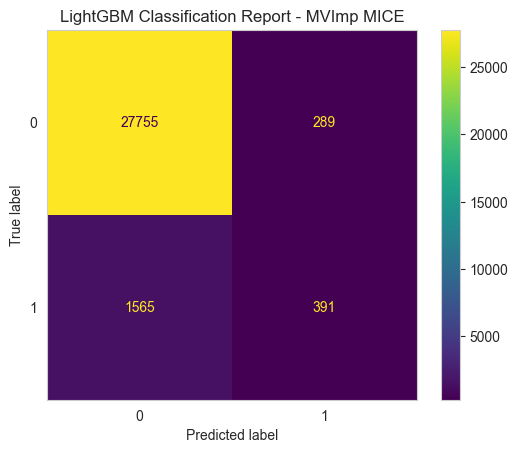

In [604]:
plot_confusion_matrix(model_name='LightGBM',
                      y_true=y_test_zip,
                      y_pred=y_hat_zip,
                      modifiers='MVImp MICE')

As it may be seen, due to the fact that this dataset is highly imbalanced, accuracy is high, since model tends to predict only negative values, therefore precision, recall and F1 Score are very important, since they offer information about minority class separately.

In [605]:
model_info_metrics: dict[str, dict | str] = compute_model_info_metrics(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba, estimator_name='LightGBM Classifier (MVImp - MICE)')

In [606]:
model_performance_df = add_to_df(metrics_dict=model_info_metrics['Model_Metrics'], estimator_name=model_info_metrics['Model_Name'], old_df=model_performance_df)

In [607]:
model_performance_df.xs('LightGBM Classifier (MVImp - MICE)')

Score
Metric                 
Accuracy       0.938200
Precision (0)  0.946623
Recall (0)     0.989695
F1 Score (0)   0.967680
Precision (1)  0.575000
Recall (1)     0.199898
F1 Score (1)   0.296662
ROC AUC Score  0.862300
PR AUC Score   0.394484

In [608]:
comparison_df = create_comparison_df(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba)

In [609]:
comparison_df[comparison_df['y_true'] == 1]

y_true  y_pred  y_pred_proba
41980        1       0      0.274521
7487         1       0      0.196039
25705        1       0      0.014891
49306        1       0      0.081229
95328        1       1      0.524331
...        ...     ...           ...
77138        1       0      0.010007
11762        1       0      0.010739
140370       1       1      0.528424
115214       1       0      0.041951
146029       1       0      0.030341

[1956 rows x 3 columns]

In [610]:
comparison_df[comparison_df['y_true'] == 0]

y_true  y_pred  y_pred_proba
59770        0       0      0.005649
21362        0       0      0.009627
127324       0       0      0.008518
140509       0       0      0.079104
144297       0       0      0.077740
...        ...     ...           ...
30430        0       0      0.055560
63244        0       0      0.008567
104970       0       0      0.067946
53960        0       0      0.007714
49315        0       0      0.014524

[28044 rows x 3 columns]

#### Kaggle Submission Training

In [611]:
lightgbm_classifier = LGBMClassifier(n_jobs=-1, 
                                   random_state=42, 
                                   device='gpu', 
                                   verbose=2)

In [612]:
lightgbm_classifier.fit(X=X_train_sub_tf, y=y_train_sub)

[LightGBM] [Info] Number of positive: 10026, number of negative: 139974
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.834837
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 10
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 Ti Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (1.14 MB) transferred to GPU in 0.001993 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066840 -> initscore=-2.636275
[LightGBM] [Info] Start training from score -2.636275
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leav

LGBMClassifier(device='gpu', n_jobs=-1, random_state=42, verbose=2)

In [613]:
y_hat_sub_proba = lightgbm_classifier.predict_proba(X=X_test_sub_tf)[:, 1]

In [614]:
save_predictions_to_sub_file(filepath_to_sample='dataset/sampleEntry.csv',
                             filepath_to_save='dataset/submissions',
                             y_pred=y_hat_sub_proba,
                             model_name='lightgbm',
                             modifiers='MVImp(MICE)')

Kaggle Score: `0.86667 | 0.86110`

### eXtreme Gradient Boosting (XGBoost)

In [615]:
xgboost_classifier = XGBClassifier(n_jobs=-1, 
                                 random_state=42, 
                                 device='gpu', 
                                 verbosity=2)

#### Local Scoring Training

In [616]:
xgboost_classifier.fit(X=X_train_zip_tf, y=y_train_zip)

[01:49:41] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (120000, 10, 1200000).
[01:49:41] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\ellpack_page.cu:167: Ellpack is dense.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

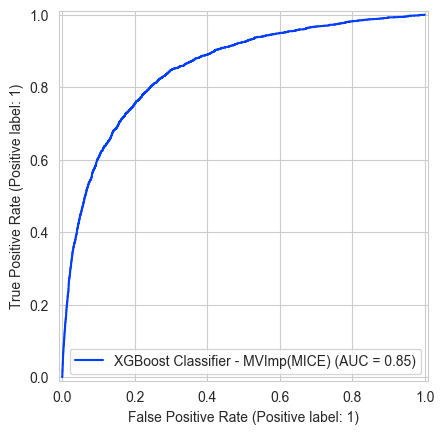

In [617]:
plot_roc_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=xgboost_classifier, estimator_name='XGBoost Classifier - MVImp(MICE)')

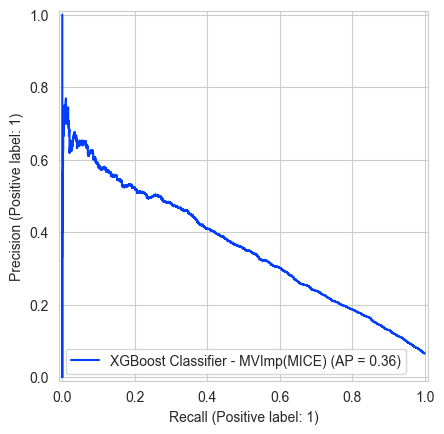

In [618]:
plot_precision_recall_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=xgboost_classifier, estimator_name='XGBoost Classifier - MVImp(MICE)')

In [619]:
y_hat_zip_proba = xgboost_classifier.predict_proba(X=X_test_zip_tf)[:, 1]

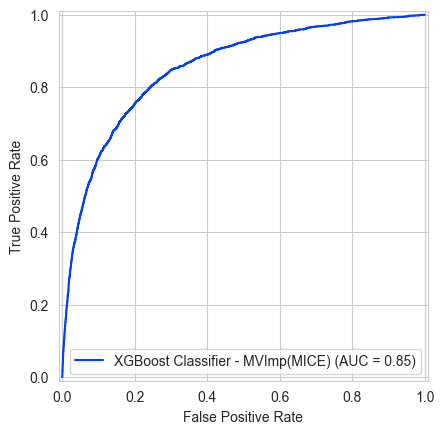

In [620]:
plot_roc_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='XGBoost Classifier - MVImp(MICE)')

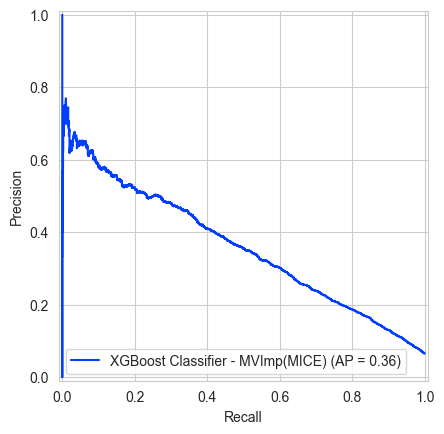

In [621]:
plot_precision_recall_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='XGBoost Classifier - MVImp(MICE)')

In [622]:
y_hat_zip = xgboost_classifier.predict(X=X_test_zip_tf)

In [623]:
print_classification_report(model_name='XGBoost Classifier',
                            y_true=y_test_zip,
                            y_pred=y_hat_zip,
                            modifiers='MVImp MICE')

XGBoost Classifier - MVImp MICE - Accuracy Score: 0.9355666666666667
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.51      0.21      0.29      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.60      0.63     30000
weighted avg       0.92      0.94      0.92     30000



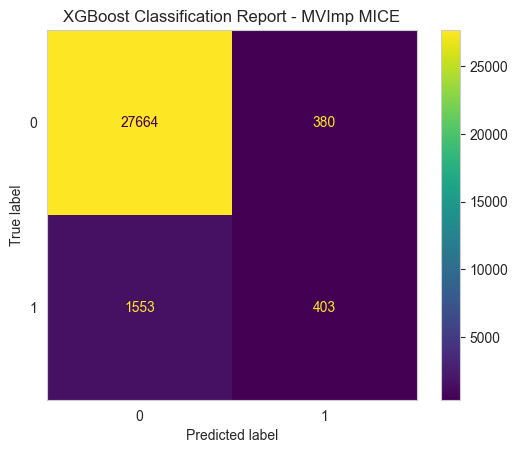

In [624]:
plot_confusion_matrix(model_name='XGBoost',
                      y_true=y_test_zip,
                      y_pred=y_hat_zip,
                      modifiers='MVImp MICE')

As it may be seen, due to the fact that this dataset is highly imbalanced, accuracy is high, since model tends to predict only negative values, therefore precision, recall and F1 Score are very important, since they offer information about minority class separately.

In [625]:
model_info_metrics: dict[str, dict | str] = compute_model_info_metrics(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba, estimator_name='XGBoost Classifier (MVImp - MICE)')

In [626]:
model_performance_df = add_to_df(metrics_dict=model_info_metrics['Model_Metrics'], estimator_name=model_info_metrics['Model_Name'], old_df=model_performance_df)

In [627]:
model_performance_df.xs('XGBoost Classifier (MVImp - MICE)')

Score
Metric                 
Accuracy       0.935567
Precision (0)  0.946846
Recall (0)     0.986450
F1 Score (0)   0.966242
Precision (1)  0.514687
Recall (1)     0.206033
F1 Score (1)   0.294268
ROC AUC Score  0.853304
PR AUC Score   0.358963

In [628]:
comparison_df = create_comparison_df(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba)

In [629]:
comparison_df[comparison_df['y_true'] == 1]

y_true  y_pred  y_pred_proba
41980        1       0      0.268794
7487         1       0      0.208378
25705        1       0      0.015677
49306        1       0      0.080130
95328        1       1      0.630874
...        ...     ...           ...
77138        1       0      0.007528
11762        1       0      0.014887
140370       1       0      0.101599
115214       1       0      0.041493
146029       1       0      0.033571

[1956 rows x 3 columns]

In [630]:
comparison_df[comparison_df['y_true'] == 0]

y_true  y_pred  y_pred_proba
59770        0       0      0.004856
21362        0       0      0.004424
127324       0       0      0.004584
140509       0       0      0.088301
144297       0       0      0.062991
...        ...     ...           ...
30430        0       0      0.032172
63244        0       0      0.007935
104970       0       0      0.033745
53960        0       0      0.007643
49315        0       0      0.015449

[28044 rows x 3 columns]

#### Kaggle Submission Training

In [631]:
xgboost_classifier = XGBClassifier(n_jobs=-1, 
                                   random_state=42, 
                                   device='gpu', 
                                   verbosity=2)

In [632]:
xgboost_classifier.fit(X=X_train_sub_tf, y=y_train_sub)

[01:49:43] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (150000, 10, 1500000).
[01:49:43] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\ellpack_page.cu:167: Ellpack is dense.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [633]:
y_hat_sub_proba = xgboost_classifier.predict_proba(X=X_test_sub_tf)[:, 1]

In [634]:
save_predictions_to_sub_file(filepath_to_sample='dataset/sampleEntry.csv',
                             filepath_to_save='dataset/submissions',
                             y_pred=y_hat_sub_proba,
                             model_name='xgboost',
                             modifiers='MVImp(MICE)')

Kaggle Score: `0.85941 | 0.85452`

### Logistic Regression

In [635]:
logistic_regressor = LogisticRegression(n_jobs=-1, 
                                        verbose=2)

#### Local Scoring Training

In [636]:
logistic_regressor.fit(X=X_train_zip_tf, y=y_train_zip)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


LogisticRegression(n_jobs=-1, verbose=2)

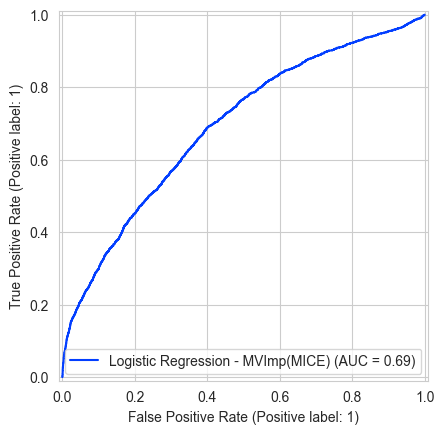

In [637]:
plot_roc_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=logistic_regressor, estimator_name='Logistic Regression - MVImp(MICE)')

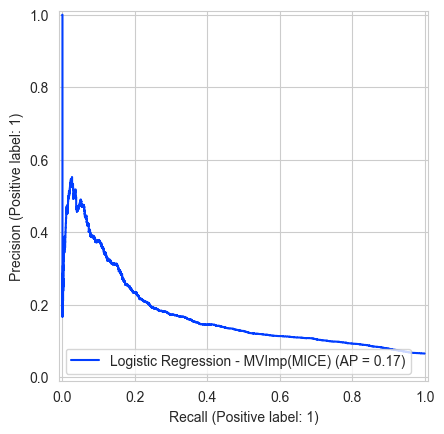

In [638]:
plot_precision_recall_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=logistic_regressor, estimator_name='Logistic Regression - MVImp(MICE)')

In [639]:
y_hat_zip_proba = logistic_regressor.predict_proba(X=X_test_zip_tf)[:, 1]

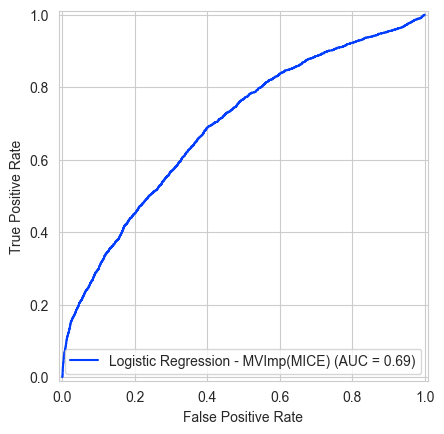

In [640]:
plot_roc_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='Logistic Regression - MVImp(MICE)')

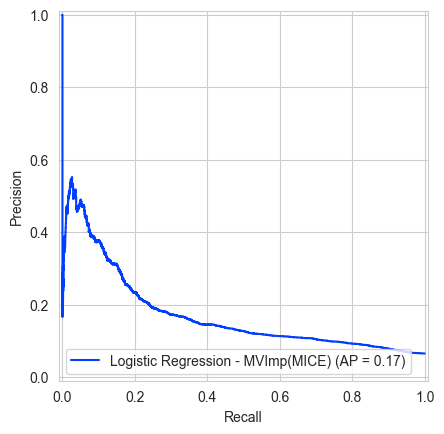

In [641]:
plot_precision_recall_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='Logistic Regression - MVImp(MICE)')

In [642]:
y_hat_zip = logistic_regressor.predict(X=X_test_zip_tf)

In [643]:
print_classification_report(model_name='Logistic Regressor',
                            y_true=y_test_zip,
                            y_pred=y_hat_zip,
                            modifiers='MVImp MICE')

Logistic Regressor - MVImp MICE - Accuracy Score: 0.935
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.53      0.03      0.05      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.51      0.51     30000
weighted avg       0.91      0.94      0.91     30000



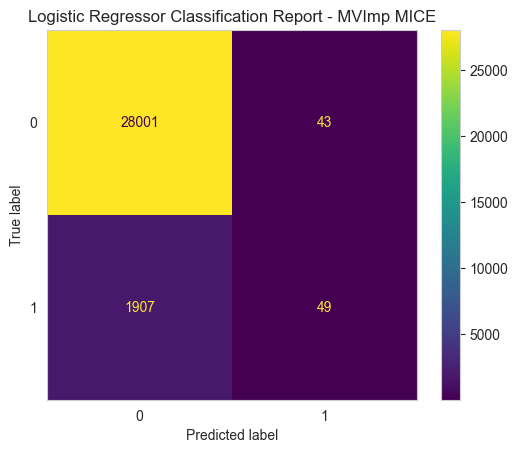

In [644]:
plot_confusion_matrix(model_name='Logistic Regressor',
                      y_true=y_test_zip,
                      y_pred=y_hat_zip,
                      modifiers='MVImp MICE')

As it may be seen, due to the fact that this dataset is highly imbalanced, accuracy is high, since model tends to predict only negative values, therefore precision, recall and F1 Score are very important, since they offer information about minority class separately.

In [645]:
model_info_metrics: dict[str, dict | str] = compute_model_info_metrics(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba, estimator_name='Logistic Regression (MVImp - MICE)')

In [646]:
model_performance_df = add_to_df(metrics_dict=model_info_metrics['Model_Metrics'], estimator_name=model_info_metrics['Model_Name'], old_df=model_performance_df)

In [647]:
model_performance_df.xs('Logistic Regression (MVImp - MICE)')

Score
Metric                 
Accuracy       0.935000
Precision (0)  0.936238
Recall (0)     0.998467
F1 Score (0)   0.966351
Precision (1)  0.532609
Recall (1)     0.025051
F1 Score (1)   0.047852
ROC AUC Score  0.691755
PR AUC Score   0.172087

In [648]:
comparison_df = create_comparison_df(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba)

In [649]:
comparison_df[comparison_df['y_true'] == 1]

y_true  y_pred  y_pred_proba
41980        1       0      0.045442
7487         1       0      0.031256
25705        1       0      0.045949
49306        1       0      0.183522
95328        1       0      0.205616
...        ...     ...           ...
77138        1       0      0.064333
11762        1       0      0.022565
140370       1       0      0.010734
115214       1       0      0.052429
146029       1       0      0.085690

[1956 rows x 3 columns]

In [650]:
comparison_df[comparison_df['y_true'] == 0]

y_true  y_pred  y_pred_proba
59770        0       0      0.023910
21362        0       0      0.026810
127324       0       0      0.118306
140509       0       0      0.066874
144297       0       0      0.034908
...        ...     ...           ...
30430        0       0      0.036556
63244        0       0      0.013221
104970       0       0      0.118245
53960        0       0      0.019206
49315        0       0      0.059484

[28044 rows x 3 columns]

#### Kaggle Submission Training

In [651]:
logistic_regressor = LogisticRegression(n_jobs=-1, 
                                        verbose=2)

In [652]:
logistic_regressor.fit(X=X_train_sub_tf, y=y_train_sub)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


LogisticRegression(n_jobs=-1, verbose=2)

In [653]:
y_hat_sub = logistic_regressor.predict_proba(X=X_test_sub_tf)[:, 1]

In [654]:
save_predictions_to_sub_file(filepath_to_sample='dataset/sampleEntry.csv',
                             filepath_to_save='dataset/submissions',
                             y_pred=y_hat_sub,
                             model_name='logistic',
                             modifiers='MVImp(MICE)')

Kaggle Score: `0.67267 | 0.67434`

### Random Forest Classifier

In [655]:
random_forest_classifier = RandomForestClassifier(n_jobs=-1, 
                                                  random_state=42, 
                                                  verbose=2)

#### Local Scoring Training

In [656]:
random_forest_classifier.fit(X=X_train_zip_tf, y=y_train_zip)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100

building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=2)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


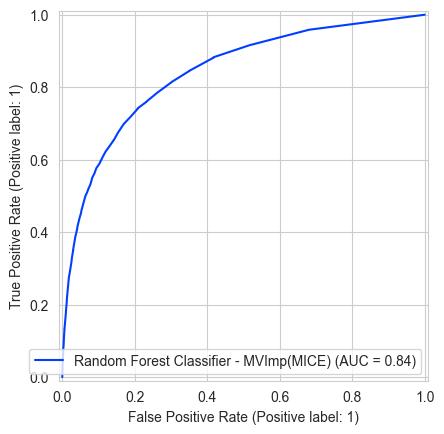

In [657]:
plot_roc_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=random_forest_classifier, estimator_name='Random Forest Classifier - MVImp(MICE)')

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


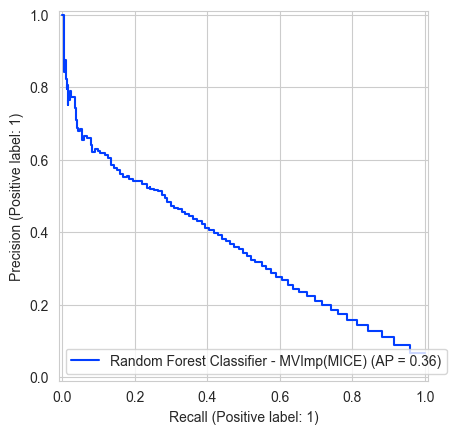

In [658]:
plot_precision_recall_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=random_forest_classifier, estimator_name='Random Forest Classifier - MVImp(MICE)')

In [659]:
y_hat_zip_proba = random_forest_classifier.predict_proba(X=X_test_zip_tf)[:, 1]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


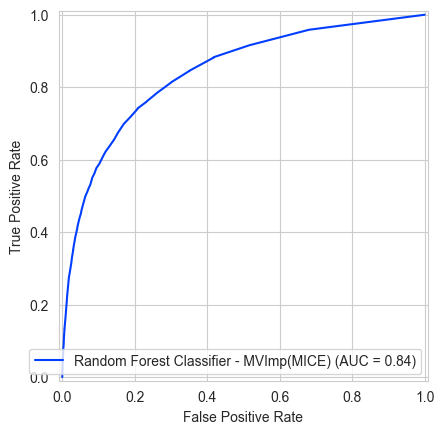

In [660]:
plot_roc_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='Random Forest Classifier - MVImp(MICE)')

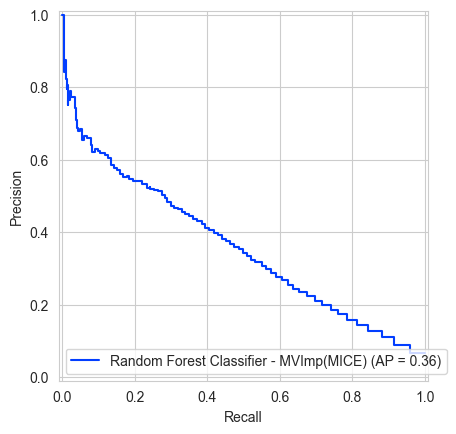

In [661]:
plot_precision_recall_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='Random Forest Classifier - MVImp(MICE)')

In [662]:
y_hat_zip = random_forest_classifier.predict(X=X_test_zip_tf)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [663]:
print_classification_report(model_name='Random Forest Classifier',
                            y_true=y_test_zip,
                            y_pred=y_hat_zip,
                            modifiers='MVImp MICE')

Random Forest Classifier - MVImp MICE - Accuracy Score: 0.9369333333333333
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.55      0.20      0.29      1956

    accuracy                           0.94     30000
   macro avg       0.75      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



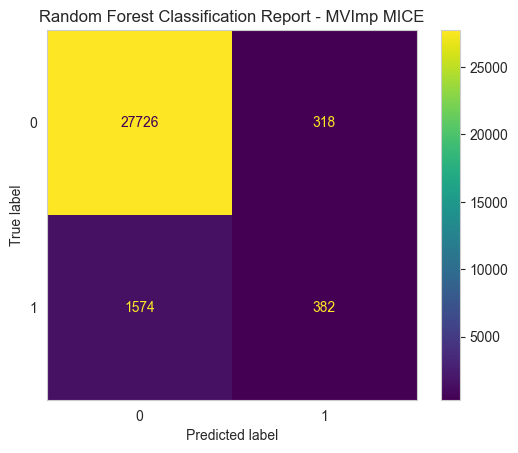

In [664]:
plot_confusion_matrix(model_name='Random Forest',
                      y_true=y_test_zip,
                      y_pred=y_hat_zip,
                      modifiers='MVImp MICE')

In [665]:
model_info_metrics: dict[str, dict | str] = compute_model_info_metrics(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba, estimator_name='Random Forest Classifier (MVImp - MICE)')

In [666]:
model_performance_df = add_to_df(metrics_dict=model_info_metrics['Model_Metrics'], estimator_name=model_info_metrics['Model_Name'], old_df=model_performance_df)

In [667]:
model_performance_df.xs('Random Forest Classifier (MVImp - MICE)')

Score
Metric                 
Accuracy       0.936933
Precision (0)  0.946280
Recall (0)     0.988661
F1 Score (0)   0.967006
Precision (1)  0.545714
Recall (1)     0.195297
F1 Score (1)   0.287651
ROC AUC Score  0.840244
PR AUC Score   0.359807

In [668]:
comparison_df = create_comparison_df(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba)

In [669]:
comparison_df[comparison_df['y_true'] == 1]

y_true  y_pred  y_pred_proba
41980        1       0          0.24
7487         1       0          0.15
25705        1       0          0.01
49306        1       0          0.10
95328        1       0          0.22
...        ...     ...           ...
77138        1       0          0.04
11762        1       0          0.02
140370       1       1          0.54
115214       1       0          0.01
146029       1       0          0.10

[1956 rows x 3 columns]

In [670]:
comparison_df[comparison_df['y_true'] == 0]

y_true  y_pred  y_pred_proba
59770        0       0          0.00
21362        0       0          0.00
127324       0       0          0.01
140509       0       0          0.07
144297       0       0          0.13
...        ...     ...           ...
30430        0       0          0.05
63244        0       0          0.01
104970       0       0          0.05
53960        0       0          0.00
49315        0       0          0.00

[28044 rows x 3 columns]

#### Kaggle Submission Training

In [671]:
random_forest_classifier = RandomForestClassifier(n_jobs=-1, 
                                                  random_state=42, 
                                                  verbose=2)

In [672]:
random_forest_classifier.fit(X=X_train_sub_tf, y=y_train_sub)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 15 of 100building tree 2 of 100
building tree 3 of 100
building tree 5 of 100
building tree 6 of 100
building tree 4 of 100
building tree 7 of 100
building tree 9 of 100
building tree 8 of 100
building tree 10 of 100
building tree 14 of 100
building tree 13 of 100
building tree 16 of 100
building tree 1 of 100
building tree 12 of 100
building tree 11 of 100

building tree 17 of 100building tree 18 of 100

building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=2)

In [673]:
y_hat_sub = random_forest_classifier.predict_proba(X=X_test_sub_tf)[:, 1]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


In [674]:
save_predictions_to_sub_file(filepath_to_sample='dataset/sampleEntry.csv',
                             filepath_to_save='dataset/submissions',
                             y_pred=y_hat_sub,
                             model_name='randomForest',
                             modifiers='MVImp(MICE)')

Kaggle Score: `0.84336 | 0.83606`

### K-Nearest Neighbors Classifier

In [675]:
k_nearest_neighbors_classifier = KNeighborsClassifier(n_jobs=-1)

#### Local Scoring Training

In [676]:
k_nearest_neighbors_classifier.fit(X=X_train_zip_tf, y=y_train_zip)

KNeighborsClassifier(n_jobs=-1)

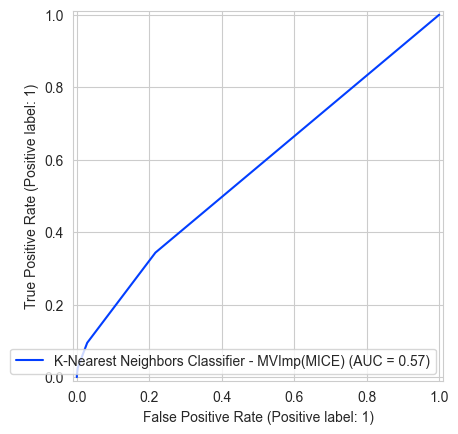

In [677]:
plot_roc_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=k_nearest_neighbors_classifier, estimator_name='K-Nearest Neighbors Classifier - MVImp(MICE)')

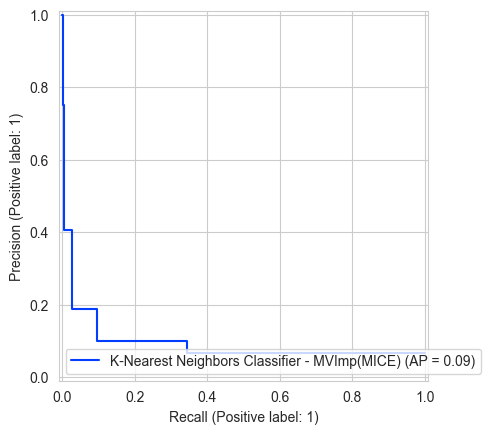

In [678]:
plot_precision_recall_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=k_nearest_neighbors_classifier, estimator_name='K-Nearest Neighbors Classifier - MVImp(MICE)')

In [679]:
y_hat_zip_proba = k_nearest_neighbors_classifier.predict_proba(X=X_test_zip_tf)[:, 1]

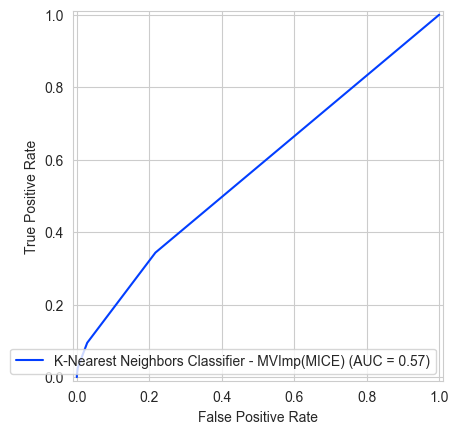

In [680]:
plot_roc_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='K-Nearest Neighbors Classifier - MVImp(MICE)')

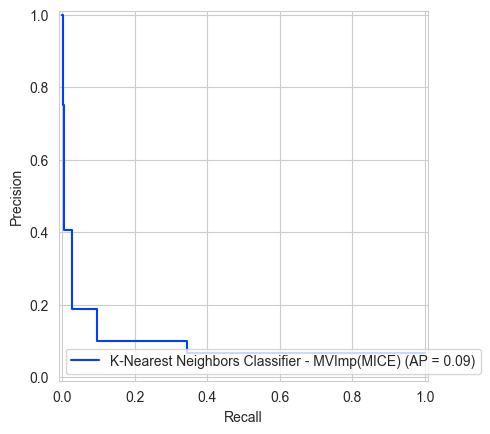

In [681]:
plot_precision_recall_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='K-Nearest Neighbors Classifier - MVImp(MICE)')

In [682]:
y_hat_zip = k_nearest_neighbors_classifier.predict(X=X_test_zip_tf)

In [683]:
print_classification_report(model_name='K-Nearest Neighbors Classifier',
                            y_true=y_test_zip,
                            y_pred=y_hat_zip,
                            modifiers='MVImp MICE')

K-Nearest Neighbors Classifier - MVImp MICE - Accuracy Score: 0.934
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.40      0.03      0.05      1956

    accuracy                           0.93     30000
   macro avg       0.67      0.51      0.51     30000
weighted avg       0.90      0.93      0.91     30000



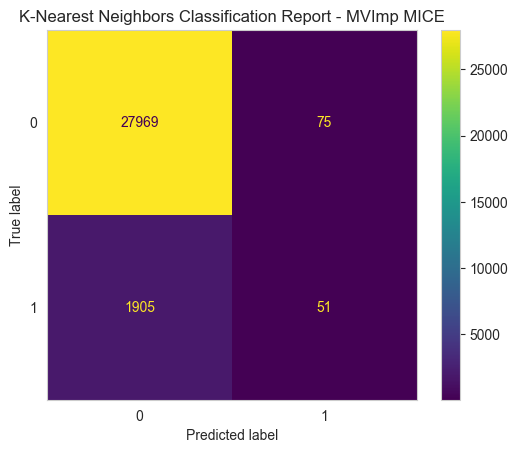

In [684]:
plot_confusion_matrix(model_name='K-Nearest Neighbors',
                      y_true=y_test_zip,
                      y_pred=y_hat_zip,
                      modifiers='MVImp MICE')

In [685]:
model_info_metrics: dict[str, dict | str] = compute_model_info_metrics(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba, estimator_name='K-Nearest Neighbors Classifier (MVImp - MICE)')

In [686]:
model_performance_df = add_to_df(metrics_dict=model_info_metrics['Model_Metrics'], estimator_name=model_info_metrics['Model_Name'], old_df=model_performance_df)

In [687]:
model_performance_df.xs('K-Nearest Neighbors Classifier (MVImp - MICE)')

Score
Metric                 
Accuracy       0.934000
Precision (0)  0.936232
Recall (0)     0.997326
F1 Score (0)   0.965814
Precision (1)  0.404762
Recall (1)     0.026074
F1 Score (1)   0.048991
ROC AUC Score  0.568944
PR AUC Score   0.093609

In [688]:
comparison_df = create_comparison_df(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba)

In [689]:
comparison_df[comparison_df['y_true'] == 1]

y_true  y_pred  y_pred_proba
41980        1       0           0.2
7487         1       0           0.0
25705        1       0           0.0
49306        1       0           0.0
95328        1       0           0.2
...        ...     ...           ...
77138        1       0           0.0
11762        1       0           0.0
140370       1       0           0.0
115214       1       0           0.0
146029       1       0           0.0

[1956 rows x 3 columns]

In [690]:
comparison_df[comparison_df['y_true'] == 0]

y_true  y_pred  y_pred_proba
59770        0       0           0.0
21362        0       0           0.0
127324       0       0           0.0
140509       0       0           0.4
144297       0       0           0.0
...        ...     ...           ...
30430        0       0           0.0
63244        0       0           0.0
104970       0       0           0.2
53960        0       0           0.0
49315        0       0           0.0

[28044 rows x 3 columns]

#### Kaggle Submission Training

In [691]:
k_nearest_neighbors_classifier = KNeighborsClassifier(n_jobs=-1)

In [692]:
k_nearest_neighbors_classifier.fit(X=X_train_sub_tf, y=y_train_sub)

KNeighborsClassifier(n_jobs=-1)

In [693]:
y_hat_sub = k_nearest_neighbors_classifier.predict_proba(X=X_test_sub_tf)[:, 1]

In [694]:
save_predictions_to_sub_file(filepath_to_sample='dataset/sampleEntry.csv',
                             filepath_to_save='dataset/submissions',
                             y_pred=y_hat_sub,
                             model_name='knn',
                             modifiers='MVImp(MICE)')

Kaggle Score: `0.58358 | 0.57774`

### Advanced Missing Values Imputation - MICE - Summary
Since dataset is highly imbalanced, all models tend to predict probability values close to `0` for a vast majority of test rows, that are also mostly close to `0`, therefore their accuracy on Kaggle website is pretty similar, fluctuating around values of $\approx 0.58$ achieved by K-Nearest Neighbors Classifier to $\approx 0.87$ achieved by LightGBM Classifier, thus an important step is class balancing, in order to provide better scores of Precision, Recall and ROC-AUC, that are very useful in determination of real behavior of the model and its predictions.

#### Kaggle Results Table:
| **Classifier Name**   | **Modifiers** | **Private Score** | **Public Score** |
|-----------------------|---------------|-------------------|------------------|
| _LightGBM_            |       BP      |      0.86667      |      0.86110     |
| _XGBoost_             |       BP      |      0.85841      |      0.85452     |
| _Logistic Regression_ |       BP      |      0.67267      |      0.67434     |
| _Random Forest_       |       BP      |      0.84336      |      0.83606     |
| _K-Nearest Neighbors_ |       BP      |      0.58358      |      0.57774     |

In [695]:
model_performance_df.loc[model_names]

Score
Model                                         Metric                 
K-Nearest Neighbors Classifier (MVImp - MICE) Accuracy       0.934000
                                              Precision (0)  0.936232
                                              Recall (0)     0.997326
                                              F1 Score (0)   0.965814
                                              Precision (1)  0.404762
                                              Recall (1)     0.026074
                                              F1 Score (1)   0.048991
                                              ROC AUC Score  0.568944
                                              PR AUC Score   0.093609
LightGBM Classifier (MVImp - MICE)            Accuracy       0.938200
                                              Precision (0)  0.946623
                                              Recall (0)     0.989695
                                              F1 Score (0)   0.967680
                                              Precision (1)  0.575000
                                              Recall (1)     0.199898
                                              F1 Score (1)   0.296662
                                              ROC AUC Score  0.862300
                                              PR AUC Score   0.394484
Logistic Regression (MVImp - MICE)            Accuracy       0.935000
                                              Precision (0)  0.936238
                                              Recall (0)     0.998467
                                              F1 Score (0)   0.966351
                                              Precision (1)  0.532609
                                              Recall (1)     0.025051
                                              F1 Score (1)   0.047852
                                              ROC AUC Score  0.691755
                                              PR AUC Score   0.172087
Random Forest Classifier (MVImp - MICE)       Accuracy       0.936933
                                              Precision (0)  0.946280
                                              Recall (0)     0.988661
                                              F1 Score (0)   0.967006
                                              Precision (1)  0.545714
                                              Recall (1)     0.195297
                                              F1 Score (1)   0.287651
                                              ROC AUC Score  0.840244
                                              PR AUC Score   0.359807
XGBoost Classifier (MVImp - MICE)             Accuracy       0.935567
                                              Precision (0)  0.946846
                                              Recall (0)     0.986450
                                              F1 Score (0)   0.966242
                                              Precision (1)  0.514687
                                              Recall (1)     0.206033
                                              F1 Score (1)   0.294268
                                              ROC AUC Score  0.853304
                                              PR AUC Score   0.358963

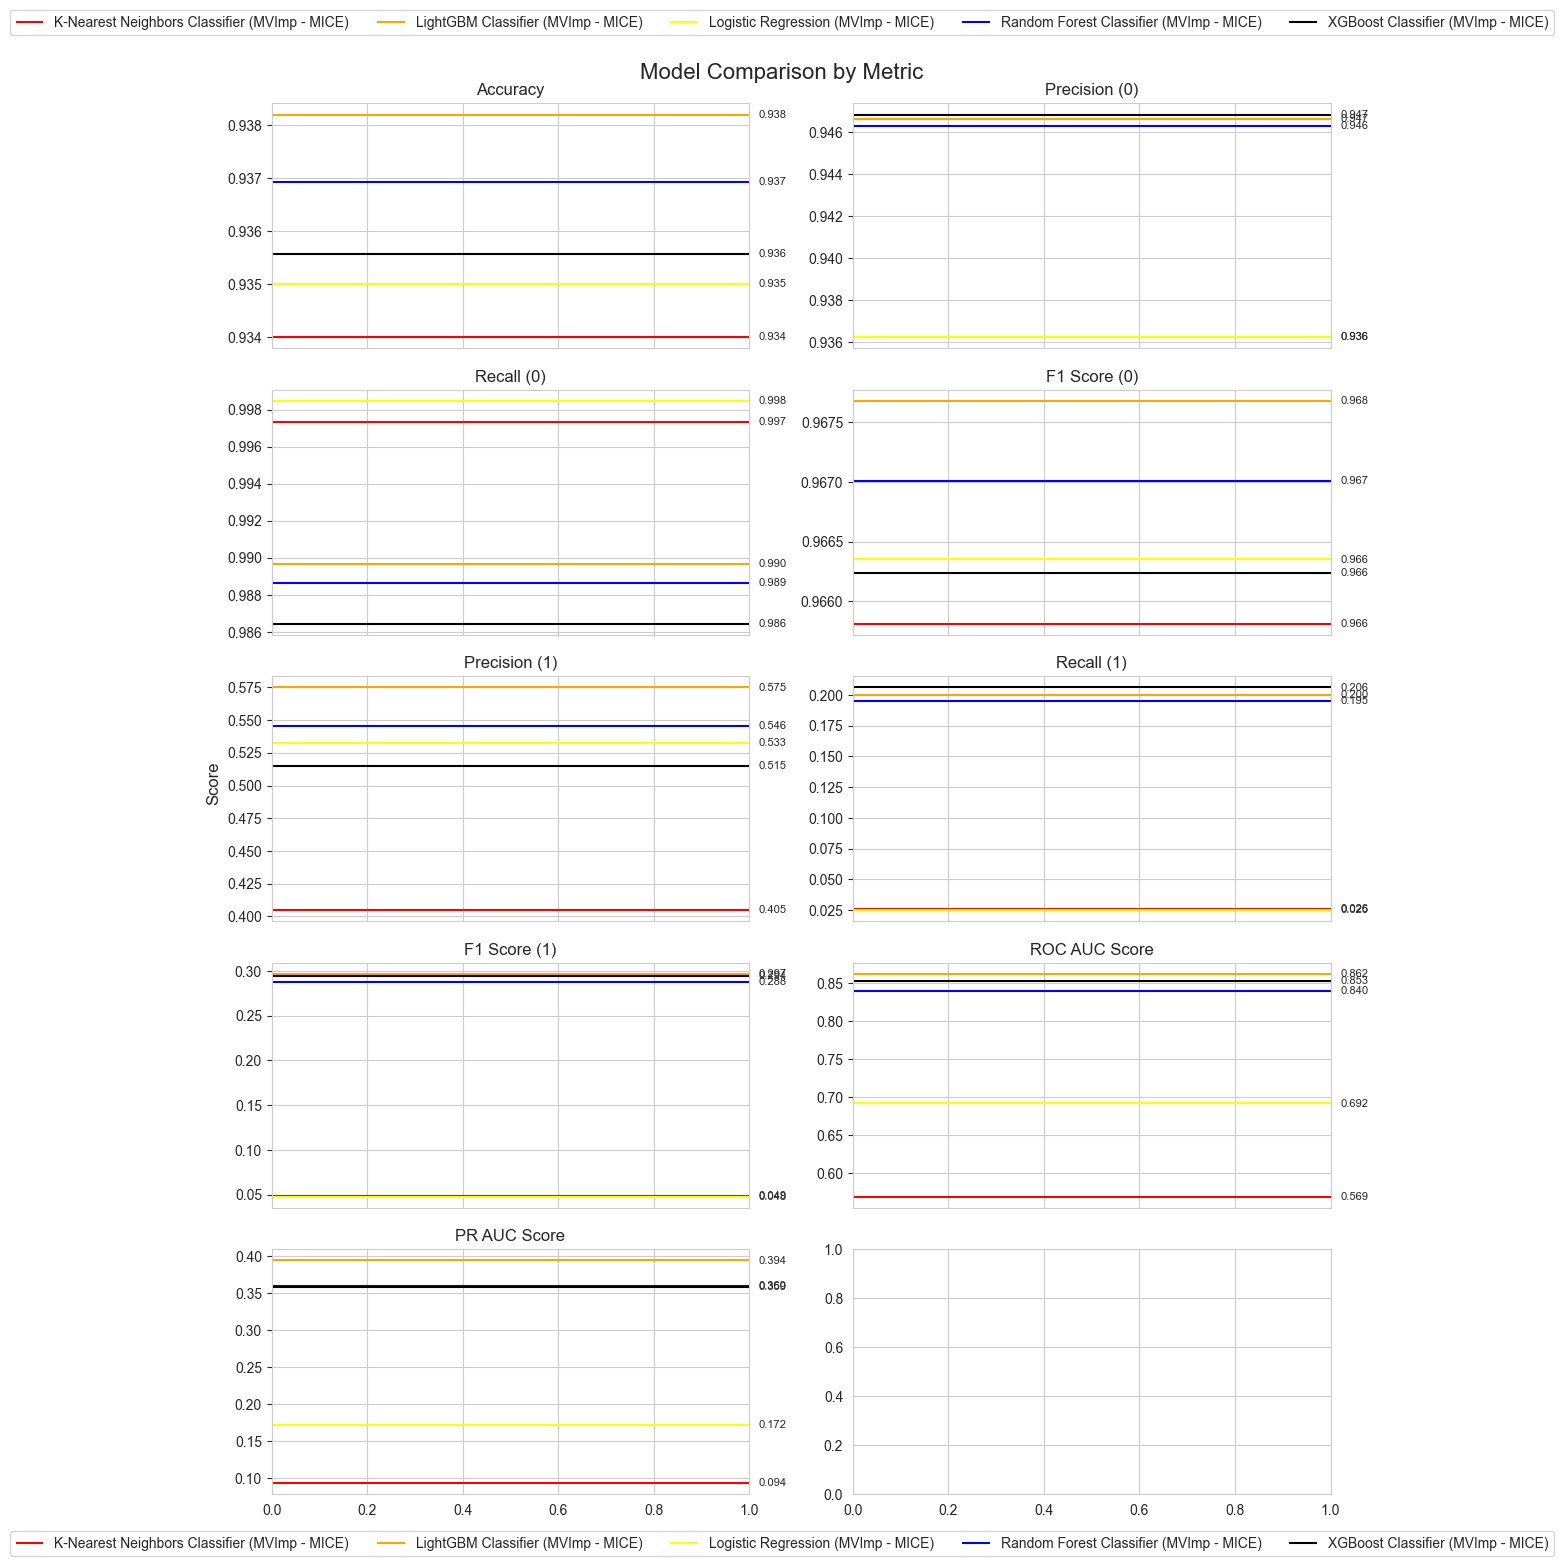

In [696]:
plot_metrics(metrics_df=model_performance_df.loc[model_names])

Was observed that all models suffer from misclassification of test samples with positive label, as a result of highly imbalanced dataset ($\approx 93\%$ negative labels against $\approx 7\%$ positive labels). Was decided to use MICE Imputation in order to impute missing values in `MonthlyIncome` column since there are a lot of missing values and simple imputation by replacing with median may induce some error in predictions, while MICE Imputation creates multiple copies of the dataset, replaces all missing values in all columns with placeholder values and, iteratively, updates those values using other available data from the dataset. It uses ML Models to predict those values, such as Linear Regression or others, using the predictions from one model as input in the next one in the next iteration, thus estimating the uncertainty and stabilizing imputed values. Works best where there is a strong correlation between variables. MICE Imputation increased the scores on Kaggle website submissions and on local scores (specifically, Recall), compared to baseline performance and simple imputation using median values for `MonthlyIncome` column.

## Models Training - No Missing Values Imputation (XGBoost and LightGBM)

Since XGBoost, LightGBM and Random Forest Classifiers handles automatically Null Values in the dataset by creating branches that evaluates the impact of the missing value of the specific features, was decided to analyze their behavior alongside with imputation techniques

### Utils - No Missing Values Imputation

In [697]:
model_names: list[str] = ['LightGBM Classifier (MVImp - No)', 
                          'Random Forest Classifier (MVImp - No)', 
                          'XGBoost Classifier (MVImp - No)']

In [698]:
pipeline_steps: list[tuple[str, TransformerMixin]] = [
    ('drop_id', transformer_dropper_id),
]

In [699]:
fit_transform_pipeline: Pipeline = create_pipeline(
    steps=pipeline_steps
)

In [700]:
X_train_zip_tf = fit_transform_pipeline.fit_transform(
    X=X_train_zip,
    y=y_train_zip
)

In [701]:
X_test_zip_tf = fit_transform_pipeline.transform(
    X=X_test_zip
)

In [702]:
fit_transform_pipeline: Pipeline = create_pipeline(
    steps=pipeline_steps
)

In [703]:
X_train_sub_tf = fit_transform_pipeline.fit_transform(
    X=X_train_sub,
    y=y_train_sub
)

In [704]:
X_test_sub_tf = fit_transform_pipeline.transform(
    X=X_test_sub
)

### Light Gradient Boost Model (LightGBM)

In [705]:
lightgbm_classifier = LGBMClassifier(n_jobs=-1, 
                                   random_state=42, 
                                   device='gpu', 
                                   verbose=2)

#### Local Scoring Training

In [706]:
lightgbm_classifier.fit(X=X_train_zip_tf, y=y_train_zip)

[LightGBM] [Info] Number of positive: 8070, number of negative: 111930
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.911158
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 10
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 Ti Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 7 dense feature groups (0.92 MB) transferred to GPU in 0.002137 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067250 -> initscore=-2.629720
[LightGBM] [Info] Start training from score -2.629720
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves

LGBMClassifier(device='gpu', n_jobs=-1, random_state=42, verbose=2)

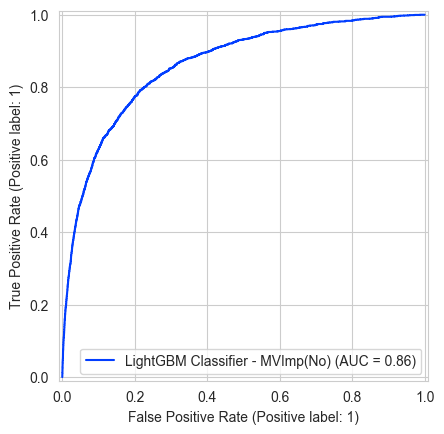

In [707]:
plot_roc_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=lightgbm_classifier, estimator_name='LightGBM Classifier - MVImp(No)')

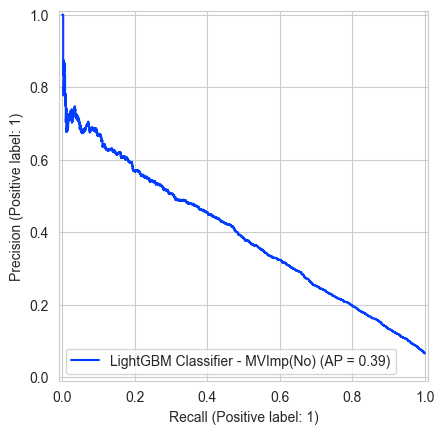

In [708]:
plot_precision_recall_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=lightgbm_classifier, estimator_name='LightGBM Classifier - MVImp(No)')

In [709]:
y_hat_zip_proba = lightgbm_classifier.predict_proba(X=X_test_zip_tf)[:, 1]

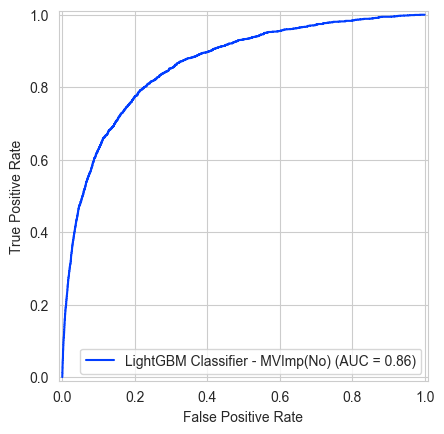

In [710]:
plot_roc_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='LightGBM Classifier - MVImp(No)')

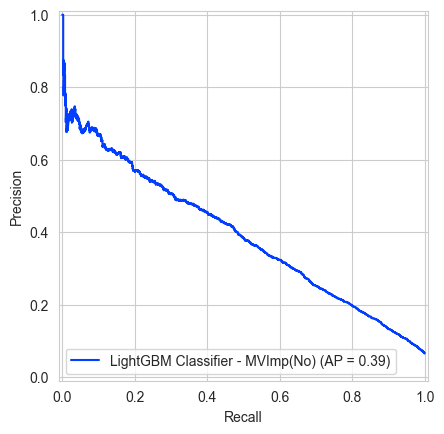

In [711]:
plot_precision_recall_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='LightGBM Classifier - MVImp(No)')

In [712]:
y_hat_zip = lightgbm_classifier.predict(X=X_test_zip_tf)

In [713]:
print_classification_report(model_name='LightGBM Classifier',
                            y_true=y_test_zip,
                            y_pred=y_hat_zip,
                            modifiers='MVImp No')

LightGBM Classifier - MVImp No - Accuracy Score: 0.9382666666666667
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.58      0.19      0.29      1956

    accuracy                           0.94     30000
   macro avg       0.76      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



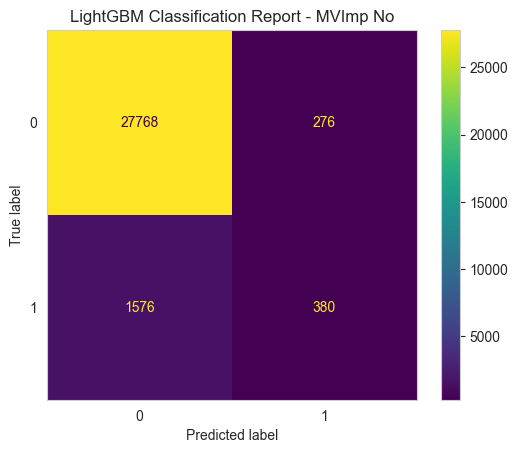

In [714]:
plot_confusion_matrix(model_name='LightGBM',
                      y_true=y_test_zip,
                      y_pred=y_hat_zip,
                      modifiers='MVImp No')

As it may be seen, due to the fact that this dataset is highly imbalanced, accuracy is high, since model tends to predict only negative values, therefore precision, recall and F1 Score are very important, since they offer information about minority class separately.

In [715]:
model_info_metrics: dict[str, dict | str] = compute_model_info_metrics(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba, estimator_name='LightGBM Classifier (MVImp - No)')

In [716]:
model_performance_df = add_to_df(metrics_dict=model_info_metrics['Model_Metrics'], estimator_name=model_info_metrics['Model_Name'], old_df=model_performance_df)

In [717]:
model_performance_df.xs('LightGBM Classifier (MVImp - No)')

Score
Metric                 
Accuracy       0.938267
Precision (0)  0.946292
Recall (0)     0.990158
F1 Score (0)   0.967728
Precision (1)  0.579268
Recall (1)     0.194274
F1 Score (1)   0.290965
ROC AUC Score  0.863009
PR AUC Score   0.391280

In [718]:
comparison_df = create_comparison_df(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba)

In [719]:
comparison_df[comparison_df['y_true'] == 1]

y_true  y_pred  y_pred_proba
41980        1       0      0.274782
7487         1       0      0.201793
25705        1       0      0.015178
49306        1       0      0.086985
95328        1       1      0.542286
...        ...     ...           ...
77138        1       0      0.015660
11762        1       0      0.010409
140370       1       0      0.424044
115214       1       0      0.045609
146029       1       0      0.035429

[1956 rows x 3 columns]

In [720]:
comparison_df[comparison_df['y_true'] == 0]

y_true  y_pred  y_pred_proba
59770        0       0      0.004926
21362        0       0      0.010519
127324       0       0      0.007715
140509       0       0      0.081918
144297       0       0      0.068384
...        ...     ...           ...
30430        0       0      0.051911
63244        0       0      0.011517
104970       0       0      0.076223
53960        0       0      0.007224
49315        0       0      0.015950

[28044 rows x 3 columns]

#### Kaggle Submission Training

In [721]:
lightgbm_classifier = LGBMClassifier(n_jobs=-1, 
                                   random_state=42, 
                                   device='gpu', 
                                   verbose=2)

In [722]:
lightgbm_classifier.fit(X=X_train_sub_tf, y=y_train_sub)

[LightGBM] [Info] Number of positive: 10026, number of negative: 139974
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.911280
[LightGBM] [Info] Total Bins 979
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 10
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 Ti Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 7 dense feature groups (1.14 MB) transferred to GPU in 0.002167 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066840 -> initscore=-2.636275
[LightGBM] [Info] Start training from score -2.636275
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leav

LGBMClassifier(device='gpu', n_jobs=-1, random_state=42, verbose=2)

In [723]:
y_hat_sub_proba = lightgbm_classifier.predict_proba(X=X_test_sub_tf)[:, 1]

In [724]:
save_predictions_to_sub_file(filepath_to_sample='dataset/sampleEntry.csv',
                             filepath_to_save='dataset/submissions',
                             y_pred=y_hat_sub_proba,
                             model_name='lightgbm',
                             modifiers='MVImp(No)')

Kaggle Score: `0.86665 | 0.86071`

### eXtreme Gradient Boosting (XGBoost)

In [725]:
xgboost_classifier = XGBClassifier(n_jobs=-1, 
                                 random_state=42, 
                                 device='gpu', 
                                 verbosity=2)

#### Local Scoring Training

In [726]:
xgboost_classifier.fit(X=X_train_zip_tf, y=y_train_zip)

[01:50:06] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (120000, 10, 1173184).
[01:50:06] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\ellpack_page.cu:171: Ellpack is relatively dense.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

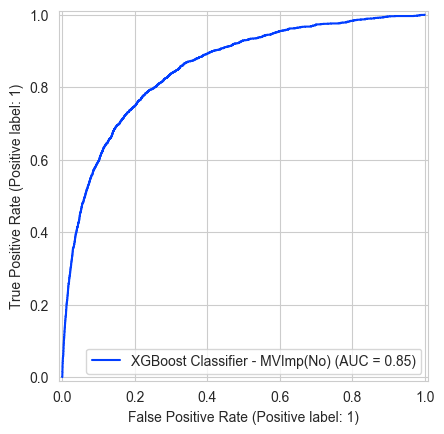

In [727]:
plot_roc_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=xgboost_classifier, estimator_name='XGBoost Classifier - MVImp(No)')

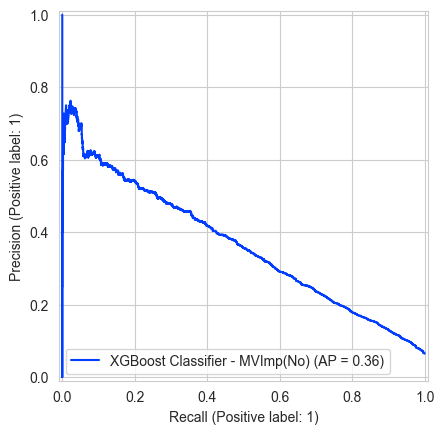

In [728]:
plot_precision_recall_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=xgboost_classifier, estimator_name='XGBoost Classifier - MVImp(No)')

In [729]:
y_hat_zip_proba = xgboost_classifier.predict_proba(X=X_test_zip_tf)[:, 1]

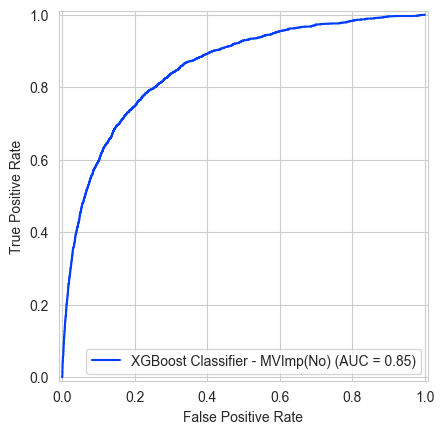

In [730]:
plot_roc_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='XGBoost Classifier - MVImp(No)')

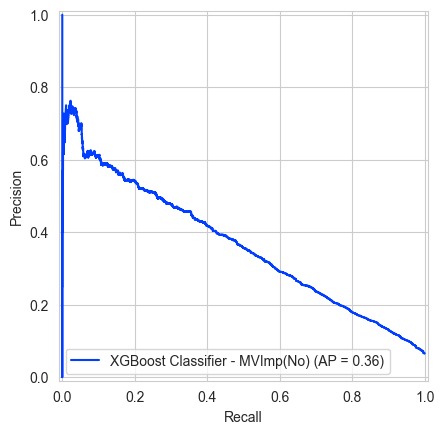

In [731]:
plot_precision_recall_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='XGBoost Classifier - MVImp(No)')

In [732]:
y_hat_zip = xgboost_classifier.predict(X=X_test_zip_tf)

In [733]:
print_classification_report(model_name='XGBoost Classifier',
                            y_true=y_test_zip,
                            y_pred=y_hat_zip,
                            modifiers='MVImp No')

XGBoost Classifier - MVImp No - Accuracy Score: 0.9360333333333334
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.52      0.21      0.30      1956

    accuracy                           0.94     30000
   macro avg       0.74      0.60      0.63     30000
weighted avg       0.92      0.94      0.92     30000



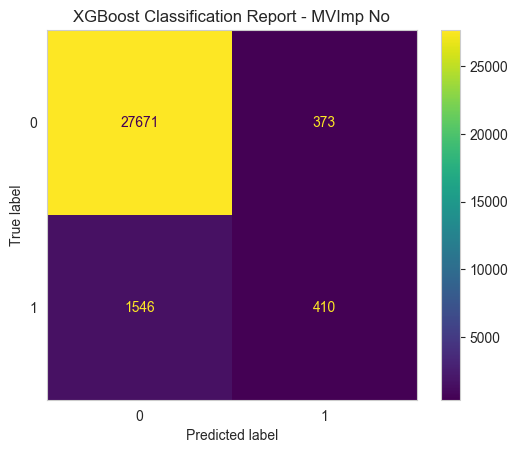

In [734]:
plot_confusion_matrix(model_name='XGBoost',
                      y_true=y_test_zip,
                      y_pred=y_hat_zip,
                      modifiers='MVImp No')

As it may be seen, due to the fact that this dataset is highly imbalanced, accuracy is high, since model tends to predict only negative values, therefore precision, recall and F1 Score are very important, since they offer information about minority class separately.

In [735]:
model_info_metrics: dict[str, dict | str] = compute_model_info_metrics(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba, estimator_name='XGBoost Classifier (MVImp - No)')

In [736]:
model_performance_df = add_to_df(metrics_dict=model_info_metrics['Model_Metrics'], estimator_name=model_info_metrics['Model_Name'], old_df=model_performance_df)

In [737]:
model_performance_df.xs('XGBoost Classifier (MVImp - No)')

Score
Metric                 
Accuracy       0.936033
Precision (0)  0.947086
Recall (0)     0.986699
F1 Score (0)   0.966487
Precision (1)  0.523627
Recall (1)     0.209611
F1 Score (1)   0.299379
ROC AUC Score  0.853906
PR AUC Score   0.363534

In [738]:
comparison_df = create_comparison_df(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba)

In [739]:
comparison_df[comparison_df['y_true'] == 1]

y_true  y_pred  y_pred_proba
41980        1       0      0.275654
7487         1       0      0.147878
25705        1       0      0.017404
49306        1       0      0.058106
95328        1       1      0.525145
...        ...     ...           ...
77138        1       0      0.006161
11762        1       0      0.024665
140370       1       0      0.386828
115214       1       0      0.046940
146029       1       0      0.035379

[1956 rows x 3 columns]

In [740]:
comparison_df[comparison_df['y_true'] == 0]

y_true  y_pred  y_pred_proba
59770        0       0      0.004192
21362        0       0      0.010331
127324       0       0      0.005150
140509       0       0      0.076639
144297       0       0      0.066376
...        ...     ...           ...
30430        0       0      0.034030
63244        0       0      0.012227
104970       0       0      0.055339
53960        0       0      0.007074
49315        0       0      0.016862

[28044 rows x 3 columns]

#### Kaggle Submission Training

In [741]:
xgboost_classifier = XGBClassifier(n_jobs=-1, 
                                   random_state=42, 
                                   device='gpu', 
                                   verbosity=2)

In [742]:
xgboost_classifier.fit(X=X_train_sub_tf, y=y_train_sub)

[01:50:08] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (150000, 10, 1466345).
[01:50:08] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\ellpack_page.cu:171: Ellpack is relatively dense.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [743]:
y_hat_sub_proba = xgboost_classifier.predict_proba(X=X_test_sub_tf)[:, 1]

In [744]:
save_predictions_to_sub_file(filepath_to_sample='dataset/sampleEntry.csv',
                             filepath_to_save='dataset/submissions',
                             y_pred=y_hat_sub_proba,
                             model_name='xgboost',
                             modifiers='MVImp(No)')

Kaggle Score: `0.85959 | 0.85194`

### Random Forest Classifier

In [745]:
random_forest_classifier = RandomForestClassifier(n_jobs=-1, 
                                                  random_state=42, 
                                                  verbose=2)

#### Local Scoring Training

In [746]:
random_forest_classifier.fit(X=X_train_zip_tf, y=y_train_zip)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 12 of 100

building tree 11 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100building tree 63 of 100

building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=2)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


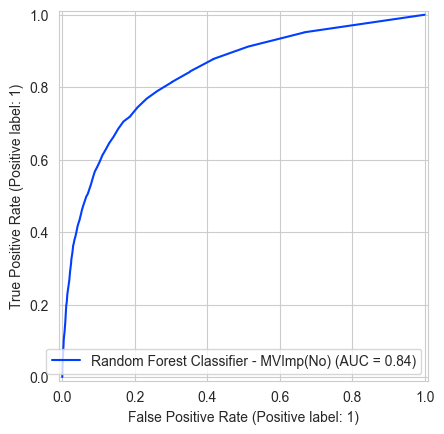

In [747]:
plot_roc_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=random_forest_classifier, estimator_name='Random Forest Classifier - MVImp(No)')

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


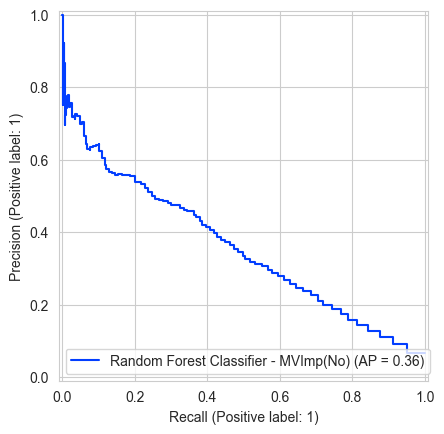

In [748]:
plot_precision_recall_curve_from_estimator(X=X_test_zip_tf, y=y_test_zip, estimator=random_forest_classifier, estimator_name='Random Forest Classifier - MVImp(No)')

In [749]:
y_hat_zip_proba = random_forest_classifier.predict_proba(X=X_test_zip_tf)[:, 1]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


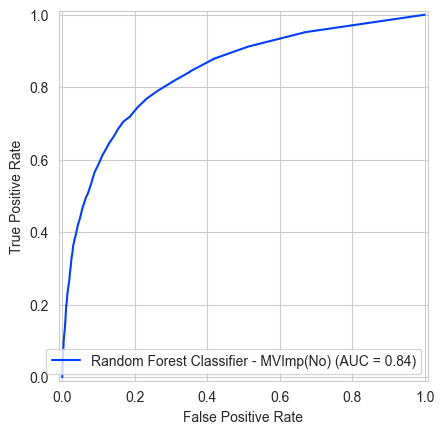

In [750]:
plot_roc_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='Random Forest Classifier - MVImp(No)')

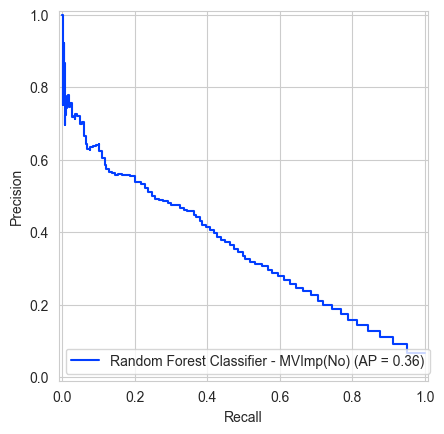

In [751]:
plot_precision_recall_curve_from_probabilities(y_true=y_test_zip, y_prob_pred=y_hat_zip_proba, estimator_name='Random Forest Classifier - MVImp(No)')

In [752]:
y_hat_zip = random_forest_classifier.predict(X=X_test_zip_tf)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [753]:
print_classification_report(model_name='Random Forest Classifier',
                            y_true=y_test_zip,
                            y_pred=y_hat_zip,
                            modifiers='MVImp No')

Random Forest Classifier - MVImp No - Accuracy Score: 0.9374
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.56      0.20      0.29      1956

    accuracy                           0.94     30000
   macro avg       0.75      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



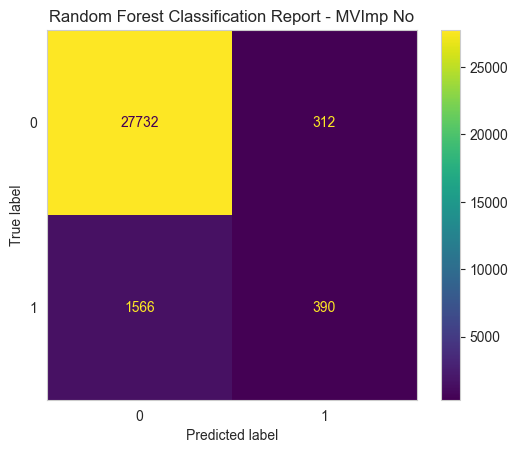

In [754]:
plot_confusion_matrix(model_name='Random Forest',
                      y_true=y_test_zip,
                      y_pred=y_hat_zip,
                      modifiers='MVImp No')

In [755]:
model_info_metrics: dict[str, dict | str] = compute_model_info_metrics(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba, estimator_name='Random Forest Classifier (MVImp - No)')

In [756]:
model_performance_df = add_to_df(metrics_dict=model_info_metrics['Model_Metrics'], estimator_name=model_info_metrics['Model_Name'], old_df=model_performance_df)

In [757]:
model_performance_df.xs('Random Forest Classifier (MVImp - No)')

Score
Metric                 
Accuracy       0.937400
Precision (0)  0.946549
Recall (0)     0.988875
F1 Score (0)   0.967249
Precision (1)  0.555556
Recall (1)     0.199387
F1 Score (1)   0.293454
ROC AUC Score  0.839047
PR AUC Score   0.357400

In [758]:
comparison_df = create_comparison_df(y_true=y_test_zip, y_pred=y_hat_zip, y_pred_proba=y_hat_zip_proba)

In [759]:
comparison_df[comparison_df['y_true'] == 1]

y_true  y_pred  y_pred_proba
41980        1       0          0.17
7487         1       0          0.28
25705        1       0          0.02
49306        1       0          0.08
95328        1       0          0.44
...        ...     ...           ...
77138        1       0          0.02
11762        1       0          0.00
140370       1       0          0.43
115214       1       0          0.01
146029       1       0          0.09

[1956 rows x 3 columns]

In [760]:
comparison_df[comparison_df['y_true'] == 0]

y_true  y_pred  y_pred_proba
59770        0       0          0.00
21362        0       0          0.00
127324       0       0          0.01
140509       0       0          0.07
144297       0       0          0.06
...        ...     ...           ...
30430        0       0          0.02
63244        0       0          0.01
104970       0       0          0.03
53960        0       0          0.00
49315        0       0          0.01

[28044 rows x 3 columns]

#### Kaggle Submission Training

In [761]:
random_forest_classifier = RandomForestClassifier(n_jobs=-1, 
                                                  random_state=42, 
                                                  verbose=2)

In [762]:
random_forest_classifier.fit(X=X_train_sub_tf, y=y_train_sub)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 5 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100

building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100building tree 50 of 100

building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=2)

In [763]:
y_hat_sub = random_forest_classifier.predict_proba(X=X_test_sub_tf)[:, 1]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


In [764]:
save_predictions_to_sub_file(filepath_to_sample='dataset/sampleEntry.csv',
                             filepath_to_save='dataset/submissions',
                             y_pred=y_hat_sub,
                             model_name='randomForest',
                             modifiers='MVImp(No)')

Kaggle Score: `0.84468 | 0.83583`

### No Missing Values Imputation - Summary
As it may be seen, the private score slightly increased by public score is worse than in previous scenarios, with missing values imputation.

#### Kaggle Results Table:
| **Classifier Name**   | **Modifiers** | **Private Score** | **Public Score** |
|-----------------------|---------------|-------------------|------------------|
| _LightGBM_            |       BP      |      0.86665      |      0.86071     |
| _XGBoost_             |       BP      |      0.85959      |      0.85194     |
| _Random Forest_       |       BP      |      0.84468      |      0.83583     |

In [765]:
model_performance_df.loc[model_names]

Score
Model                                 Metric                 
LightGBM Classifier (MVImp - No)      Accuracy       0.938267
                                      Precision (0)  0.946292
                                      Recall (0)     0.990158
                                      F1 Score (0)   0.967728
                                      Precision (1)  0.579268
                                      Recall (1)     0.194274
                                      F1 Score (1)   0.290965
                                      ROC AUC Score  0.863009
                                      PR AUC Score   0.391280
Random Forest Classifier (MVImp - No) Accuracy       0.937400
                                      Precision (0)  0.946549
                                      Recall (0)     0.988875
                                      F1 Score (0)   0.967249
                                      Precision (1)  0.555556
                                      Recall (1)     0.199387
                                      F1 Score (1)   0.293454
                                      ROC AUC Score  0.839047
                                      PR AUC Score   0.357400
XGBoost Classifier (MVImp - No)       Accuracy       0.936033
                                      Precision (0)  0.947086
                                      Recall (0)     0.986699
                                      F1 Score (0)   0.966487
                                      Precision (1)  0.523627
                                      Recall (1)     0.209611
                                      F1 Score (1)   0.299379
                                      ROC AUC Score  0.853906
                                      PR AUC Score   0.363534

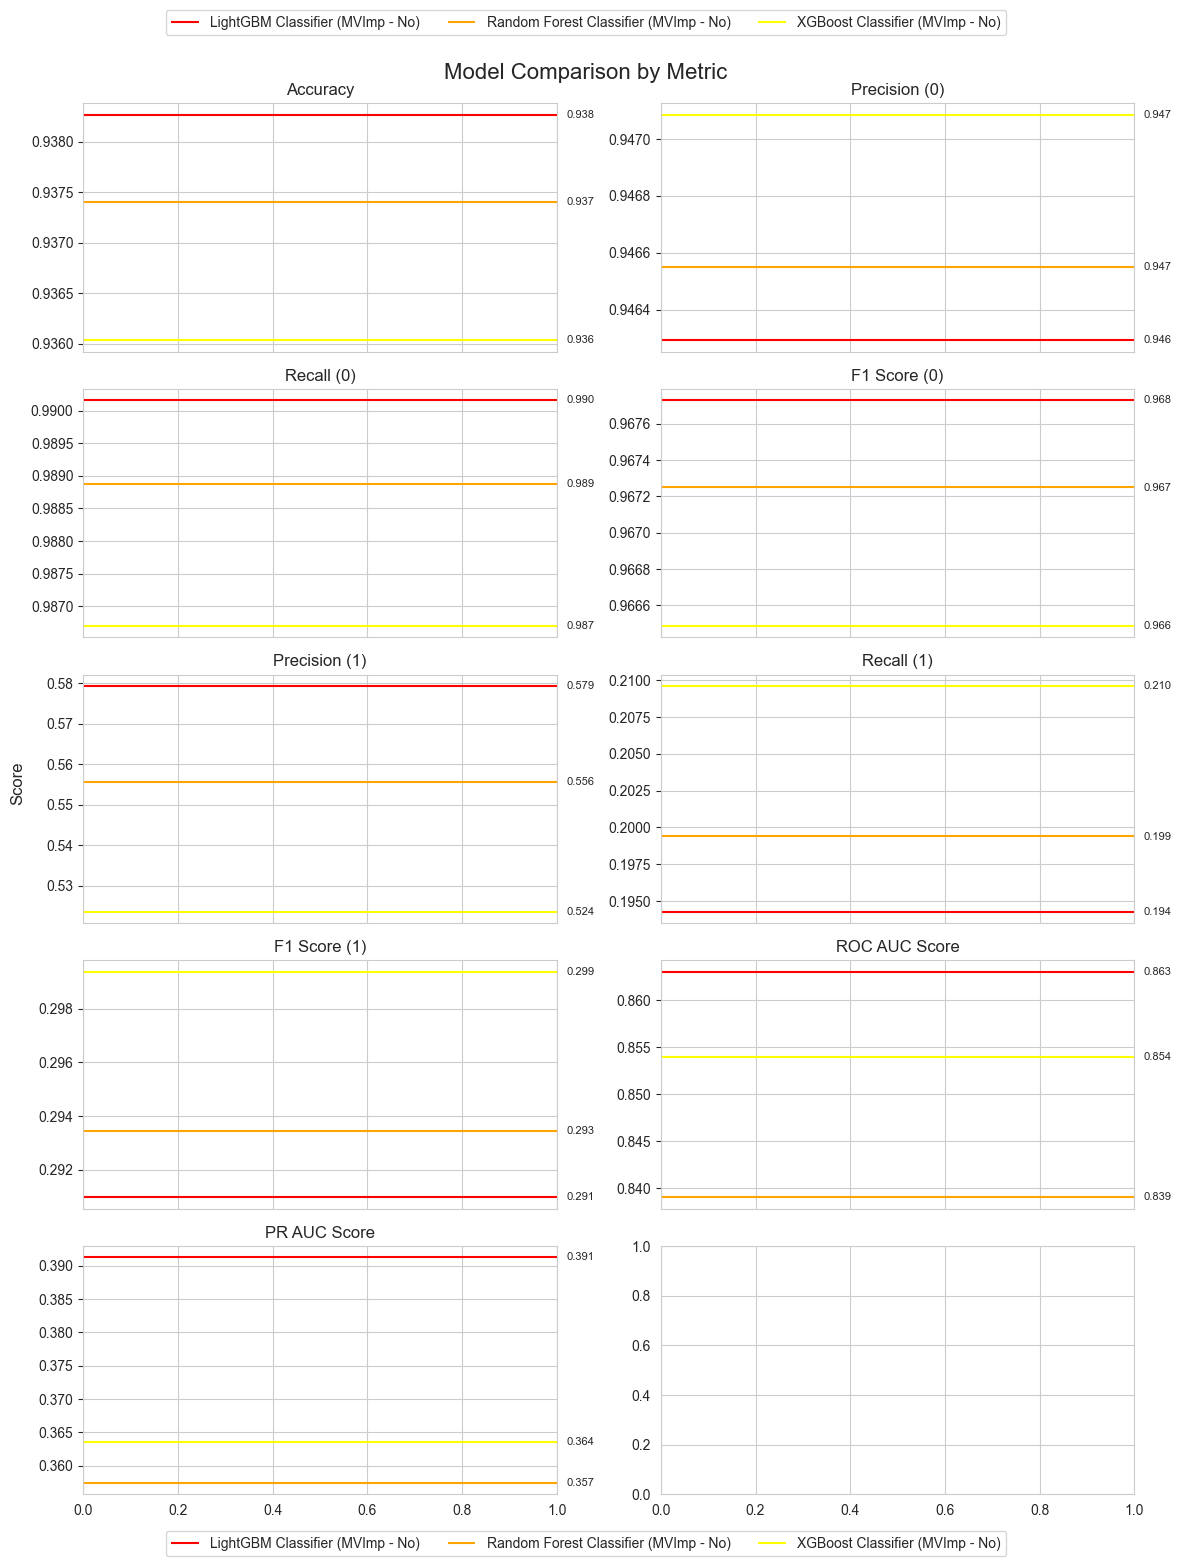

In [766]:
plot_metrics(metrics_df=model_performance_df.loc[model_names])

Was observed that precision increased for all 3 models, but recall is worse, which serves as a metric that should be better, since models are suffering from highly imbalanced dataset. Missing value imputation has shown an increase in this aspect, thus MICE Imputation will be further used for next steps of the dataset preprocessing and model training.